# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:green"> Exercise 11 </span>
### <span style="color:orange">Exercise 11.1 </span>


The aim of this exercise is the training of a basic feedforward artificial neural network in order to predict a simple linear model:
$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$
Let's start with a linear fit:
we consider the very simple case:
$$
f(x)=2x+1
$$
A basic structure, composed by one single neruon is enough to solve the problem, since the number of parameters needed is 2.
In the fist part of the exercise I am going to modify the number of epochs and see how the parameters are going to be affected by the change.




In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
# generate training inputs & plot interesting things
np.random.seed(0)
m = 2 # slope
b = 1 # intersect

# Try 1:$N_{epochs}=50$

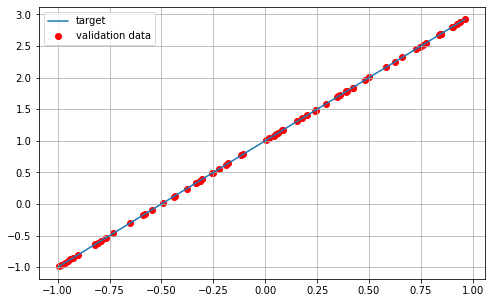

In [2]:
x_train = np.random.uniform(-1, 1, 500) #training set
x_valid = np.random.uniform(-1, 1, 75) # validation set
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)
# plot validation and target dataset
fig, ax= plt.subplots(figsize=(8,5))
ax.plot(x_valid, y_target, label='target')
ax.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()
# construct the neural network

In [39]:
model_50Epochs = tf.keras.Sequential()
model_50Epochs.add(Dense(1, input_shape=(1,)))
# compile the model & get a summary
model_50Epochs.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model_50Epochs.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [40]:
history50 = model_50Epochs.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, #  shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/50
16/16 [==============================] - 0s 12ms/step - loss: 4.3066 - mse: 4.3066 - val_loss: 4.4533 - val_mse: 4.4533
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 3.3741 - mse: 3.3741 - val_loss: 3.4633 - val_mse: 3.4633
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 2.6830 - mse: 2.6830 - val_loss: 2.7261 - val_mse: 2.7261
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 2.1558 - mse: 2.1558 - val_loss: 2.1691 - val_mse: 2.1691
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 1.7408 - mse: 1.7408 - val_loss: 1.7363 - val_mse: 1.7363
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 1.4126 - mse: 1.4126 - val_loss: 1.3950 - val_mse: 1.3950
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 1.1491 - mse: 1.1491 - val_loss: 1.1274 - val_mse: 1.1274
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.9370 - mse: 0.9

3/3 [==============================] - 0s 2ms/step - loss: 1.8463e-04 - mse: 1.8463e-04

Test loss: 0.0001846321247285232
Test accuracy: 0.0001846321247285232


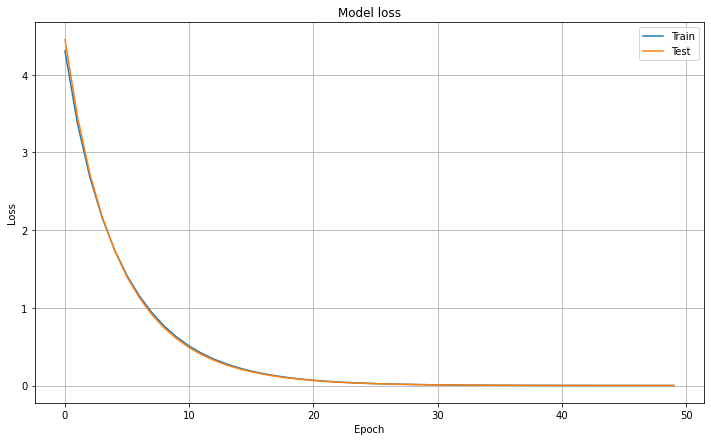

In [42]:
model_50Epochs.get_weights()
score = model_50Epochs.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
# evaluate model
score = model_50Epochs.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# look into training history
# Plot training & validation loss values
figure= plt.subplots(figsize=(8,5))
plt.plot(history50.history['loss'])
plt.plot(history50.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()


In [14]:
# return weights and biases
model_50Epochs.get_weights()

[array([[1.9909923]], dtype=float32), array([0.9999152], dtype=float32)]

Let's try the model obatained after the training of the NN 

4/4 [==============================] - 0s 1ms/step


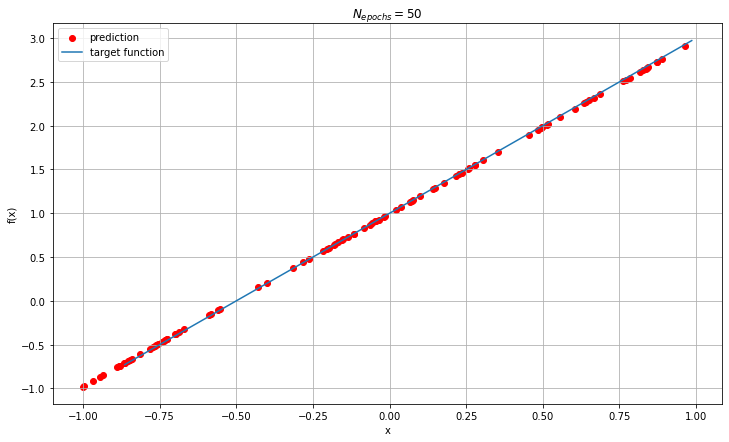

In [43]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model_50Epochs.predict(x_predicted)
figure1=plt.subplots(figsize=(8,5))
plt.scatter(x_predicted, y_predicted,color='r', label='prediction')
plt.title('$N_{epochs}=50$')
plt.plot(x_valid, y_target, label='target function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

# Try2: $N_{epochs}=100$

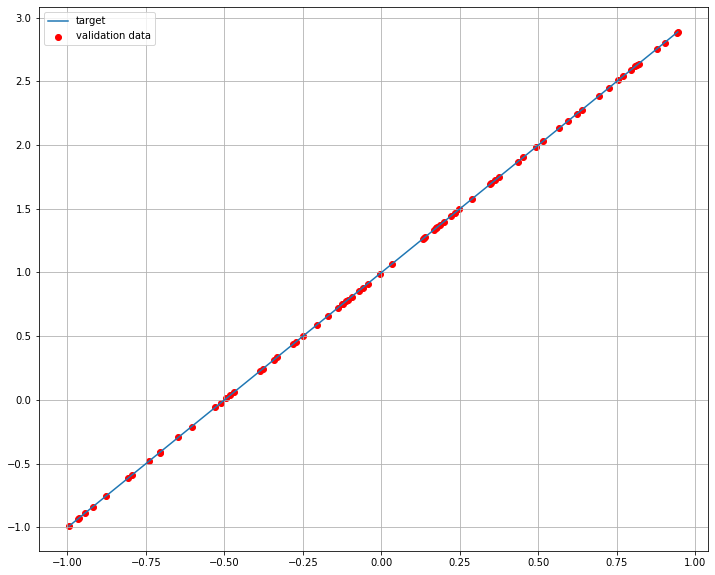

In [44]:
x_train = np.random.uniform(-1, 1, 500) #training set
x_valid = np.random.uniform(-1, 1, 75) # validation set
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)
# plot validation and target dataset
fig, ax= plt.subplots(figsize=(8,5))
ax.plot(x_valid, y_target, label='target')
ax.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()
# construct the neural network

In [47]:
model_100Epochs = tf.keras.Sequential()
model_100Epochs.add(Dense(1, input_shape=(1,)))
# compile the model & get a summary
model_100Epochs.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model_100Epochs.summary()
history100 = model_100Epochs.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True, #  shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
16/16 [==============================] - 0s 13ms/step - loss: 0.8007 - mse: 0.8007 - val_loss: 0.5973 - val_mse: 0.5973
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.4417 - mse: 0.4417 - val_loss: 0.3359 - val_mse: 0.3359
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.2499 - mse: 0.2499 - val_loss: 0.1945 - val_mse: 0.1945
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.1462 - mse: 0.1462 - val_loss: 0.1154 - val_mse: 0.1154
Epoch 5/100
16/16 [==============================] - 0s 2ms/ste

Epoch 55/100
16/16 [==============================] - 0s 3ms/step - loss: 7.2790e-07 - mse: 7.2790e-07 - val_loss: 5.9032e-07 - val_mse: 5.9032e-07
Epoch 56/100
16/16 [==============================] - 0s 3ms/step - loss: 5.8733e-07 - mse: 5.8733e-07 - val_loss: 4.7539e-07 - val_mse: 4.7539e-07
Epoch 57/100
16/16 [==============================] - 0s 3ms/step - loss: 4.7341e-07 - mse: 4.7341e-07 - val_loss: 3.8393e-07 - val_mse: 3.8393e-07
Epoch 58/100
16/16 [==============================] - 0s 3ms/step - loss: 3.8217e-07 - mse: 3.8217e-07 - val_loss: 3.1003e-07 - val_mse: 3.1003e-07
Epoch 59/100
16/16 [==============================] - 0s 3ms/step - loss: 3.0852e-07 - mse: 3.0852e-07 - val_loss: 2.5029e-07 - val_mse: 2.5029e-07
Epoch 60/100
16/16 [==============================] - 0s 3ms/step - loss: 2.4914e-07 - mse: 2.4914e-07 - val_loss: 2.0210e-07 - val_mse: 2.0210e-07
Epoch 61/100
16/16 [==============================] - 0s 3ms/step - loss: 2.0099e-07 - mse: 2.0099e-07 - val_los

3/3 [==============================] - 0s 2ms/step - loss: 3.0149e-11 - mse: 3.0149e-11

Test loss: 3.014911237331219e-11
Test accuracy: 3.014911237331219e-11


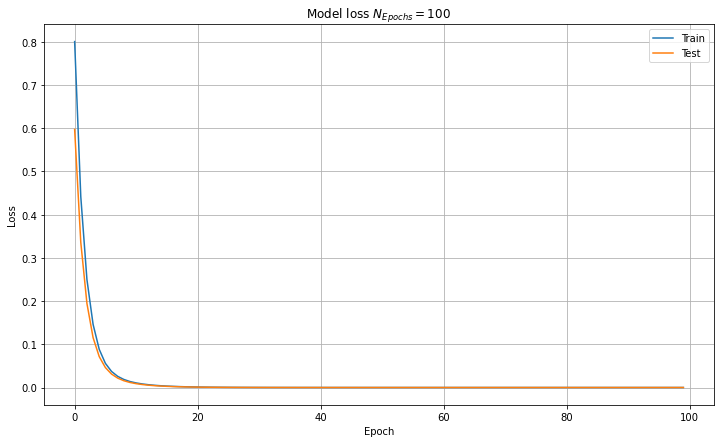

In [48]:
model_100Epochs.get_weights()
score = model_100Epochs.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
# evaluate model
score = model_100Epochs.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# look into training history
# Plot training & validation loss values
figure= plt.subplots(figsize=((8,5)))
plt.plot(history100.history['loss'])
plt.plot(history100.history['val_loss'])
plt.title('Model loss $N_{Epochs}=100$')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()


In [49]:
# return weights and biases
model_100Epochs.get_weights()

[array([[1.9999901]], dtype=float32), array([0.9999995], dtype=float32)]

Let us see the performance of the model

4/4 [==============================] - 0s 1ms/step


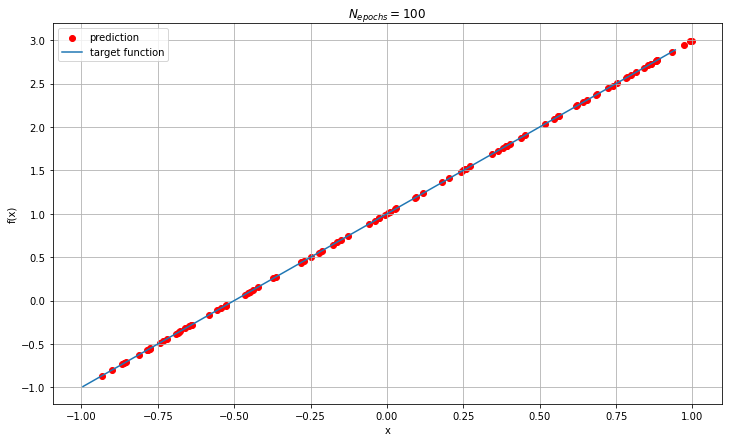

In [50]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model_100Epochs.predict(x_predicted)
figure1=plt.subplots(figsize=(8,5))
plt.scatter(x_predicted, y_predicted,color='r', label='prediction')
plt.title('$N_{epochs}=100$')
plt.plot(x_valid, y_target, label='target function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

# Try 3: $N_{epochs}=500$

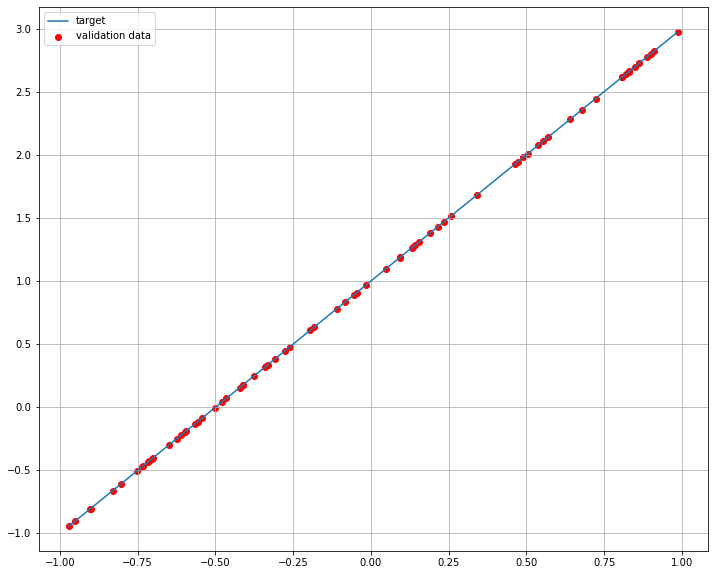

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
16/16 [==============================] - 1s 11ms/step - loss: 0.9425 - mse: 0.9425 - val_loss: 0.6908 - val_mse: 0.6908
Epoch 2/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5605 - mse: 0.5605 - val_loss: 0.4201 - val_mse: 0.4201
Epoch 3/500
16/16 [==============================] - 0s 2ms/step - loss: 0.3470 - mse: 0.3470 - val_loss: 0.2663 - val_mse: 0.2663
Epoch 4/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2242 - mse: 0.2242 - val_loss: 0.1785 - val_mse: 0.1785
Epoch 5/500
16/16 [==============================] - 0s 2ms/ste

16/16 [==============================] - 0s 2ms/step - loss: 1.6517e-11 - mse: 1.6517e-11 - val_loss: 1.6434e-11 - val_mse: 1.6434e-11
Epoch 111/500
16/16 [==============================] - 0s 2ms/step - loss: 1.5755e-11 - mse: 1.5755e-11 - val_loss: 1.5905e-11 - val_mse: 1.5905e-11
Epoch 112/500
16/16 [==============================] - 0s 3ms/step - loss: 1.5416e-11 - mse: 1.5416e-11 - val_loss: 1.5298e-11 - val_mse: 1.5298e-11
Epoch 113/500
16/16 [==============================] - 0s 2ms/step - loss: 1.5125e-11 - mse: 1.5125e-11 - val_loss: 1.5298e-11 - val_mse: 1.5298e-11
Epoch 114/500
16/16 [==============================] - 0s 2ms/step - loss: 1.4391e-11 - mse: 1.4391e-11 - val_loss: 1.4369e-11 - val_mse: 1.4369e-11
Epoch 115/500
16/16 [==============================] - 0s 2ms/step - loss: 1.4079e-11 - mse: 1.4079e-11 - val_loss: 1.4369e-11 - val_mse: 1.4369e-11
Epoch 116/500
16/16 [==============================] - 0s 2ms/step - loss: 1.4079e-11 - mse: 1.4079e-11 - val_loss: 1.43

16/16 [==============================] - 0s 3ms/step - loss: 1.2553e-11 - mse: 1.2553e-11 - val_loss: 1.2655e-11 - val_mse: 1.2655e-11
Epoch 166/500
16/16 [==============================] - 0s 3ms/step - loss: 1.2553e-11 - mse: 1.2553e-11 - val_loss: 1.2655e-11 - val_mse: 1.2655e-11
Epoch 167/500
16/16 [==============================] - 0s 3ms/step - loss: 1.2562e-11 - mse: 1.2562e-11 - val_loss: 1.2766e-11 - val_mse: 1.2766e-11
Epoch 168/500
16/16 [==============================] - 0s 3ms/step - loss: 1.2549e-11 - mse: 1.2549e-11 - val_loss: 1.2766e-11 - val_mse: 1.2766e-11
Epoch 169/500
16/16 [==============================] - 0s 3ms/step - loss: 1.2578e-11 - mse: 1.2578e-11 - val_loss: 1.2808e-11 - val_mse: 1.2808e-11
Epoch 170/500
16/16 [==============================] - 0s 3ms/step - loss: 1.2568e-11 - mse: 1.2568e-11 - val_loss: 1.2808e-11 - val_mse: 1.2808e-11
Epoch 171/500
16/16 [==============================] - 0s 3ms/step - loss: 1.2568e-11 - mse: 1.2568e-11 - val_loss: 1.21

16/16 [==============================] - 0s 3ms/step - loss: 1.1602e-11 - mse: 1.1602e-11 - val_loss: 1.1821e-11 - val_mse: 1.1821e-11
Epoch 221/500
16/16 [==============================] - 0s 3ms/step - loss: 1.1602e-11 - mse: 1.1602e-11 - val_loss: 1.1821e-11 - val_mse: 1.1821e-11
Epoch 222/500
16/16 [==============================] - 0s 3ms/step - loss: 1.1602e-11 - mse: 1.1602e-11 - val_loss: 1.1821e-11 - val_mse: 1.1821e-11
Epoch 223/500
16/16 [==============================] - 0s 3ms/step - loss: 1.1602e-11 - mse: 1.1602e-11 - val_loss: 1.1821e-11 - val_mse: 1.1821e-11
Epoch 224/500
16/16 [==============================] - 0s 2ms/step - loss: 1.1602e-11 - mse: 1.1602e-11 - val_loss: 1.1821e-11 - val_mse: 1.1821e-11
Epoch 225/500
16/16 [==============================] - 0s 3ms/step - loss: 1.1583e-11 - mse: 1.1583e-11 - val_loss: 1.1886e-11 - val_mse: 1.1886e-11
Epoch 226/500
16/16 [==============================] - 0s 3ms/step - loss: 1.1598e-11 - mse: 1.1598e-11 - val_loss: 1.18

16/16 [==============================] - 0s 3ms/step - loss: 1.0699e-11 - mse: 1.0699e-11 - val_loss: 1.0794e-11 - val_mse: 1.0794e-11
Epoch 276/500
16/16 [==============================] - 0s 3ms/step - loss: 1.0699e-11 - mse: 1.0699e-11 - val_loss: 1.0794e-11 - val_mse: 1.0794e-11
Epoch 277/500
16/16 [==============================] - 0s 3ms/step - loss: 1.0699e-11 - mse: 1.0699e-11 - val_loss: 1.0794e-11 - val_mse: 1.0794e-11
Epoch 278/500
16/16 [==============================] - 0s 2ms/step - loss: 1.0699e-11 - mse: 1.0699e-11 - val_loss: 1.0794e-11 - val_mse: 1.0794e-11
Epoch 279/500
16/16 [==============================] - 0s 2ms/step - loss: 1.0699e-11 - mse: 1.0699e-11 - val_loss: 1.0794e-11 - val_mse: 1.0794e-11
Epoch 280/500
16/16 [==============================] - 0s 2ms/step - loss: 1.0699e-11 - mse: 1.0699e-11 - val_loss: 1.0794e-11 - val_mse: 1.0794e-11
Epoch 281/500
16/16 [==============================] - 0s 3ms/step - loss: 1.0699e-11 - mse: 1.0699e-11 - val_loss: 1.07

16/16 [==============================] - 0s 2ms/step - loss: 1.0699e-11 - mse: 1.0699e-11 - val_loss: 1.0794e-11 - val_mse: 1.0794e-11
Epoch 331/500
16/16 [==============================] - 0s 3ms/step - loss: 1.0699e-11 - mse: 1.0699e-11 - val_loss: 1.0794e-11 - val_mse: 1.0794e-11
Epoch 332/500
16/16 [==============================] - 0s 3ms/step - loss: 1.0699e-11 - mse: 1.0699e-11 - val_loss: 1.0794e-11 - val_mse: 1.0794e-11
Epoch 333/500
16/16 [==============================] - 0s 3ms/step - loss: 1.0699e-11 - mse: 1.0699e-11 - val_loss: 1.0794e-11 - val_mse: 1.0794e-11
Epoch 334/500
16/16 [==============================] - 0s 2ms/step - loss: 1.0699e-11 - mse: 1.0699e-11 - val_loss: 1.0794e-11 - val_mse: 1.0794e-11
Epoch 335/500
16/16 [==============================] - 0s 3ms/step - loss: 1.0699e-11 - mse: 1.0699e-11 - val_loss: 1.0794e-11 - val_mse: 1.0794e-11
Epoch 336/500
16/16 [==============================] - 0s 3ms/step - loss: 1.0699e-11 - mse: 1.0699e-11 - val_loss: 1.07

16/16 [==============================] - 0s 2ms/step - loss: 1.0702e-11 - mse: 1.0702e-11 - val_loss: 1.0836e-11 - val_mse: 1.0836e-11
Epoch 386/500
16/16 [==============================] - 0s 2ms/step - loss: 1.0715e-11 - mse: 1.0715e-11 - val_loss: 1.0961e-11 - val_mse: 1.0961e-11
Epoch 387/500
16/16 [==============================] - 0s 2ms/step - loss: 1.0695e-11 - mse: 1.0695e-11 - val_loss: 1.0961e-11 - val_mse: 1.0961e-11
Epoch 388/500
16/16 [==============================] - 0s 2ms/step - loss: 1.0695e-11 - mse: 1.0695e-11 - val_loss: 1.0961e-11 - val_mse: 1.0961e-11
Epoch 389/500
16/16 [==============================] - 0s 2ms/step - loss: 1.0695e-11 - mse: 1.0695e-11 - val_loss: 1.0961e-11 - val_mse: 1.0961e-11
Epoch 390/500
16/16 [==============================] - 0s 2ms/step - loss: 1.0695e-11 - mse: 1.0695e-11 - val_loss: 1.0961e-11 - val_mse: 1.0961e-11
Epoch 391/500
16/16 [==============================] - 0s 2ms/step - loss: 1.0695e-11 - mse: 1.0695e-11 - val_loss: 1.09

16/16 [==============================] - 0s 2ms/step - loss: 1.0666e-11 - mse: 1.0666e-11 - val_loss: 1.0918e-11 - val_mse: 1.0918e-11
Epoch 441/500
16/16 [==============================] - 0s 2ms/step - loss: 1.0666e-11 - mse: 1.0666e-11 - val_loss: 1.0918e-11 - val_mse: 1.0918e-11
Epoch 442/500
16/16 [==============================] - 0s 3ms/step - loss: 1.0666e-11 - mse: 1.0666e-11 - val_loss: 1.0918e-11 - val_mse: 1.0918e-11
Epoch 443/500
16/16 [==============================] - 0s 3ms/step - loss: 1.0666e-11 - mse: 1.0666e-11 - val_loss: 1.0918e-11 - val_mse: 1.0918e-11
Epoch 444/500
16/16 [==============================] - 0s 3ms/step - loss: 1.0666e-11 - mse: 1.0666e-11 - val_loss: 1.0822e-11 - val_mse: 1.0822e-11
Epoch 445/500
16/16 [==============================] - 0s 2ms/step - loss: 1.0687e-11 - mse: 1.0687e-11 - val_loss: 1.0822e-11 - val_mse: 1.0822e-11
Epoch 446/500
16/16 [==============================] - 0s 2ms/step - loss: 1.0687e-11 - mse: 1.0687e-11 - val_loss: 1.08

16/16 [==============================] - 0s 2ms/step - loss: 1.0229e-11 - mse: 1.0229e-11 - val_loss: 1.0327e-11 - val_mse: 1.0327e-11
Epoch 496/500
16/16 [==============================] - 0s 3ms/step - loss: 1.0229e-11 - mse: 1.0229e-11 - val_loss: 1.0327e-11 - val_mse: 1.0327e-11
Epoch 497/500
16/16 [==============================] - 0s 3ms/step - loss: 1.0229e-11 - mse: 1.0229e-11 - val_loss: 1.0327e-11 - val_mse: 1.0327e-11
Epoch 498/500
16/16 [==============================] - 0s 2ms/step - loss: 1.0232e-11 - mse: 1.0232e-11 - val_loss: 1.0282e-11 - val_mse: 1.0282e-11
Epoch 499/500
16/16 [==============================] - 0s 3ms/step - loss: 1.0227e-11 - mse: 1.0227e-11 - val_loss: 1.0282e-11 - val_mse: 1.0282e-11
Epoch 500/500
16/16 [==============================] - 0s 3ms/step - loss: 1.0227e-11 - mse: 1.0227e-11 - val_loss: 1.0282e-11 - val_mse: 1.0282e-11


In [51]:
x_train = np.random.uniform(-1, 1, 500) #training set
x_valid = np.random.uniform(-1, 1, 75) # validation set
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)
# plot validation and target dataset
fig, ax= plt.subplots(figsize=(8,5))
ax.plot(x_valid, y_target, label='target')
ax.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()
model_500Epochs = tf.keras.Sequential()
model_500Epochs.add(Dense(1, input_shape=(1,)))
# compile the model & get a summary
model_500Epochs.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model_500Epochs.summary()
history500 = model_500Epochs.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=500,
          shuffle=True, #  shuffle input before at each epoch
          validation_data=(x_valid, y_valid))


In [52]:
model_500Epochs.get_weights()

[array([[1.9999945]], dtype=float32), array([0.99999976], dtype=float32)]

3/3 [==============================] - 0s 2ms/step - loss: 1.0282e-11 - mse: 1.0282e-11

Test loss: 1.0282368706482359e-11
Test accuracy: 1.0282368706482359e-11


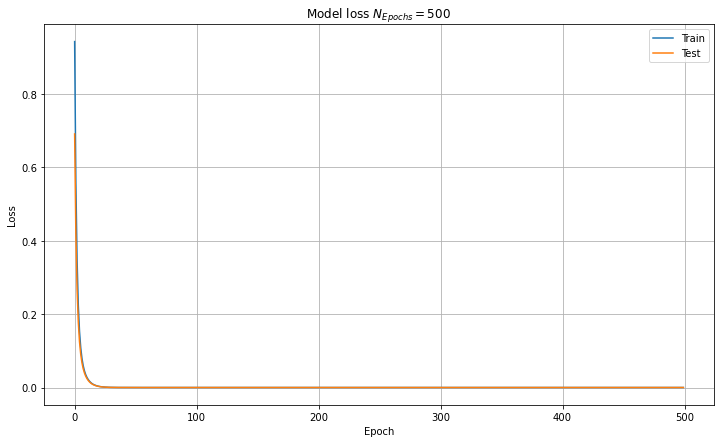

In [53]:
score = model_500Epochs.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
# evaluate model
score = model_500Epochs.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# look into training history
# Plot training & validation loss values
figure= plt.subplots(figsize=(8,5))
plt.plot(history500.history['loss'])
plt.plot(history500.history['val_loss'])
plt.title('Model loss $N_{Epochs}=500$')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()

4/4 [==============================] - 0s 3ms/step


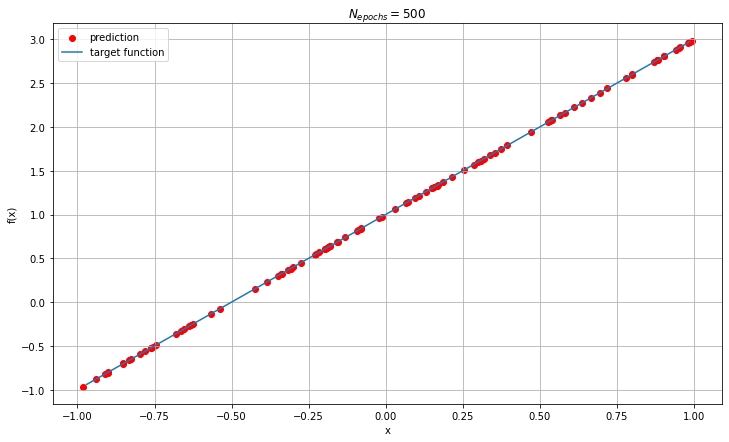

In [54]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model_500Epochs.predict(x_predicted)
figure1=plt.subplots(figsize=(8,5))
plt.scatter(x_predicted, y_predicted,color='r', label='prediction')
plt.title('$N_{epochs}=500$')
plt.plot(x_valid, y_target, label='target function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

# Try 4 $N_{epochs}=1000$

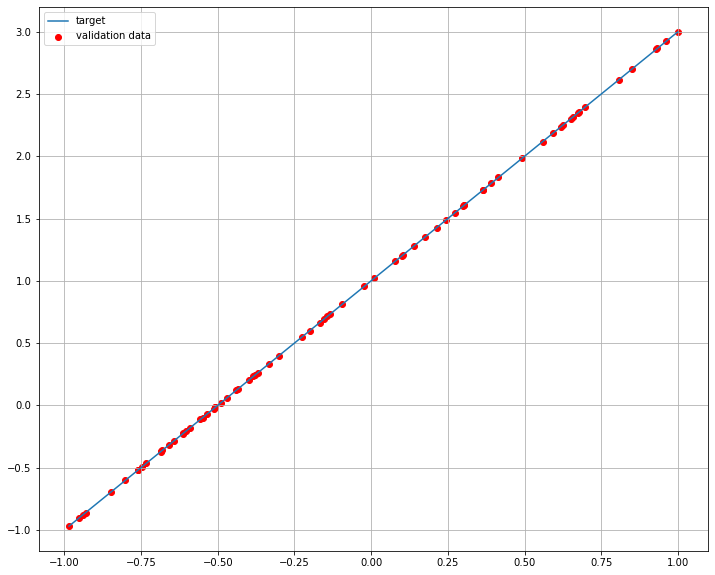

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
16/16 [==============================] - 0s 12ms/step - loss: 2.5946 - mse: 2.5946 - val_loss: 1.9891 - val_mse: 1.9891
Epoch 2/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.9342 - mse: 1.9342 - val_loss: 1.5304 - val_mse: 1.5304
Epoch 3/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.4840 - mse: 1.4840 - val_loss: 1.2024 - val_mse: 1.2024
Epoch 4/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.1595 - mse: 1.1595 - val_loss: 0.9593 - val_mse: 0.9593
Epoch 5/1000
16/16 [==============================] - 0s 2m

16/16 [==============================] - 0s 2ms/step - loss: 2.6932e-10 - mse: 2.6932e-10 - val_loss: 2.3940e-10 - val_mse: 2.3940e-10
Epoch 112/1000
16/16 [==============================] - 0s 3ms/step - loss: 2.2165e-10 - mse: 2.2165e-10 - val_loss: 1.9920e-10 - val_mse: 1.9920e-10
Epoch 113/1000
16/16 [==============================] - 0s 3ms/step - loss: 1.8410e-10 - mse: 1.8410e-10 - val_loss: 1.6468e-10 - val_mse: 1.6468e-10
Epoch 114/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.5172e-10 - mse: 1.5172e-10 - val_loss: 1.3515e-10 - val_mse: 1.3515e-10
Epoch 115/1000
16/16 [==============================] - 0s 3ms/step - loss: 1.2401e-10 - mse: 1.2401e-10 - val_loss: 1.1101e-10 - val_mse: 1.1101e-10
Epoch 116/1000
16/16 [==============================] - 0s 3ms/step - loss: 1.0118e-10 - mse: 1.0118e-10 - val_loss: 8.9149e-11 - val_mse: 8.9149e-11
Epoch 117/1000
16/16 [==============================] - 0s 2ms/step - loss: 8.0687e-11 - mse: 8.0687e-11 - val_loss

Epoch 166/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.2835e-11 - mse: 1.2835e-11 - val_loss: 1.2979e-11 - val_mse: 1.2979e-11
Epoch 167/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.2834e-11 - mse: 1.2834e-11 - val_loss: 1.2979e-11 - val_mse: 1.2979e-11
Epoch 168/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.2834e-11 - mse: 1.2834e-11 - val_loss: 1.2979e-11 - val_mse: 1.2979e-11
Epoch 169/1000
16/16 [==============================] - 0s 3ms/step - loss: 1.2834e-11 - mse: 1.2834e-11 - val_loss: 1.2979e-11 - val_mse: 1.2979e-11
Epoch 170/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.2834e-11 - mse: 1.2834e-11 - val_loss: 1.2979e-11 - val_mse: 1.2979e-11
Epoch 171/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.2834e-11 - mse: 1.2834e-11 - val_loss: 1.2979e-11 - val_mse: 1.2979e-11
Epoch 172/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.2834e-11 - mse: 1.2834

Epoch 275/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.2354e-11 - mse: 1.2354e-11 - val_loss: 1.2231e-11 - val_mse: 1.2231e-11
Epoch 276/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.2354e-11 - mse: 1.2354e-11 - val_loss: 1.2231e-11 - val_mse: 1.2231e-11
Epoch 277/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.2354e-11 - mse: 1.2354e-11 - val_loss: 1.2282e-11 - val_mse: 1.2282e-11
Epoch 278/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.2361e-11 - mse: 1.2361e-11 - val_loss: 1.2282e-11 - val_mse: 1.2282e-11
Epoch 279/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.2361e-11 - mse: 1.2361e-11 - val_loss: 1.2282e-11 - val_mse: 1.2282e-11
Epoch 280/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.2361e-11 - mse: 1.2361e-11 - val_loss: 1.2282e-11 - val_mse: 1.2282e-11
Epoch 281/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.2361e-11 - mse: 1.2361

Epoch 384/1000
16/16 [==============================] - 0s 3ms/step - loss: 1.1893e-11 - mse: 1.1893e-11 - val_loss: 1.1966e-11 - val_mse: 1.1966e-11
Epoch 385/1000
16/16 [==============================] - 0s 3ms/step - loss: 1.1893e-11 - mse: 1.1893e-11 - val_loss: 1.1966e-11 - val_mse: 1.1966e-11
Epoch 386/1000
16/16 [==============================] - 0s 3ms/step - loss: 1.1893e-11 - mse: 1.1893e-11 - val_loss: 1.1966e-11 - val_mse: 1.1966e-11
Epoch 387/1000
16/16 [==============================] - 0s 3ms/step - loss: 1.1900e-11 - mse: 1.1900e-11 - val_loss: 1.1892e-11 - val_mse: 1.1892e-11
Epoch 388/1000
16/16 [==============================] - 0s 3ms/step - loss: 1.1852e-11 - mse: 1.1852e-11 - val_loss: 1.1892e-11 - val_mse: 1.1892e-11
Epoch 389/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.1852e-11 - mse: 1.1852e-11 - val_loss: 1.1892e-11 - val_mse: 1.1892e-11
Epoch 390/1000
16/16 [==============================] - 0s 3ms/step - loss: 1.1852e-11 - mse: 1.1852

Epoch 493/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.1417e-11 - mse: 1.1417e-11 - val_loss: 1.1354e-11 - val_mse: 1.1354e-11
Epoch 494/1000
16/16 [==============================] - 0s 3ms/step - loss: 1.1390e-11 - mse: 1.1390e-11 - val_loss: 1.1354e-11 - val_mse: 1.1354e-11
Epoch 495/1000
16/16 [==============================] - 0s 3ms/step - loss: 1.1390e-11 - mse: 1.1390e-11 - val_loss: 1.1354e-11 - val_mse: 1.1354e-11
Epoch 496/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.1390e-11 - mse: 1.1390e-11 - val_loss: 1.1354e-11 - val_mse: 1.1354e-11
Epoch 497/1000
16/16 [==============================] - 0s 3ms/step - loss: 1.1257e-11 - mse: 1.1257e-11 - val_loss: 1.0995e-11 - val_mse: 1.0995e-11
Epoch 498/1000
16/16 [==============================] - 0s 3ms/step - loss: 1.0980e-11 - mse: 1.0980e-11 - val_loss: 1.0925e-11 - val_mse: 1.0925e-11
Epoch 499/1000
16/16 [==============================] - 0s 3ms/step - loss: 1.0951e-11 - mse: 1.0951

Epoch 602/1000
16/16 [==============================] - 0s 3ms/step - loss: 1.0943e-11 - mse: 1.0943e-11 - val_loss: 1.1103e-11 - val_mse: 1.1103e-11
Epoch 603/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.0943e-11 - mse: 1.0943e-11 - val_loss: 1.1103e-11 - val_mse: 1.1103e-11
Epoch 604/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.0943e-11 - mse: 1.0943e-11 - val_loss: 1.1103e-11 - val_mse: 1.1103e-11
Epoch 605/1000
16/16 [==============================] - 0s 3ms/step - loss: 1.0943e-11 - mse: 1.0943e-11 - val_loss: 1.1103e-11 - val_mse: 1.1103e-11
Epoch 606/1000
16/16 [==============================] - 0s 3ms/step - loss: 1.0943e-11 - mse: 1.0943e-11 - val_loss: 1.1103e-11 - val_mse: 1.1103e-11
Epoch 607/1000
16/16 [==============================] - 0s 3ms/step - loss: 1.0943e-11 - mse: 1.0943e-11 - val_loss: 1.1103e-11 - val_mse: 1.1103e-11
Epoch 608/1000
16/16 [==============================] - 0s 3ms/step - loss: 1.0943e-11 - mse: 1.0943

Epoch 711/1000
16/16 [==============================] - 0s 3ms/step - loss: 1.0927e-11 - mse: 1.0927e-11 - val_loss: 1.1043e-11 - val_mse: 1.1043e-11
Epoch 712/1000
16/16 [==============================] - 0s 3ms/step - loss: 1.0927e-11 - mse: 1.0927e-11 - val_loss: 1.1043e-11 - val_mse: 1.1043e-11
Epoch 713/1000
16/16 [==============================] - 0s 3ms/step - loss: 1.0927e-11 - mse: 1.0927e-11 - val_loss: 1.1043e-11 - val_mse: 1.1043e-11
Epoch 714/1000
16/16 [==============================] - 0s 3ms/step - loss: 1.0927e-11 - mse: 1.0927e-11 - val_loss: 1.1043e-11 - val_mse: 1.1043e-11
Epoch 715/1000
16/16 [==============================] - 0s 3ms/step - loss: 1.0927e-11 - mse: 1.0927e-11 - val_loss: 1.1043e-11 - val_mse: 1.1043e-11
Epoch 716/1000
16/16 [==============================] - 0s 3ms/step - loss: 1.0927e-11 - mse: 1.0927e-11 - val_loss: 1.1043e-11 - val_mse: 1.1043e-11
Epoch 717/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.0927e-11 - mse: 1.0927

Epoch 820/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.0524e-11 - mse: 1.0524e-11 - val_loss: 1.0565e-11 - val_mse: 1.0565e-11
Epoch 821/1000
16/16 [==============================] - 0s 3ms/step - loss: 1.0524e-11 - mse: 1.0524e-11 - val_loss: 1.0565e-11 - val_mse: 1.0565e-11
Epoch 822/1000
16/16 [==============================] - 0s 3ms/step - loss: 1.0524e-11 - mse: 1.0524e-11 - val_loss: 1.0701e-11 - val_mse: 1.0701e-11
Epoch 823/1000
16/16 [==============================] - 0s 3ms/step - loss: 1.0520e-11 - mse: 1.0520e-11 - val_loss: 1.0701e-11 - val_mse: 1.0701e-11
Epoch 824/1000
16/16 [==============================] - 0s 3ms/step - loss: 1.0519e-11 - mse: 1.0519e-11 - val_loss: 1.0565e-11 - val_mse: 1.0565e-11
Epoch 825/1000
16/16 [==============================] - 0s 3ms/step - loss: 1.0524e-11 - mse: 1.0524e-11 - val_loss: 1.0565e-11 - val_mse: 1.0565e-11
Epoch 826/1000
16/16 [==============================] - 0s 3ms/step - loss: 1.0524e-11 - mse: 1.0524

Epoch 929/1000
16/16 [==============================] - 0s 3ms/step - loss: 1.0096e-11 - mse: 1.0096e-11 - val_loss: 1.0166e-11 - val_mse: 1.0166e-11
Epoch 930/1000
16/16 [==============================] - 0s 3ms/step - loss: 1.0096e-11 - mse: 1.0096e-11 - val_loss: 1.0166e-11 - val_mse: 1.0166e-11
Epoch 931/1000
16/16 [==============================] - 0s 3ms/step - loss: 1.0096e-11 - mse: 1.0096e-11 - val_loss: 1.0166e-11 - val_mse: 1.0166e-11
Epoch 932/1000
16/16 [==============================] - 0s 3ms/step - loss: 1.0096e-11 - mse: 1.0096e-11 - val_loss: 1.0166e-11 - val_mse: 1.0166e-11
Epoch 933/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.0096e-11 - mse: 1.0096e-11 - val_loss: 1.0166e-11 - val_mse: 1.0166e-11
Epoch 934/1000
16/16 [==============================] - 0s 3ms/step - loss: 1.0096e-11 - mse: 1.0096e-11 - val_loss: 1.0166e-11 - val_mse: 1.0166e-11
Epoch 935/1000
16/16 [==============================] - 0s 3ms/step - loss: 1.0096e-11 - mse: 1.0096

In [55]:
x_train = np.random.uniform(-1, 1, 500) #training set
x_valid = np.random.uniform(-1, 1, 75) # validation set
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)
# plot validation and target dataset
fig, ax= plt.subplots(figsize=(8,5))
ax.plot(x_valid, y_target, label='target')
ax.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()
model_1000Epochs = tf.keras.Sequential()
model_1000Epochs.add(Dense(1, input_shape=(1,)))
# compile the model & get a summary
model_1000Epochs.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model_1000Epochs.summary()
history1000 = model_1000Epochs.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=1000,
          shuffle=True, #  shuffle input before at each epoch
          validation_data=(x_valid, y_valid))


In [56]:
model_1000Epochs.get_weights()

[array([[1.9999944]], dtype=float32), array([1.], dtype=float32)]

3/3 [==============================] - 0s 2ms/step - loss: 1.0241e-11 - mse: 1.0241e-11

Test loss: 1.0241154278778364e-11
Test accuracy: 1.0241154278778364e-11


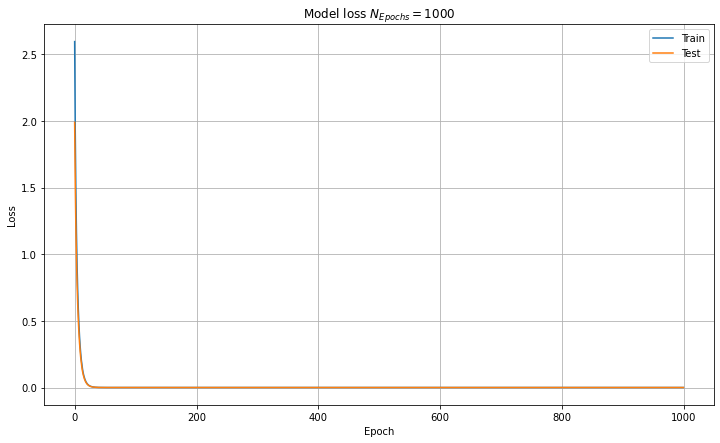

In [57]:
score = model_1000Epochs.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
# evaluate model
score = model_1000Epochs.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# look into training history
# Plot training & validation loss values
figure= plt.subplots(figsize=(8,5))
plt.plot(history1000.history['loss'])
plt.plot(history1000.history['val_loss'])
plt.title('Model loss $N_{Epochs}=1000$')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()

Let's see the results after the training.

4/4 [==============================] - 0s 1ms/step


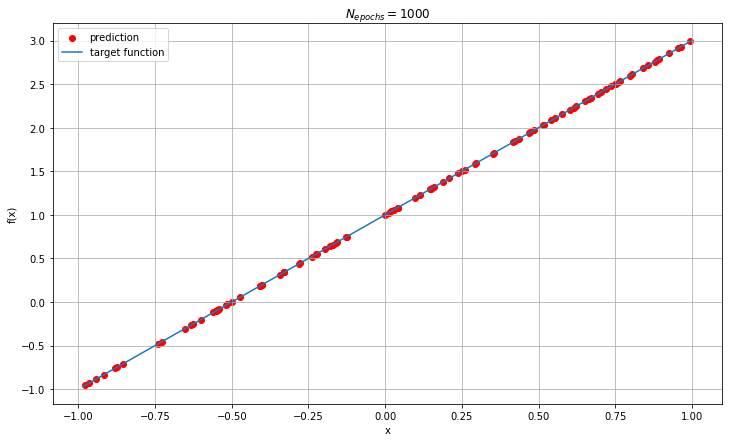

In [58]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model_1000Epochs.predict(x_predicted)
figure1=plt.subplots(figsize=(8,5))
plt.scatter(x_predicted, y_predicted,color='r', label='prediction')
plt.title('$N_{epochs}=1000$')
plt.plot(x_valid, y_target, label='target function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

# Summary: variation of the number of epochs:
We can see that increasing the number of epochs, the quality of the prediction progressively increases.
The parameters of the model, namely the slope and the intercept, get closer and closer to the target values of 2 and 1, as the number of epochs grows. To be more precise, the best performance, in terms of the parameters, is obtained after 100 epochs. The values obtained after 1000 epochs are comparable with the ones obtained in the previous case, 500 epochs.
Before changing the number of points in the training dataset, let's check if there is some risk of overfitting.
To check it, let's see the behaviour of the difference between the  validation error and the training error. The validation error is higher in, the last two cases,  than the training error, but this is common in those instances in which, the neural network is trying to predict the value of a function on new datas: Moreover, since their difference is very small, there is no risk of overfitting.
We can conclude that the best number of epochs is 500. 



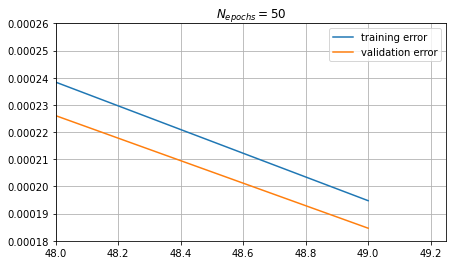

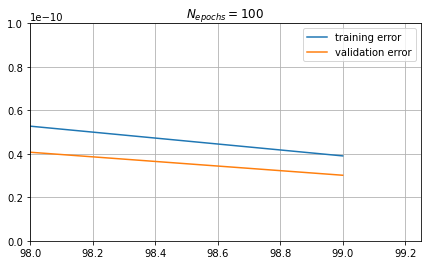

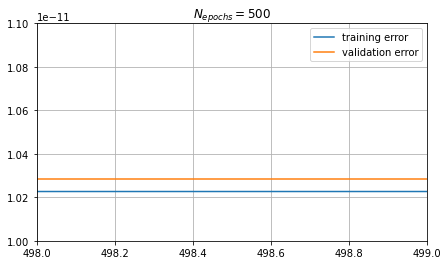

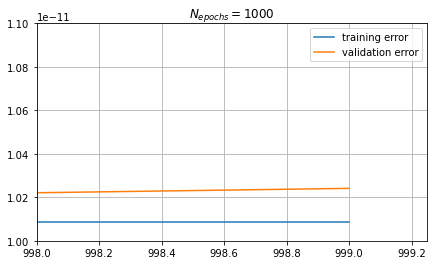

In [109]:
figure= plt.subplots(figsize=(7,4))
plt.title('$N_{epochs}=50$')
plt.plot(history50.history['loss'],label='training error')
plt.plot(history50.history['val_loss'],label='validation error')
plt.xlim((48,49.25))
plt.ylim((1.8/10000,2.6/10000))
plt.grid(True)
plt.legend()


figure= plt.subplots(figsize=(7,4))
plt.title('$N_{epochs}=100$')
plt.plot(history100.history['loss'],label='training error')
plt.plot(history100.history['val_loss'],label='validation error')
plt.xlim((98,99.25))
plt.ylim((0,1/10000000000))
plt.grid(True)
plt.legend()

figure= plt.subplots(figsize=(7,4))
plt.title('$N_{epochs}=500$')
plt.plot(history500.history['loss'],label='training error')
plt.plot(history500.history['val_loss'],label='validation error')
plt.xlim((498,499))
plt.ylim((0.1/10000000000,0.11/10000000000))
plt.grid(True)
plt.legend()


figure= plt.subplots(figsize=(7,4))
plt.title('$N_{epochs}=1000$')
plt.plot(history1000.history['loss'],label='training error')
plt.plot(history1000.history['val_loss'],label='validation error')
plt.xlim((998,999.25))
plt.ylim((0.1/10000000000,0.11/10000000000))
plt.grid(True)
plt.legend()


# Variation of the number of points in the training set.
Once the number of epochs has been fixed, let's change the nmber of points in the training dataset: note that the batch size, the number of points in the training set and the number of points in the validation dataset  are strictly correlated, so they should be changed together. As a rule of thumb, let's keep a ratio of $\frac{1}{10}$ between the number of point in the training set and the validation set. A similar ratio could be used between the batchsize and the training set.
 
 - Firtst try
 $N_{train}=100$, $N_{valid}=10$, $ Batchsize = 25$
 - Second Try
 $N_{train}=500$, $N_{valid}=50$, $ Batchsize = 32$
 - Third Try
 $N_{train}=750$, $N_{valid}=75$, $ Batchsize = 50$
 - Fourth Try
 $N_{train}=1000$, $N_{valid}=100$, $Batchsize = 75$
 - Fifth Try
 $N_{train}=10000$, $N_{valid}=1000$, $ Batchsize = 500$


# First try: $N_{train}=100$, $N_{valid}=10$, $ Batchsize = 25$

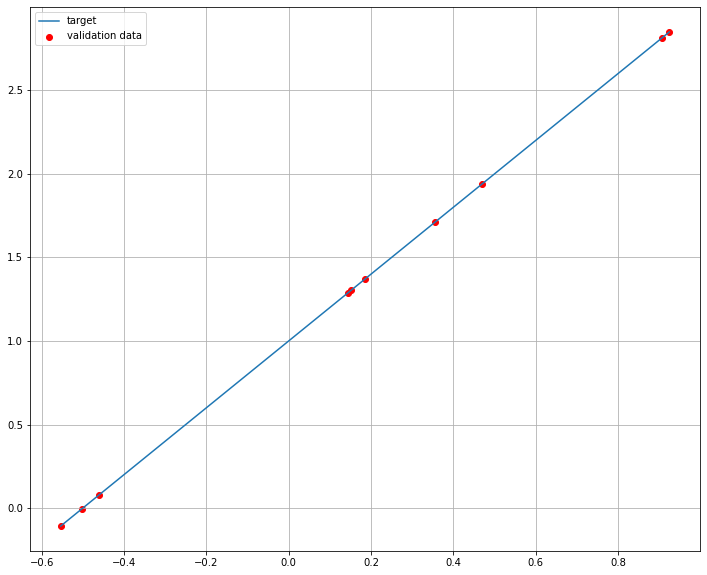

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
4/4 [==============================] - 1s 168ms/step - loss: 1.5729 - mse: 1.5729 - val_loss: 1.9692 - val_mse: 1.9692
Epoch 2/500
4/4 [==============================] - 0s 11ms/step - loss: 1.4199 - mse: 1.4199 - val_loss: 1.7782 - val_mse: 1.7782
Epoch 3/500
4/4 [==============================] - 0s 14ms/step - loss: 1.2864 - mse: 1.2864 - val_loss: 1.6088 - val_mse: 1.6088
Epoch 4/500
4/4 [==============================] - 0s 16ms/step - loss: 1.1683 - mse: 1.1683 - val_loss: 1.4587 - val_mse: 1.4587
Epoch 5/500
4/4 [==============================] - 0s 13ms/step - los

4/4 [==============================] - 0s 16ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 122/500
4/4 [==============================] - 0s 12ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 123/500
4/4 [==============================] - 0s 15ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 124/500
4/4 [==============================] - 0s 17ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 125/500
4/4 [==============================] - 0s 18ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 126/500
4/4 [==============================] - 0s 17ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 127/500
4/4 [==============================] - 0s 17ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 9.7684e-04 - val_mse: 9.7684e-04
Epoch 128/500
4/4 [==============================] - 0s 17ms/step - loss: 9.9781e-

4/4 [==============================] - 0s 13ms/step - loss: 3.9591e-06 - mse: 3.9591e-06 - val_loss: 3.6763e-06 - val_mse: 3.6763e-06
Epoch 233/500
4/4 [==============================] - 0s 15ms/step - loss: 3.7541e-06 - mse: 3.7541e-06 - val_loss: 3.4864e-06 - val_mse: 3.4864e-06
Epoch 234/500
4/4 [==============================] - 0s 17ms/step - loss: 3.5602e-06 - mse: 3.5602e-06 - val_loss: 3.3062e-06 - val_mse: 3.3062e-06
Epoch 235/500
4/4 [==============================] - 0s 16ms/step - loss: 3.3767e-06 - mse: 3.3767e-06 - val_loss: 3.1354e-06 - val_mse: 3.1354e-06
Epoch 236/500
4/4 [==============================] - 0s 15ms/step - loss: 3.2018e-06 - mse: 3.2018e-06 - val_loss: 2.9732e-06 - val_mse: 2.9732e-06
Epoch 237/500
4/4 [==============================] - 0s 19ms/step - loss: 3.0381e-06 - mse: 3.0381e-06 - val_loss: 2.8193e-06 - val_mse: 2.8193e-06
Epoch 238/500
4/4 [==============================] - 0s 15ms/step - loss: 2.8803e-06 - mse: 2.8803e-06 - val_loss: 2.6730e-06 

4/4 [==============================] - 0s 14ms/step - loss: 1.1440e-08 - mse: 1.1440e-08 - val_loss: 1.0629e-08 - val_mse: 1.0629e-08
Epoch 343/500
4/4 [==============================] - 0s 15ms/step - loss: 1.0856e-08 - mse: 1.0856e-08 - val_loss: 1.0070e-08 - val_mse: 1.0070e-08
Epoch 344/500
4/4 [==============================] - 0s 15ms/step - loss: 1.0289e-08 - mse: 1.0289e-08 - val_loss: 9.5439e-09 - val_mse: 9.5439e-09
Epoch 345/500
4/4 [==============================] - 0s 17ms/step - loss: 9.7517e-09 - mse: 9.7517e-09 - val_loss: 9.0468e-09 - val_mse: 9.0468e-09
Epoch 346/500
4/4 [==============================] - 0s 17ms/step - loss: 9.2475e-09 - mse: 9.2475e-09 - val_loss: 8.5846e-09 - val_mse: 8.5846e-09
Epoch 347/500
4/4 [==============================] - 0s 10ms/step - loss: 8.7639e-09 - mse: 8.7639e-09 - val_loss: 8.1303e-09 - val_mse: 8.1303e-09
Epoch 348/500
4/4 [==============================] - 0s 15ms/step - loss: 8.3168e-09 - mse: 8.3168e-09 - val_loss: 7.6981e-09 

4/4 [==============================] - 0s 15ms/step - loss: 2.8344e-11 - mse: 2.8344e-11 - val_loss: 2.7034e-11 - val_mse: 2.7034e-11
Epoch 453/500
4/4 [==============================] - 0s 13ms/step - loss: 2.7445e-11 - mse: 2.7445e-11 - val_loss: 2.5803e-11 - val_mse: 2.5803e-11
Epoch 454/500
4/4 [==============================] - 0s 15ms/step - loss: 2.5868e-11 - mse: 2.5868e-11 - val_loss: 2.4378e-11 - val_mse: 2.4378e-11
Epoch 455/500
4/4 [==============================] - 0s 16ms/step - loss: 2.4630e-11 - mse: 2.4630e-11 - val_loss: 2.2962e-11 - val_mse: 2.2962e-11
Epoch 456/500
4/4 [==============================] - 0s 16ms/step - loss: 2.3632e-11 - mse: 2.3632e-11 - val_loss: 2.1756e-11 - val_mse: 2.1756e-11
Epoch 457/500
4/4 [==============================] - 0s 14ms/step - loss: 2.2007e-11 - mse: 2.2007e-11 - val_loss: 2.1521e-11 - val_mse: 2.1521e-11
Epoch 458/500
4/4 [==============================] - 0s 15ms/step - loss: 2.1649e-11 - mse: 2.1649e-11 - val_loss: 2.0990e-11 

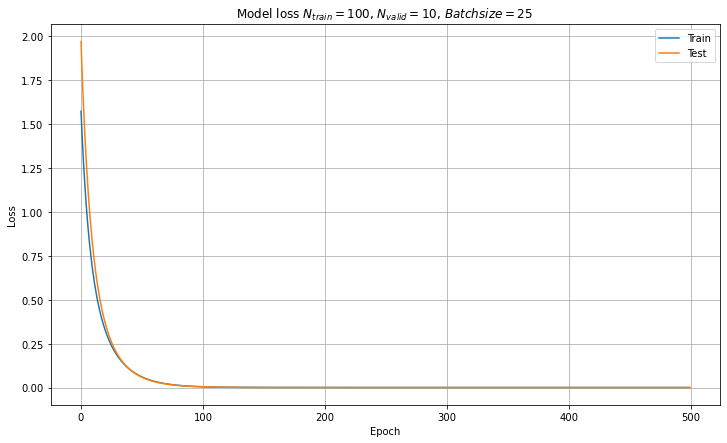

[array([[1.9999934]], dtype=float32), array([0.9999996], dtype=float32)]

In [2]:
x_train1 = np.random.uniform(-1, 1, 100) #training set
x_valid1 = np.random.uniform(-1, 1, 10) # validation set
x_valid1.sort()
y_target1 = m * x_valid1 + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment absent
y_train1 = np.random.normal(m * x_train1 + b, sigma) # actual measures from which we want to guess regression parameters
y_valid1 = np.random.normal(m * x_valid1 + b, sigma)
# plot validation and target dataset
fig, ax= plt.subplots(figsize=(8,5))
ax.plot(x_valid1, y_target1, label='target')
ax.scatter(x_valid1, y_valid1, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()
model_1 = tf.keras.Sequential()
model_1.add(Dense(1, input_shape=(1,)))
# compile the model & get a summary
model_1.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model_1.summary()
history1 = model_1.fit(x=x_train1, y=y_train1, 
          batch_size=25, epochs=500,
          shuffle=True, #  shuffle input before at each epoch
          validation_data=(x_valid1, y_valid1))


score = model_1.evaluate(x_valid1, y_valid1, batch_size=25, verbose=1)
# evaluate model
score = model_1.evaluate(x_valid1, y_valid1, batch_size=25, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# look into training history
# Plot training & validation loss values
figure= plt.subplots(figsize=(8,5))
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss $N_{train}=100$, $N_{valid}=10$, $ Batchsize = 25$ ')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()
model_1.get_weights()

# Second try: $N_{train}=500$, $N_{valid}=50$, $ Batchsize = 32$



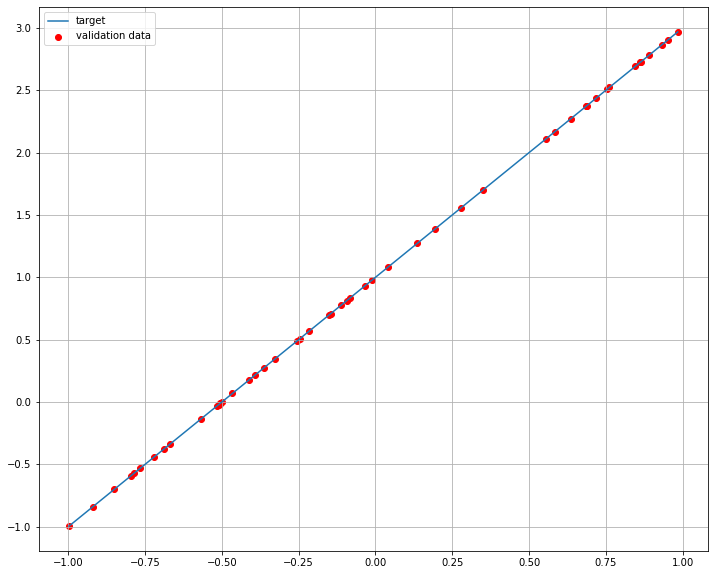

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
10/10 [==============================] - 1s 28ms/step - loss: 2.9625 - mse: 2.9625 - val_loss: 2.7015 - val_mse: 2.7015
Epoch 2/500
10/10 [==============================] - 0s 7ms/step - loss: 2.4247 - mse: 2.4247 - val_loss: 2.2294 - val_mse: 2.2294
Epoch 3/500
10/10 [==============================] - 0s 5ms/step - loss: 2.0070 - mse: 2.0070 - val_loss: 1.8585 - val_mse: 1.8585
Epoch 4/500
10/10 [==============================] - 0s 5ms/step - loss: 1.6776 - mse: 1.6776 - val_loss: 1.5622 - val_mse: 1.5622
Epoch 5/500
10/10 [==============================] - 0s 5ms/ste

Epoch 59/500
10/10 [==============================] - 0s 7ms/step - loss: 6.2989e-04 - mse: 6.2989e-04 - val_loss: 6.0109e-04 - val_mse: 6.0109e-04
Epoch 60/500
10/10 [==============================] - 0s 6ms/step - loss: 5.4704e-04 - mse: 5.4704e-04 - val_loss: 5.2213e-04 - val_mse: 5.2213e-04
Epoch 61/500
10/10 [==============================] - 0s 5ms/step - loss: 4.7522e-04 - mse: 4.7522e-04 - val_loss: 4.5353e-04 - val_mse: 4.5353e-04
Epoch 62/500
10/10 [==============================] - 0s 6ms/step - loss: 4.1288e-04 - mse: 4.1288e-04 - val_loss: 3.9395e-04 - val_mse: 3.9395e-04
Epoch 63/500
10/10 [==============================] - 0s 6ms/step - loss: 3.5880e-04 - mse: 3.5880e-04 - val_loss: 3.4218e-04 - val_mse: 3.4218e-04
Epoch 64/500
10/10 [==============================] - 0s 6ms/step - loss: 3.1162e-04 - mse: 3.1162e-04 - val_loss: 2.9722e-04 - val_mse: 2.9722e-04
Epoch 65/500
10/10 [==============================] - 0s 6ms/step - loss: 2.7056e-04 - mse: 2.7056e-04 - val_los

10/10 [==============================] - 0s 6ms/step - loss: 1.2505e-10 - mse: 1.2505e-10 - val_loss: 1.2021e-10 - val_mse: 1.2021e-10
Epoch 170/500
10/10 [==============================] - 0s 6ms/step - loss: 1.1005e-10 - mse: 1.1005e-10 - val_loss: 1.0480e-10 - val_mse: 1.0480e-10
Epoch 171/500
10/10 [==============================] - 0s 4ms/step - loss: 9.5826e-11 - mse: 9.5826e-11 - val_loss: 9.0343e-11 - val_mse: 9.0343e-11
Epoch 172/500
10/10 [==============================] - 0s 5ms/step - loss: 8.2450e-11 - mse: 8.2450e-11 - val_loss: 7.7445e-11 - val_mse: 7.7445e-11
Epoch 173/500
10/10 [==============================] - 0s 6ms/step - loss: 7.0075e-11 - mse: 7.0075e-11 - val_loss: 6.5445e-11 - val_mse: 6.5445e-11
Epoch 174/500
10/10 [==============================] - 0s 6ms/step - loss: 5.8849e-11 - mse: 5.8849e-11 - val_loss: 5.4461e-11 - val_mse: 5.4461e-11
Epoch 175/500
10/10 [==============================] - 0s 6ms/step - loss: 4.8469e-11 - mse: 4.8469e-11 - val_loss: 4.43

10/10 [==============================] - 0s 6ms/step - loss: 1.3451e-11 - mse: 1.3451e-11 - val_loss: 1.3834e-11 - val_mse: 1.3834e-11
Epoch 225/500
10/10 [==============================] - 0s 6ms/step - loss: 1.3451e-11 - mse: 1.3451e-11 - val_loss: 1.3834e-11 - val_mse: 1.3834e-11
Epoch 226/500
10/10 [==============================] - 0s 6ms/step - loss: 1.3451e-11 - mse: 1.3451e-11 - val_loss: 1.3834e-11 - val_mse: 1.3834e-11
Epoch 227/500
10/10 [==============================] - 0s 6ms/step - loss: 1.3451e-11 - mse: 1.3451e-11 - val_loss: 1.3834e-11 - val_mse: 1.3834e-11
Epoch 228/500
10/10 [==============================] - 0s 6ms/step - loss: 1.3451e-11 - mse: 1.3451e-11 - val_loss: 1.3834e-11 - val_mse: 1.3834e-11
Epoch 229/500
10/10 [==============================] - 0s 6ms/step - loss: 1.3444e-11 - mse: 1.3444e-11 - val_loss: 1.3826e-11 - val_mse: 1.3826e-11
Epoch 230/500
10/10 [==============================] - 0s 6ms/step - loss: 1.3469e-11 - mse: 1.3469e-11 - val_loss: 1.38

10/10 [==============================] - 0s 6ms/step - loss: 1.3451e-11 - mse: 1.3451e-11 - val_loss: 1.3834e-11 - val_mse: 1.3834e-11
Epoch 280/500
10/10 [==============================] - 0s 6ms/step - loss: 1.3451e-11 - mse: 1.3451e-11 - val_loss: 1.3834e-11 - val_mse: 1.3834e-11
Epoch 281/500
10/10 [==============================] - 0s 6ms/step - loss: 1.3451e-11 - mse: 1.3451e-11 - val_loss: 1.3834e-11 - val_mse: 1.3834e-11
Epoch 282/500
10/10 [==============================] - 0s 6ms/step - loss: 1.3451e-11 - mse: 1.3451e-11 - val_loss: 1.3834e-11 - val_mse: 1.3834e-11
Epoch 283/500
10/10 [==============================] - 0s 6ms/step - loss: 1.3451e-11 - mse: 1.3451e-11 - val_loss: 1.3834e-11 - val_mse: 1.3834e-11
Epoch 284/500
10/10 [==============================] - 0s 7ms/step - loss: 1.3451e-11 - mse: 1.3451e-11 - val_loss: 1.3834e-11 - val_mse: 1.3834e-11
Epoch 285/500
10/10 [==============================] - 0s 6ms/step - loss: 1.3451e-11 - mse: 1.3451e-11 - val_loss: 1.38

10/10 [==============================] - 0s 6ms/step - loss: 1.3451e-11 - mse: 1.3451e-11 - val_loss: 1.3834e-11 - val_mse: 1.3834e-11
Epoch 335/500
10/10 [==============================] - 0s 6ms/step - loss: 1.3451e-11 - mse: 1.3451e-11 - val_loss: 1.3834e-11 - val_mse: 1.3834e-11
Epoch 336/500
10/10 [==============================] - 0s 6ms/step - loss: 1.3451e-11 - mse: 1.3451e-11 - val_loss: 1.3834e-11 - val_mse: 1.3834e-11
Epoch 337/500
10/10 [==============================] - 0s 6ms/step - loss: 1.3451e-11 - mse: 1.3451e-11 - val_loss: 1.3834e-11 - val_mse: 1.3834e-11
Epoch 338/500
10/10 [==============================] - 0s 6ms/step - loss: 1.3451e-11 - mse: 1.3451e-11 - val_loss: 1.3834e-11 - val_mse: 1.3834e-11
Epoch 339/500
10/10 [==============================] - 0s 6ms/step - loss: 1.3451e-11 - mse: 1.3451e-11 - val_loss: 1.3834e-11 - val_mse: 1.3834e-11
Epoch 340/500
10/10 [==============================] - 0s 6ms/step - loss: 1.3451e-11 - mse: 1.3451e-11 - val_loss: 1.38

10/10 [==============================] - 0s 6ms/step - loss: 1.3469e-11 - mse: 1.3469e-11 - val_loss: 1.3826e-11 - val_mse: 1.3826e-11
Epoch 390/500
10/10 [==============================] - 0s 6ms/step - loss: 1.3469e-11 - mse: 1.3469e-11 - val_loss: 1.3826e-11 - val_mse: 1.3826e-11
Epoch 391/500
10/10 [==============================] - 0s 6ms/step - loss: 1.3469e-11 - mse: 1.3469e-11 - val_loss: 1.3826e-11 - val_mse: 1.3826e-11
Epoch 392/500
10/10 [==============================] - 0s 6ms/step - loss: 1.3469e-11 - mse: 1.3469e-11 - val_loss: 1.3826e-11 - val_mse: 1.3826e-11
Epoch 393/500
10/10 [==============================] - 0s 6ms/step - loss: 1.3469e-11 - mse: 1.3469e-11 - val_loss: 1.3826e-11 - val_mse: 1.3826e-11
Epoch 394/500
10/10 [==============================] - 0s 6ms/step - loss: 1.3469e-11 - mse: 1.3469e-11 - val_loss: 1.3826e-11 - val_mse: 1.3826e-11
Epoch 395/500
10/10 [==============================] - 0s 6ms/step - loss: 1.3469e-11 - mse: 1.3469e-11 - val_loss: 1.38

10/10 [==============================] - 0s 5ms/step - loss: 1.3469e-11 - mse: 1.3469e-11 - val_loss: 1.3826e-11 - val_mse: 1.3826e-11
Epoch 445/500
10/10 [==============================] - 0s 7ms/step - loss: 1.3469e-11 - mse: 1.3469e-11 - val_loss: 1.3826e-11 - val_mse: 1.3826e-11
Epoch 446/500
10/10 [==============================] - 0s 6ms/step - loss: 1.3469e-11 - mse: 1.3469e-11 - val_loss: 1.3826e-11 - val_mse: 1.3826e-11
Epoch 447/500
10/10 [==============================] - 0s 6ms/step - loss: 1.3469e-11 - mse: 1.3469e-11 - val_loss: 1.3826e-11 - val_mse: 1.3826e-11
Epoch 448/500
10/10 [==============================] - 0s 7ms/step - loss: 1.3469e-11 - mse: 1.3469e-11 - val_loss: 1.3826e-11 - val_mse: 1.3826e-11
Epoch 449/500
10/10 [==============================] - 0s 6ms/step - loss: 1.3469e-11 - mse: 1.3469e-11 - val_loss: 1.3826e-11 - val_mse: 1.3826e-11
Epoch 450/500
10/10 [==============================] - 0s 6ms/step - loss: 1.3469e-11 - mse: 1.3469e-11 - val_loss: 1.38

10/10 [==============================] - 0s 6ms/step - loss: 1.3451e-11 - mse: 1.3451e-11 - val_loss: 1.3834e-11 - val_mse: 1.3834e-11
Epoch 500/500
1/1 [==============================] - 0s 31ms/step - loss: 1.5583e-11 - mse: 1.5583e-11

Test loss: 1.5582569956595904e-11
Test accuracy: 1.5582569956595904e-11


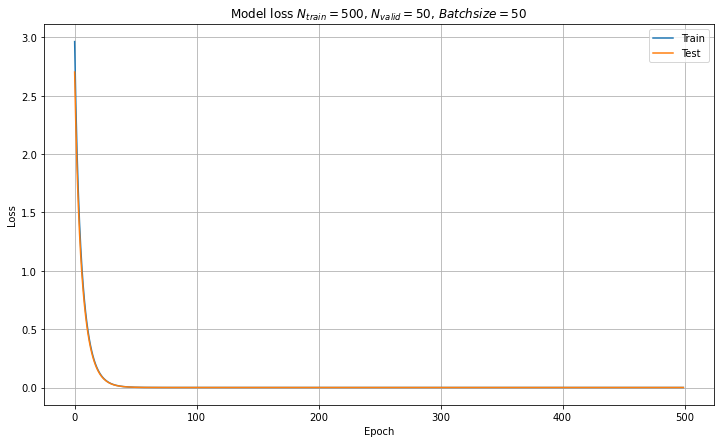

[array([[1.9999938]], dtype=float32), array([0.99999994], dtype=float32)]

In [3]:
x_train2 = np.random.uniform(-1, 1, 500) #training set
x_valid2 = np.random.uniform(-1, 1, 50) # validation set
x_valid2.sort()
y_target2 = m * x_valid2 + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment absent
y_train2 = np.random.normal(m * x_train2 + b, sigma) # actual measures from which we want to guess regression parameters
y_valid2 = np.random.normal(m * x_valid2 + b, sigma)
# plot validation and target dataset
fig, ax= plt.subplots(figsize=(8,5))
ax.plot(x_valid2, y_target2, label='target')
ax.scatter(x_valid2, y_valid2, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()
model_2 = tf.keras.Sequential()
model_2.add(Dense(1, input_shape=(1,)))
# compile the model & get a summary
model_2.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model_2.summary()
history2 = model_2.fit(x=x_train2, y=y_train2, 
          batch_size=32, epochs=500,
          shuffle=True, #  shuffle input before at each epoch
          validation_data=(x_valid2, y_valid2))



# evaluate model
score = model_2.evaluate(x_valid2, y_valid2, batch_size=32, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# look into training history
# Plot training & validation loss values
figure= plt.subplots(figsize=(8,5))
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss $N_{train}=500$, $N_{valid}=50$, $ Batchsize = 50$ ')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()
model_2.get_weights()
 

# Third try:  $N_{train}=750$, $N_{valid}=75$, $ Batchsize = 50$

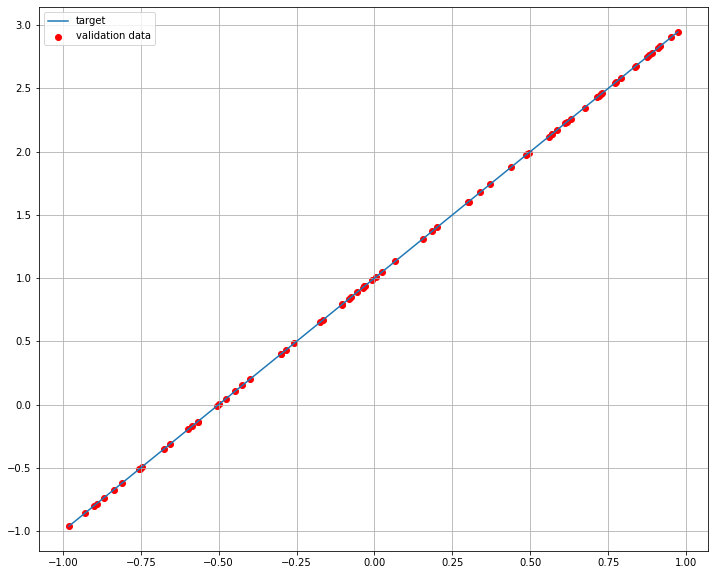

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
12/12 [==============================] - 0s 12ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11
Epoch 2/500
12/12 [==============================] - 0s 6ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11
Epoch 3/500
12/12 [==============================] - 0s 5ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11
Epoch 4/500
12/12 [==============================] - 0s 4ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11

Epoch 53/500
12/12 [==============================] - 0s 5ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11
Epoch 54/500
12/12 [==============================] - 0s 6ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11
Epoch 55/500
12/12 [==============================] - 0s 5ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11
Epoch 56/500
12/12 [==============================] - 0s 6ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11
Epoch 57/500
12/12 [==============================] - 0s 6ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11
Epoch 58/500
12/12 [==============================] - 0s 6ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11
Epoch 59/500
12/12 [==============================] - 0s 6ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_los

12/12 [==============================] - 0s 6ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11
Epoch 164/500
12/12 [==============================] - 0s 6ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11
Epoch 165/500
12/12 [==============================] - 0s 6ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11
Epoch 166/500
12/12 [==============================] - 0s 6ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11
Epoch 167/500
12/12 [==============================] - 0s 6ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11
Epoch 168/500
12/12 [==============================] - 0s 6ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11
Epoch 169/500
12/12 [==============================] - 0s 6ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.25

12/12 [==============================] - 0s 7ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11
Epoch 219/500
12/12 [==============================] - 0s 6ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11
Epoch 220/500
12/12 [==============================] - 0s 6ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11
Epoch 221/500
12/12 [==============================] - 0s 6ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11
Epoch 222/500
12/12 [==============================] - 0s 6ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11
Epoch 223/500
12/12 [==============================] - 0s 6ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11
Epoch 224/500
12/12 [==============================] - 0s 6ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.25

12/12 [==============================] - 0s 5ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11
Epoch 274/500
12/12 [==============================] - 0s 6ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11
Epoch 275/500
12/12 [==============================] - 0s 6ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11
Epoch 276/500
12/12 [==============================] - 0s 6ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11
Epoch 277/500
12/12 [==============================] - 0s 6ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11
Epoch 278/500
12/12 [==============================] - 0s 5ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11
Epoch 279/500
12/12 [==============================] - 0s 6ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.25

12/12 [==============================] - 0s 6ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11
Epoch 329/500
12/12 [==============================] - 0s 6ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11
Epoch 330/500
12/12 [==============================] - 0s 7ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11
Epoch 331/500
12/12 [==============================] - 0s 7ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11
Epoch 332/500
12/12 [==============================] - 0s 8ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11
Epoch 333/500
12/12 [==============================] - 0s 6ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11
Epoch 334/500
12/12 [==============================] - 0s 6ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.25

12/12 [==============================] - 0s 5ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11
Epoch 384/500
12/12 [==============================] - 0s 5ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11
Epoch 385/500
12/12 [==============================] - 0s 6ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11
Epoch 386/500
12/12 [==============================] - 0s 5ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11
Epoch 387/500
12/12 [==============================] - 0s 6ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11
Epoch 388/500
12/12 [==============================] - 0s 6ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11
Epoch 389/500
12/12 [==============================] - 0s 6ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.25

12/12 [==============================] - 0s 5ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11
Epoch 439/500
12/12 [==============================] - 0s 6ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11
Epoch 440/500
12/12 [==============================] - 0s 6ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11
Epoch 441/500
12/12 [==============================] - 0s 6ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11
Epoch 442/500
12/12 [==============================] - 0s 6ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11
Epoch 443/500
12/12 [==============================] - 0s 6ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11
Epoch 444/500
12/12 [==============================] - 0s 5ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.25

12/12 [==============================] - 0s 5ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11
Epoch 494/500
12/12 [==============================] - 0s 6ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11
Epoch 495/500
12/12 [==============================] - 0s 6ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11
Epoch 496/500
12/12 [==============================] - 0s 6ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11
Epoch 497/500
12/12 [==============================] - 0s 6ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11
Epoch 498/500
12/12 [==============================] - 0s 6ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.2528e-11 - val_mse: 1.2528e-11
Epoch 499/500
12/12 [==============================] - 0s 6ms/step - loss: 1.1649e-11 - mse: 1.1649e-11 - val_loss: 1.25

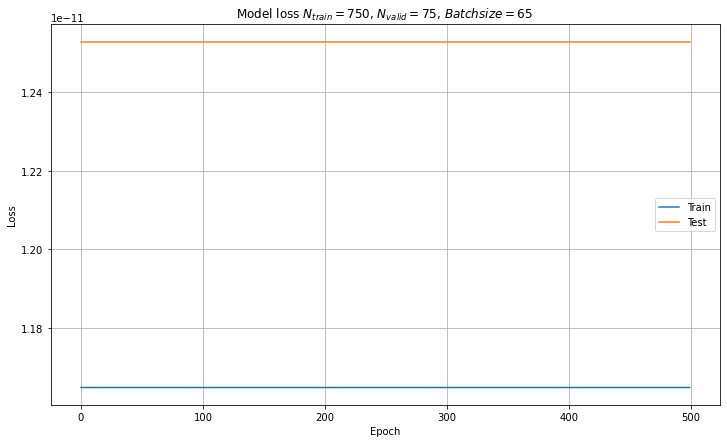

[array([[-0.94944316]], dtype=float32), array([0.], dtype=float32)]

In [6]:
x_train3 = np.random.uniform(-1, 1, 750) #training set
x_valid3 = np.random.uniform(-1, 1, 75) # validation set
x_valid3.sort()
y_target3 = m * x_valid3 + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment absent
y_train3 = np.random.normal(m * x_train3 + b, sigma) # actual measures from which we want to guess regression parameters
y_valid3 = np.random.normal(m * x_valid3 + b, sigma)
# plot validation and target dataset
fig, ax= plt.subplots(figsize=(8,5))
ax.plot(x_valid3, y_target3, label='target')
ax.scatter(x_valid3, y_valid3, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()
model_3 = tf.keras.Sequential()
model_3.add(Dense(1, input_shape=(1,)))
# compile the model & get a summary
model_3.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model_3.summary()
history3 = model_2.fit(x=x_train3, y=y_train3, 
          batch_size=50, epochs=500,
          shuffle=True, #  shuffle input before at each epoch
          validation_data=(x_valid3, y_valid3))

# evaluate model
score = model_3.evaluate(x_valid2, y_valid2, batch_size=50, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# look into training history
# Plot training & validation loss values
figure= plt.subplots(figsize=(8,5))
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss $N_{train}=750$, $N_{valid}=75$, $ Batchsize = 65$ ')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()
model_3.get_weights()
 

# Fourth try:  $N_{train}=1000$, $N_{valid}=100$, $ Batchsize = 75$

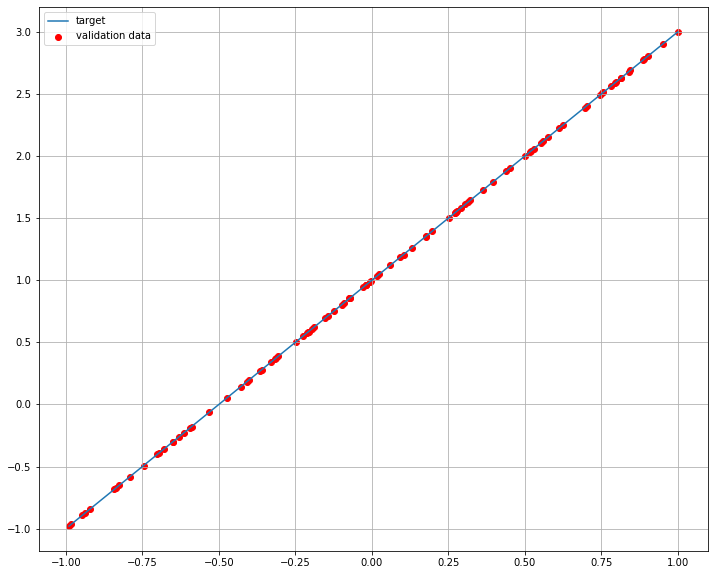

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
10/10 [==============================] - 1s 26ms/step - loss: 1.2521 - mse: 1.2521 - val_loss: 1.0531 - val_mse: 1.0531
Epoch 2/500
10/10 [==============================] - 0s 5ms/step - loss: 0.9208 - mse: 0.9208 - val_loss: 0.7758 - val_mse: 0.7758
Epoch 3/500
10/10 [==============================] - 0s 5ms/step - loss: 0.6887 - mse: 0.6887 - val_loss: 0.5806 - val_mse: 0.5806
Epoch 4/500
10/10 [==============================] - 0s 6ms/step - loss: 0.5240 - mse: 0.5240 - val_loss: 0.4417 - val_mse: 0.4417
Epoch 5/500
10/10 [==============================] - 0s 4ms/ste

10/10 [==============================] - 0s 6ms/step - loss: 7.6321e-08 - mse: 7.6321e-08 - val_loss: 6.0279e-08 - val_mse: 6.0279e-08
Epoch 113/500
10/10 [==============================] - 0s 7ms/step - loss: 6.6339e-08 - mse: 6.6339e-08 - val_loss: 5.2436e-08 - val_mse: 5.2436e-08
Epoch 114/500
10/10 [==============================] - 0s 7ms/step - loss: 5.7719e-08 - mse: 5.7719e-08 - val_loss: 4.5619e-08 - val_mse: 4.5619e-08
Epoch 115/500
10/10 [==============================] - 0s 6ms/step - loss: 5.0195e-08 - mse: 5.0195e-08 - val_loss: 3.9626e-08 - val_mse: 3.9626e-08
Epoch 116/500
10/10 [==============================] - 0s 6ms/step - loss: 4.3638e-08 - mse: 4.3638e-08 - val_loss: 3.4455e-08 - val_mse: 3.4455e-08
Epoch 117/500
10/10 [==============================] - 0s 5ms/step - loss: 3.7933e-08 - mse: 3.7933e-08 - val_loss: 2.9954e-08 - val_mse: 2.9954e-08
Epoch 118/500
10/10 [==============================] - 0s 6ms/step - loss: 3.2988e-08 - mse: 3.2988e-08 - val_loss: 2.60

10/10 [==============================] - 0s 6ms/step - loss: 2.8131e-11 - mse: 2.8131e-11 - val_loss: 2.1881e-11 - val_mse: 2.1881e-11
Epoch 168/500
10/10 [==============================] - 0s 7ms/step - loss: 2.3406e-11 - mse: 2.3406e-11 - val_loss: 1.8427e-11 - val_mse: 1.8427e-11
Epoch 169/500
10/10 [==============================] - 0s 7ms/step - loss: 2.1354e-11 - mse: 2.1354e-11 - val_loss: 1.7827e-11 - val_mse: 1.7827e-11
Epoch 170/500
10/10 [==============================] - 0s 7ms/step - loss: 2.0059e-11 - mse: 2.0059e-11 - val_loss: 1.6722e-11 - val_mse: 1.6722e-11
Epoch 171/500
10/10 [==============================] - 0s 6ms/step - loss: 1.9634e-11 - mse: 1.9634e-11 - val_loss: 1.6722e-11 - val_mse: 1.6722e-11
Epoch 172/500
10/10 [==============================] - 0s 6ms/step - loss: 1.9634e-11 - mse: 1.9634e-11 - val_loss: 1.6722e-11 - val_mse: 1.6722e-11
Epoch 173/500
10/10 [==============================] - 0s 6ms/step - loss: 1.9415e-11 - mse: 1.9415e-11 - val_loss: 1.62

10/10 [==============================] - 0s 6ms/step - loss: 1.6095e-11 - mse: 1.6095e-11 - val_loss: 1.3673e-11 - val_mse: 1.3673e-11
Epoch 223/500
10/10 [==============================] - 0s 6ms/step - loss: 1.6095e-11 - mse: 1.6095e-11 - val_loss: 1.3673e-11 - val_mse: 1.3673e-11
Epoch 224/500
10/10 [==============================] - 0s 5ms/step - loss: 1.6095e-11 - mse: 1.6095e-11 - val_loss: 1.3673e-11 - val_mse: 1.3673e-11
Epoch 225/500
10/10 [==============================] - 0s 5ms/step - loss: 1.6095e-11 - mse: 1.6095e-11 - val_loss: 1.3673e-11 - val_mse: 1.3673e-11
Epoch 226/500
10/10 [==============================] - 0s 6ms/step - loss: 1.6095e-11 - mse: 1.6095e-11 - val_loss: 1.3673e-11 - val_mse: 1.3673e-11
Epoch 227/500
10/10 [==============================] - 0s 6ms/step - loss: 1.6095e-11 - mse: 1.6095e-11 - val_loss: 1.3673e-11 - val_mse: 1.3673e-11
Epoch 228/500
10/10 [==============================] - 0s 6ms/step - loss: 1.6095e-11 - mse: 1.6095e-11 - val_loss: 1.36

10/10 [==============================] - 0s 7ms/step - loss: 1.5525e-11 - mse: 1.5525e-11 - val_loss: 1.3136e-11 - val_mse: 1.3136e-11
Epoch 278/500
10/10 [==============================] - 0s 6ms/step - loss: 1.5525e-11 - mse: 1.5525e-11 - val_loss: 1.3136e-11 - val_mse: 1.3136e-11
Epoch 279/500
10/10 [==============================] - 0s 6ms/step - loss: 1.5525e-11 - mse: 1.5525e-11 - val_loss: 1.3136e-11 - val_mse: 1.3136e-11
Epoch 280/500
10/10 [==============================] - 0s 6ms/step - loss: 1.5525e-11 - mse: 1.5525e-11 - val_loss: 1.3136e-11 - val_mse: 1.3136e-11
Epoch 281/500
10/10 [==============================] - 0s 7ms/step - loss: 1.5525e-11 - mse: 1.5525e-11 - val_loss: 1.3136e-11 - val_mse: 1.3136e-11
Epoch 282/500
10/10 [==============================] - 0s 6ms/step - loss: 1.5525e-11 - mse: 1.5525e-11 - val_loss: 1.3136e-11 - val_mse: 1.3136e-11
Epoch 283/500
10/10 [==============================] - 0s 6ms/step - loss: 1.5525e-11 - mse: 1.5525e-11 - val_loss: 1.31

10/10 [==============================] - 0s 6ms/step - loss: 1.5525e-11 - mse: 1.5525e-11 - val_loss: 1.3136e-11 - val_mse: 1.3136e-11
Epoch 333/500
10/10 [==============================] - 0s 6ms/step - loss: 1.5525e-11 - mse: 1.5525e-11 - val_loss: 1.3136e-11 - val_mse: 1.3136e-11
Epoch 334/500
10/10 [==============================] - 0s 6ms/step - loss: 1.5525e-11 - mse: 1.5525e-11 - val_loss: 1.3136e-11 - val_mse: 1.3136e-11
Epoch 335/500
10/10 [==============================] - 0s 6ms/step - loss: 1.5525e-11 - mse: 1.5525e-11 - val_loss: 1.3136e-11 - val_mse: 1.3136e-11
Epoch 336/500
10/10 [==============================] - 0s 6ms/step - loss: 1.5525e-11 - mse: 1.5525e-11 - val_loss: 1.3136e-11 - val_mse: 1.3136e-11
Epoch 337/500
10/10 [==============================] - 0s 5ms/step - loss: 1.5525e-11 - mse: 1.5525e-11 - val_loss: 1.3136e-11 - val_mse: 1.3136e-11
Epoch 338/500
10/10 [==============================] - 0s 5ms/step - loss: 1.5525e-11 - mse: 1.5525e-11 - val_loss: 1.31

10/10 [==============================] - 0s 5ms/step - loss: 1.5525e-11 - mse: 1.5525e-11 - val_loss: 1.3136e-11 - val_mse: 1.3136e-11
Epoch 388/500
10/10 [==============================] - 0s 6ms/step - loss: 1.5525e-11 - mse: 1.5525e-11 - val_loss: 1.3136e-11 - val_mse: 1.3136e-11
Epoch 389/500
10/10 [==============================] - 0s 6ms/step - loss: 1.5525e-11 - mse: 1.5525e-11 - val_loss: 1.3136e-11 - val_mse: 1.3136e-11
Epoch 390/500
10/10 [==============================] - 0s 6ms/step - loss: 1.5525e-11 - mse: 1.5525e-11 - val_loss: 1.3136e-11 - val_mse: 1.3136e-11
Epoch 391/500
10/10 [==============================] - 0s 5ms/step - loss: 1.5525e-11 - mse: 1.5525e-11 - val_loss: 1.3136e-11 - val_mse: 1.3136e-11
Epoch 392/500
10/10 [==============================] - 0s 4ms/step - loss: 1.5525e-11 - mse: 1.5525e-11 - val_loss: 1.3136e-11 - val_mse: 1.3136e-11
Epoch 393/500
10/10 [==============================] - 0s 6ms/step - loss: 1.5525e-11 - mse: 1.5525e-11 - val_loss: 1.31

10/10 [==============================] - 0s 5ms/step - loss: 1.5079e-11 - mse: 1.5079e-11 - val_loss: 1.2753e-11 - val_mse: 1.2753e-11
Epoch 443/500
10/10 [==============================] - 0s 6ms/step - loss: 1.4952e-11 - mse: 1.4952e-11 - val_loss: 1.2753e-11 - val_mse: 1.2753e-11
Epoch 444/500
10/10 [==============================] - 0s 6ms/step - loss: 1.4952e-11 - mse: 1.4952e-11 - val_loss: 1.2753e-11 - val_mse: 1.2753e-11
Epoch 445/500
10/10 [==============================] - 0s 6ms/step - loss: 1.4952e-11 - mse: 1.4952e-11 - val_loss: 1.2753e-11 - val_mse: 1.2753e-11
Epoch 446/500
10/10 [==============================] - 0s 6ms/step - loss: 1.4952e-11 - mse: 1.4952e-11 - val_loss: 1.2753e-11 - val_mse: 1.2753e-11
Epoch 447/500
10/10 [==============================] - 0s 6ms/step - loss: 1.4952e-11 - mse: 1.4952e-11 - val_loss: 1.2753e-11 - val_mse: 1.2753e-11
Epoch 448/500
10/10 [==============================] - 0s 6ms/step - loss: 1.4952e-11 - mse: 1.4952e-11 - val_loss: 1.27

10/10 [==============================] - 0s 4ms/step - loss: 1.4952e-11 - mse: 1.4952e-11 - val_loss: 1.2753e-11 - val_mse: 1.2753e-11
Epoch 498/500
10/10 [==============================] - 0s 4ms/step - loss: 1.4952e-11 - mse: 1.4952e-11 - val_loss: 1.2753e-11 - val_mse: 1.2753e-11
Epoch 499/500
10/10 [==============================] - 0s 6ms/step - loss: 1.4952e-11 - mse: 1.4952e-11 - val_loss: 1.2753e-11 - val_mse: 1.2753e-11
Epoch 500/500
1/1 [==============================] - 0s 17ms/step - loss: 1.2753e-11 - mse: 1.2753e-11

Test loss: 1.2753489236905224e-11
Test accuracy: 1.2753489236905224e-11


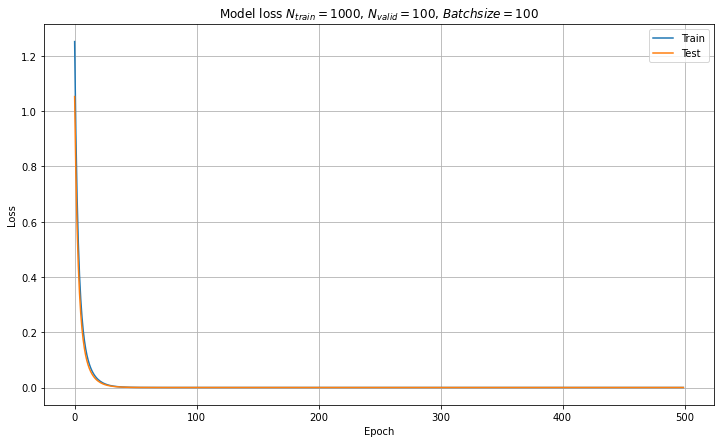

[array([[1.9999934]], dtype=float32), array([1.], dtype=float32)]

In [7]:
x_train4 = np.random.uniform(-1, 1, 1000) #training set
x_valid4 = np.random.uniform(-1, 1, 100) # validation set
x_valid4.sort()
y_target4 = m * x_valid4 + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment absent
y_train4 = np.random.normal(m * x_train4 + b, sigma) # actual measures from which we want to guess regression parameters
y_valid4 = np.random.normal(m * x_valid4 + b, sigma)
# plot validation and target dataset
fig, ax= plt.subplots(figsize=(8,5))
ax.plot(x_valid4, y_target4, label='target')
ax.scatter(x_valid4, y_valid4, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()
model_4 = tf.keras.Sequential()
model_4.add(Dense(1, input_shape=(1,)))
# compile the model & get a summary
model_4.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model_4.summary()
history4 = model_4.fit(x=x_train4, y=y_train4, 
          batch_size=75, epochs=500,
          shuffle=True, #  shuffle input before at each epoch
          validation_data=(x_valid4, y_valid4))



# evaluate model
score = model_4.evaluate(x_valid4, y_valid4, batch_size=75, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# look into training history
# Plot training & validation loss values
figure= plt.subplots(figsize=(8,5))
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model loss $N_{train}=1000$, $N_{valid}=100$, $ Batchsize = 100$ ')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()
model_4.get_weights()
 

# Fifth try: $N_{train}=10000$, $N_{valid}=1000$, $ Batchsize = 500$

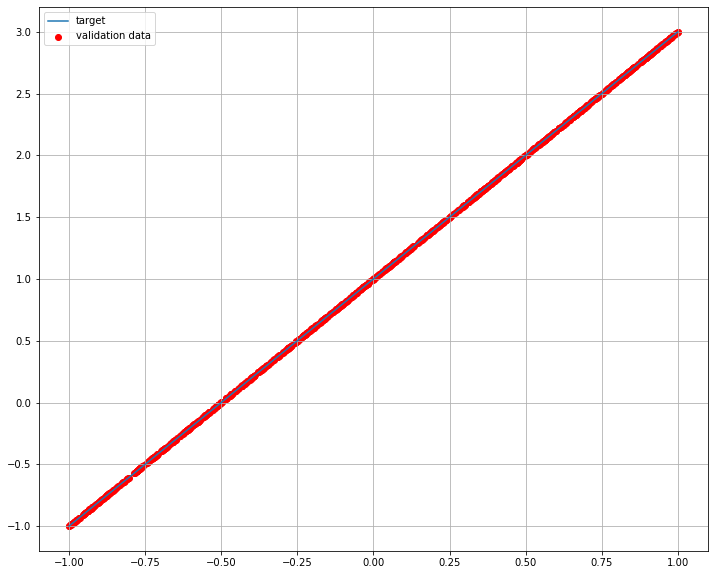

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
20/20 [==============================] - 1s 15ms/step - loss: 1.3344 - mse: 1.3344 - val_loss: 1.0275 - val_mse: 1.0275
Epoch 2/500
20/20 [==============================] - 0s 3ms/step - loss: 0.8033 - mse: 0.8033 - val_loss: 0.6402 - val_mse: 0.6402
Epoch 3/500
20/20 [==============================] - 0s 4ms/step - loss: 0.5169 - mse: 0.5169 - val_loss: 0.4231 - val_mse: 0.4231
Epoch 4/500
20/20 [==============================] - 0s 4ms/step - loss: 0.3513 - mse: 0.3513 - val_loss: 0.2929 - val_mse: 0.2929
Epoch 5/500
20/20 [==============================] - 0s 4ms/ste

20/20 [==============================] - 0s 3ms/step - loss: 2.1157e-11 - mse: 2.1157e-11 - val_loss: 2.0881e-11 - val_mse: 2.0881e-11
Epoch 111/500
20/20 [==============================] - 0s 4ms/step - loss: 2.1157e-11 - mse: 2.1157e-11 - val_loss: 2.0881e-11 - val_mse: 2.0881e-11
Epoch 112/500
20/20 [==============================] - 0s 4ms/step - loss: 2.1157e-11 - mse: 2.1157e-11 - val_loss: 2.0881e-11 - val_mse: 2.0881e-11
Epoch 113/500
20/20 [==============================] - 0s 4ms/step - loss: 2.1157e-11 - mse: 2.1157e-11 - val_loss: 2.0881e-11 - val_mse: 2.0881e-11
Epoch 114/500
20/20 [==============================] - 0s 4ms/step - loss: 2.1157e-11 - mse: 2.1157e-11 - val_loss: 2.0881e-11 - val_mse: 2.0881e-11
Epoch 115/500
20/20 [==============================] - 0s 4ms/step - loss: 2.1157e-11 - mse: 2.1157e-11 - val_loss: 2.0881e-11 - val_mse: 2.0881e-11
Epoch 116/500
20/20 [==============================] - 0s 4ms/step - loss: 2.1157e-11 - mse: 2.1157e-11 - val_loss: 2.08

20/20 [==============================] - 0s 4ms/step - loss: 1.9902e-11 - mse: 1.9902e-11 - val_loss: 1.9685e-11 - val_mse: 1.9685e-11
Epoch 166/500
20/20 [==============================] - 0s 4ms/step - loss: 1.9902e-11 - mse: 1.9902e-11 - val_loss: 1.9685e-11 - val_mse: 1.9685e-11
Epoch 167/500
20/20 [==============================] - 0s 4ms/step - loss: 1.9902e-11 - mse: 1.9902e-11 - val_loss: 1.9685e-11 - val_mse: 1.9685e-11
Epoch 168/500
20/20 [==============================] - 0s 5ms/step - loss: 1.9902e-11 - mse: 1.9902e-11 - val_loss: 1.9685e-11 - val_mse: 1.9685e-11
Epoch 169/500
20/20 [==============================] - 0s 4ms/step - loss: 1.9902e-11 - mse: 1.9902e-11 - val_loss: 1.9685e-11 - val_mse: 1.9685e-11
Epoch 170/500
20/20 [==============================] - 0s 4ms/step - loss: 1.9902e-11 - mse: 1.9902e-11 - val_loss: 1.9685e-11 - val_mse: 1.9685e-11
Epoch 171/500
20/20 [==============================] - 0s 4ms/step - loss: 1.9902e-11 - mse: 1.9902e-11 - val_loss: 1.96

20/20 [==============================] - 0s 4ms/step - loss: 1.9902e-11 - mse: 1.9902e-11 - val_loss: 1.9685e-11 - val_mse: 1.9685e-11
Epoch 221/500
20/20 [==============================] - 0s 4ms/step - loss: 1.9902e-11 - mse: 1.9902e-11 - val_loss: 1.9685e-11 - val_mse: 1.9685e-11
Epoch 222/500
20/20 [==============================] - 0s 4ms/step - loss: 1.9902e-11 - mse: 1.9902e-11 - val_loss: 1.9685e-11 - val_mse: 1.9685e-11
Epoch 223/500
20/20 [==============================] - 0s 4ms/step - loss: 1.9902e-11 - mse: 1.9902e-11 - val_loss: 1.9685e-11 - val_mse: 1.9685e-11
Epoch 224/500
20/20 [==============================] - 0s 4ms/step - loss: 1.9902e-11 - mse: 1.9902e-11 - val_loss: 1.9685e-11 - val_mse: 1.9685e-11
Epoch 225/500
20/20 [==============================] - 0s 4ms/step - loss: 1.9902e-11 - mse: 1.9902e-11 - val_loss: 1.9685e-11 - val_mse: 1.9685e-11
Epoch 226/500
20/20 [==============================] - 0s 4ms/step - loss: 1.9902e-11 - mse: 1.9902e-11 - val_loss: 1.96

20/20 [==============================] - 0s 4ms/step - loss: 1.9902e-11 - mse: 1.9902e-11 - val_loss: 1.9685e-11 - val_mse: 1.9685e-11
Epoch 276/500
20/20 [==============================] - 0s 4ms/step - loss: 1.9902e-11 - mse: 1.9902e-11 - val_loss: 1.9685e-11 - val_mse: 1.9685e-11
Epoch 277/500
20/20 [==============================] - 0s 4ms/step - loss: 1.9902e-11 - mse: 1.9902e-11 - val_loss: 1.9685e-11 - val_mse: 1.9685e-11
Epoch 278/500
20/20 [==============================] - 0s 4ms/step - loss: 1.9902e-11 - mse: 1.9902e-11 - val_loss: 1.9685e-11 - val_mse: 1.9685e-11
Epoch 279/500
20/20 [==============================] - 0s 4ms/step - loss: 1.9902e-11 - mse: 1.9902e-11 - val_loss: 1.9685e-11 - val_mse: 1.9685e-11
Epoch 280/500
20/20 [==============================] - 0s 4ms/step - loss: 1.9902e-11 - mse: 1.9902e-11 - val_loss: 1.9685e-11 - val_mse: 1.9685e-11
Epoch 281/500
20/20 [==============================] - 0s 4ms/step - loss: 1.9902e-11 - mse: 1.9902e-11 - val_loss: 1.96

20/20 [==============================] - 0s 4ms/step - loss: 1.9902e-11 - mse: 1.9902e-11 - val_loss: 1.9685e-11 - val_mse: 1.9685e-11
Epoch 331/500
20/20 [==============================] - 0s 4ms/step - loss: 1.9902e-11 - mse: 1.9902e-11 - val_loss: 1.9685e-11 - val_mse: 1.9685e-11
Epoch 332/500
20/20 [==============================] - 0s 4ms/step - loss: 1.9902e-11 - mse: 1.9902e-11 - val_loss: 1.9685e-11 - val_mse: 1.9685e-11
Epoch 333/500
20/20 [==============================] - 0s 4ms/step - loss: 1.9902e-11 - mse: 1.9902e-11 - val_loss: 1.9685e-11 - val_mse: 1.9685e-11
Epoch 334/500
20/20 [==============================] - 0s 4ms/step - loss: 1.9902e-11 - mse: 1.9902e-11 - val_loss: 1.9685e-11 - val_mse: 1.9685e-11
Epoch 335/500
20/20 [==============================] - 0s 4ms/step - loss: 1.9902e-11 - mse: 1.9902e-11 - val_loss: 1.9685e-11 - val_mse: 1.9685e-11
Epoch 336/500
20/20 [==============================] - 0s 4ms/step - loss: 1.9902e-11 - mse: 1.9902e-11 - val_loss: 1.96

20/20 [==============================] - 0s 4ms/step - loss: 1.9902e-11 - mse: 1.9902e-11 - val_loss: 1.9685e-11 - val_mse: 1.9685e-11
Epoch 386/500
20/20 [==============================] - 0s 4ms/step - loss: 1.9902e-11 - mse: 1.9902e-11 - val_loss: 1.9685e-11 - val_mse: 1.9685e-11
Epoch 387/500
20/20 [==============================] - 0s 4ms/step - loss: 1.9902e-11 - mse: 1.9902e-11 - val_loss: 1.9685e-11 - val_mse: 1.9685e-11
Epoch 388/500
20/20 [==============================] - 0s 4ms/step - loss: 1.9902e-11 - mse: 1.9902e-11 - val_loss: 1.9685e-11 - val_mse: 1.9685e-11
Epoch 389/500
20/20 [==============================] - 0s 4ms/step - loss: 1.9902e-11 - mse: 1.9902e-11 - val_loss: 1.9685e-11 - val_mse: 1.9685e-11
Epoch 390/500
20/20 [==============================] - 0s 4ms/step - loss: 1.9902e-11 - mse: 1.9902e-11 - val_loss: 1.9685e-11 - val_mse: 1.9685e-11
Epoch 391/500
20/20 [==============================] - 0s 4ms/step - loss: 1.9902e-11 - mse: 1.9902e-11 - val_loss: 1.96

20/20 [==============================] - 0s 4ms/step - loss: 1.9902e-11 - mse: 1.9902e-11 - val_loss: 1.9685e-11 - val_mse: 1.9685e-11
Epoch 441/500
20/20 [==============================] - 0s 4ms/step - loss: 1.9902e-11 - mse: 1.9902e-11 - val_loss: 1.9685e-11 - val_mse: 1.9685e-11
Epoch 442/500
20/20 [==============================] - 0s 4ms/step - loss: 1.9902e-11 - mse: 1.9902e-11 - val_loss: 1.9685e-11 - val_mse: 1.9685e-11
Epoch 443/500
20/20 [==============================] - 0s 4ms/step - loss: 1.9902e-11 - mse: 1.9902e-11 - val_loss: 1.9685e-11 - val_mse: 1.9685e-11
Epoch 444/500
20/20 [==============================] - 0s 4ms/step - loss: 1.9902e-11 - mse: 1.9902e-11 - val_loss: 1.9685e-11 - val_mse: 1.9685e-11
Epoch 445/500
20/20 [==============================] - 0s 4ms/step - loss: 1.9902e-11 - mse: 1.9902e-11 - val_loss: 1.9685e-11 - val_mse: 1.9685e-11
Epoch 446/500
20/20 [==============================] - 0s 4ms/step - loss: 1.9902e-11 - mse: 1.9902e-11 - val_loss: 1.96

20/20 [==============================] - 0s 4ms/step - loss: 1.9902e-11 - mse: 1.9902e-11 - val_loss: 1.9685e-11 - val_mse: 1.9685e-11
Epoch 496/500
20/20 [==============================] - 0s 4ms/step - loss: 1.9902e-11 - mse: 1.9902e-11 - val_loss: 1.9685e-11 - val_mse: 1.9685e-11
Epoch 497/500
20/20 [==============================] - 0s 4ms/step - loss: 1.9902e-11 - mse: 1.9902e-11 - val_loss: 1.9685e-11 - val_mse: 1.9685e-11
Epoch 498/500
20/20 [==============================] - 0s 4ms/step - loss: 1.9902e-11 - mse: 1.9902e-11 - val_loss: 1.9685e-11 - val_mse: 1.9685e-11
Epoch 499/500
20/20 [==============================] - 0s 4ms/step - loss: 1.9902e-11 - mse: 1.9902e-11 - val_loss: 1.9685e-11 - val_mse: 1.9685e-11
Epoch 500/500
2/2 [==============================] - 0s 0s/step - loss: 1.9685e-11 - mse: 1.9685e-11

Test loss: 1.968531240792437e-11
Test accuracy: 1.968531240792437e-11


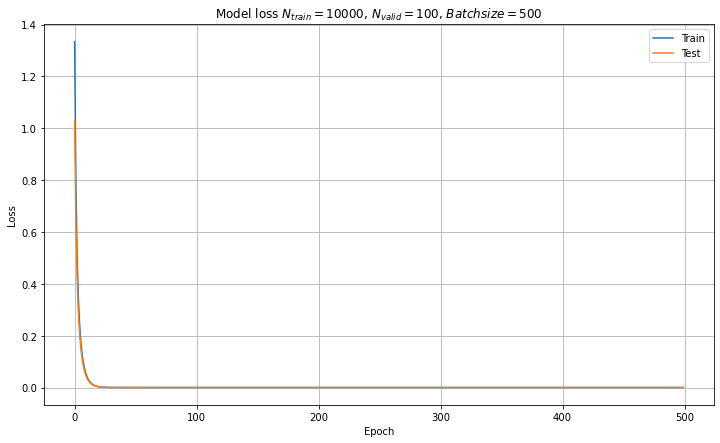

[array([[1.9999924]], dtype=float32), array([0.9999996], dtype=float32)]

In [8]:
x_train5 = np.random.uniform(-1, 1, 10000) #training set
x_valid5 = np.random.uniform(-1, 1, 1000) # validation set
x_valid5.sort()
y_target5 = m * x_valid5 + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment absent
y_train5 = np.random.normal(m * x_train5 + b, sigma) # actual measures from which we want to guess regression parameters
y_valid5 = np.random.normal(m * x_valid5 + b, sigma)
# plot validation and target dataset
fig, ax= plt.subplots(figsize=(8,5))
ax.plot(x_valid5, y_target5, label='target')
ax.scatter(x_valid5, y_valid5, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()
model_5 = tf.keras.Sequential()
model_5.add(Dense(1, input_shape=(1,)))
# compile the model & get a summary
model_5.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model_5.summary()
history5 = model_5.fit(x=x_train5, y=y_train5, 
          batch_size=500, epochs=500,
          shuffle=True, #  shuffle input before at each epoch
          validation_data=(x_valid5, y_valid5))



# evaluate model
score = model_5.evaluate(x_valid5, y_valid5, batch_size=500, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# look into training history
# Plot training & validation loss values
figure= plt.subplots(figsize=(8,5))
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('Model loss $N_{train}=10000$, $N_{valid}=100$, $ Batchsize = 500$ ')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()
model_5.get_weights()
 

# $\sigma$ variation
Once the right set of hyperparameters has been found, let us proceed with a variation of the uncertainty $\sigma$, namely the errors $\eta_{i}$. Let's set the dimension of the training set to 500, the dimension of the validation set to 50 and the batchsize to 32.
- $1^{st}$ try: $\sigma= 0.001$
- $2^{nd}$ try: $\sigma= 0.05$
- $3^{rd}$ try: $\sigma= 0.1$
- $4^{th}$ try: $\sigma= 1.0$

# $1^{st}$ try: $\sigma= 0.001$

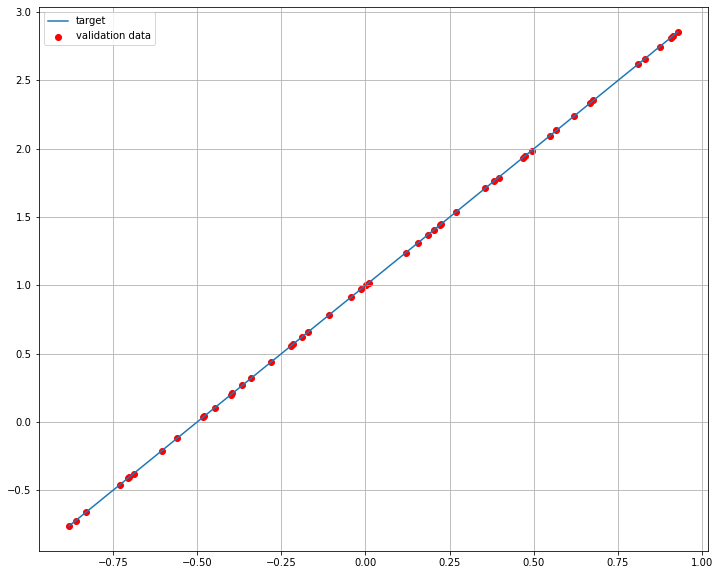

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
16/16 [==============================] - 1s 15ms/step - loss: 2.2188 - mse: 2.2188 - val_loss: 1.6923 - val_mse: 1.6923
Epoch 2/500
16/16 [==============================] - 0s 3ms/step - loss: 1.5604 - mse: 1.5604 - val_loss: 1.1968 - val_mse: 1.1968
Epoch 3/500
16/16 [==============================] - 0s 3ms/step - loss: 1.1387 - mse: 1.1387 - val_loss: 0.8782 - val_mse: 0.8782
Epoch 4/500
16/16 [==============================] - 0s 3ms/step - loss: 0.8571 - mse: 0.8571 - val_loss: 0.6609 - val_mse: 0.6609
Epoch 5/500
16/16 [==============================] - 0s 3ms/ste

16/16 [==============================] - 0s 3ms/step - loss: 8.6514e-07 - mse: 8.6514e-07 - val_loss: 9.8228e-07 - val_mse: 9.8228e-07
Epoch 112/500
16/16 [==============================] - 0s 3ms/step - loss: 8.6513e-07 - mse: 8.6513e-07 - val_loss: 9.8227e-07 - val_mse: 9.8227e-07
Epoch 113/500
16/16 [==============================] - 0s 3ms/step - loss: 8.6508e-07 - mse: 8.6508e-07 - val_loss: 9.8223e-07 - val_mse: 9.8223e-07
Epoch 114/500
16/16 [==============================] - 0s 3ms/step - loss: 8.6502e-07 - mse: 8.6502e-07 - val_loss: 9.8210e-07 - val_mse: 9.8210e-07
Epoch 115/500
16/16 [==============================] - 0s 3ms/step - loss: 8.6525e-07 - mse: 8.6525e-07 - val_loss: 9.8246e-07 - val_mse: 9.8246e-07
Epoch 116/500
16/16 [==============================] - 0s 3ms/step - loss: 8.6544e-07 - mse: 8.6544e-07 - val_loss: 9.8259e-07 - val_mse: 9.8259e-07
Epoch 117/500
16/16 [==============================] - 0s 3ms/step - loss: 8.6548e-07 - mse: 8.6548e-07 - val_loss: 9.82

16/16 [==============================] - 0s 3ms/step - loss: 8.6508e-07 - mse: 8.6508e-07 - val_loss: 9.8274e-07 - val_mse: 9.8274e-07
Epoch 167/500
16/16 [==============================] - 0s 3ms/step - loss: 8.6522e-07 - mse: 8.6522e-07 - val_loss: 9.8265e-07 - val_mse: 9.8265e-07
Epoch 168/500
16/16 [==============================] - 0s 3ms/step - loss: 8.6553e-07 - mse: 8.6553e-07 - val_loss: 9.8236e-07 - val_mse: 9.8236e-07
Epoch 169/500
16/16 [==============================] - 0s 3ms/step - loss: 8.6503e-07 - mse: 8.6503e-07 - val_loss: 9.8236e-07 - val_mse: 9.8236e-07
Epoch 170/500
16/16 [==============================] - 0s 3ms/step - loss: 8.6545e-07 - mse: 8.6545e-07 - val_loss: 9.8245e-07 - val_mse: 9.8245e-07
Epoch 171/500
16/16 [==============================] - 0s 3ms/step - loss: 8.6521e-07 - mse: 8.6521e-07 - val_loss: 9.8242e-07 - val_mse: 9.8242e-07
Epoch 172/500
16/16 [==============================] - 0s 3ms/step - loss: 8.6521e-07 - mse: 8.6521e-07 - val_loss: 9.82

16/16 [==============================] - 0s 3ms/step - loss: 8.6524e-07 - mse: 8.6524e-07 - val_loss: 9.8228e-07 - val_mse: 9.8228e-07
Epoch 222/500
16/16 [==============================] - 0s 3ms/step - loss: 8.6512e-07 - mse: 8.6512e-07 - val_loss: 9.8247e-07 - val_mse: 9.8247e-07
Epoch 223/500
16/16 [==============================] - 0s 3ms/step - loss: 8.6533e-07 - mse: 8.6533e-07 - val_loss: 9.8231e-07 - val_mse: 9.8231e-07
Epoch 224/500
16/16 [==============================] - 0s 3ms/step - loss: 8.6520e-07 - mse: 8.6520e-07 - val_loss: 9.8278e-07 - val_mse: 9.8278e-07
Epoch 225/500
16/16 [==============================] - 0s 3ms/step - loss: 8.6522e-07 - mse: 8.6522e-07 - val_loss: 9.8264e-07 - val_mse: 9.8264e-07
Epoch 226/500
16/16 [==============================] - 0s 3ms/step - loss: 8.6534e-07 - mse: 8.6534e-07 - val_loss: 9.8215e-07 - val_mse: 9.8215e-07
Epoch 227/500
16/16 [==============================] - 0s 3ms/step - loss: 8.6524e-07 - mse: 8.6524e-07 - val_loss: 9.82

16/16 [==============================] - 0s 3ms/step - loss: 8.6516e-07 - mse: 8.6516e-07 - val_loss: 9.8223e-07 - val_mse: 9.8223e-07
Epoch 277/500
16/16 [==============================] - 0s 3ms/step - loss: 8.6526e-07 - mse: 8.6526e-07 - val_loss: 9.8263e-07 - val_mse: 9.8263e-07
Epoch 278/500
16/16 [==============================] - 0s 4ms/step - loss: 8.6526e-07 - mse: 8.6526e-07 - val_loss: 9.8266e-07 - val_mse: 9.8266e-07
Epoch 279/500
16/16 [==============================] - 0s 3ms/step - loss: 8.6506e-07 - mse: 8.6506e-07 - val_loss: 9.8252e-07 - val_mse: 9.8252e-07
Epoch 280/500
16/16 [==============================] - 0s 3ms/step - loss: 8.6553e-07 - mse: 8.6553e-07 - val_loss: 9.8248e-07 - val_mse: 9.8248e-07
Epoch 281/500
16/16 [==============================] - 0s 3ms/step - loss: 8.6488e-07 - mse: 8.6488e-07 - val_loss: 9.8243e-07 - val_mse: 9.8243e-07
Epoch 282/500
16/16 [==============================] - 0s 3ms/step - loss: 8.6513e-07 - mse: 8.6513e-07 - val_loss: 9.82

16/16 [==============================] - 0s 2ms/step - loss: 8.6545e-07 - mse: 8.6545e-07 - val_loss: 9.8228e-07 - val_mse: 9.8228e-07
Epoch 332/500
16/16 [==============================] - 0s 3ms/step - loss: 8.6540e-07 - mse: 8.6540e-07 - val_loss: 9.8192e-07 - val_mse: 9.8192e-07
Epoch 333/500
16/16 [==============================] - 0s 3ms/step - loss: 8.6518e-07 - mse: 8.6518e-07 - val_loss: 9.8206e-07 - val_mse: 9.8206e-07
Epoch 334/500
16/16 [==============================] - 0s 3ms/step - loss: 8.6514e-07 - mse: 8.6514e-07 - val_loss: 9.8253e-07 - val_mse: 9.8253e-07
Epoch 335/500
16/16 [==============================] - 0s 3ms/step - loss: 8.6508e-07 - mse: 8.6508e-07 - val_loss: 9.8231e-07 - val_mse: 9.8231e-07
Epoch 336/500
16/16 [==============================] - 0s 3ms/step - loss: 8.6562e-07 - mse: 8.6562e-07 - val_loss: 9.8254e-07 - val_mse: 9.8254e-07
Epoch 337/500
16/16 [==============================] - 0s 3ms/step - loss: 8.6489e-07 - mse: 8.6489e-07 - val_loss: 9.82

16/16 [==============================] - 0s 3ms/step - loss: 8.6540e-07 - mse: 8.6540e-07 - val_loss: 9.8261e-07 - val_mse: 9.8261e-07
Epoch 387/500
16/16 [==============================] - 0s 3ms/step - loss: 8.6540e-07 - mse: 8.6540e-07 - val_loss: 9.8259e-07 - val_mse: 9.8259e-07
Epoch 388/500
16/16 [==============================] - 0s 3ms/step - loss: 8.6504e-07 - mse: 8.6504e-07 - val_loss: 9.8243e-07 - val_mse: 9.8243e-07
Epoch 389/500
16/16 [==============================] - 0s 3ms/step - loss: 8.6510e-07 - mse: 8.6510e-07 - val_loss: 9.8216e-07 - val_mse: 9.8216e-07
Epoch 390/500
16/16 [==============================] - 0s 3ms/step - loss: 8.6526e-07 - mse: 8.6526e-07 - val_loss: 9.8215e-07 - val_mse: 9.8215e-07
Epoch 391/500
16/16 [==============================] - 0s 3ms/step - loss: 8.6513e-07 - mse: 8.6513e-07 - val_loss: 9.8208e-07 - val_mse: 9.8208e-07
Epoch 392/500
16/16 [==============================] - 0s 3ms/step - loss: 8.6520e-07 - mse: 8.6520e-07 - val_loss: 9.81

16/16 [==============================] - 0s 3ms/step - loss: 8.6509e-07 - mse: 8.6509e-07 - val_loss: 9.8216e-07 - val_mse: 9.8216e-07
Epoch 442/500
16/16 [==============================] - 0s 3ms/step - loss: 8.6498e-07 - mse: 8.6498e-07 - val_loss: 9.8195e-07 - val_mse: 9.8195e-07
Epoch 443/500
16/16 [==============================] - 0s 3ms/step - loss: 8.6531e-07 - mse: 8.6531e-07 - val_loss: 9.8216e-07 - val_mse: 9.8216e-07
Epoch 444/500
16/16 [==============================] - 0s 3ms/step - loss: 8.6496e-07 - mse: 8.6496e-07 - val_loss: 9.8229e-07 - val_mse: 9.8229e-07
Epoch 445/500
16/16 [==============================] - 0s 3ms/step - loss: 8.6516e-07 - mse: 8.6516e-07 - val_loss: 9.8223e-07 - val_mse: 9.8223e-07
Epoch 446/500
16/16 [==============================] - 0s 3ms/step - loss: 8.6523e-07 - mse: 8.6523e-07 - val_loss: 9.8240e-07 - val_mse: 9.8240e-07
Epoch 447/500
16/16 [==============================] - 0s 3ms/step - loss: 8.6531e-07 - mse: 8.6531e-07 - val_loss: 9.82

16/16 [==============================] - 0s 3ms/step - loss: 8.6513e-07 - mse: 8.6513e-07 - val_loss: 9.8263e-07 - val_mse: 9.8263e-07
Epoch 497/500
16/16 [==============================] - 0s 3ms/step - loss: 8.6551e-07 - mse: 8.6551e-07 - val_loss: 9.8243e-07 - val_mse: 9.8243e-07
Epoch 498/500
16/16 [==============================] - 0s 3ms/step - loss: 8.6552e-07 - mse: 8.6552e-07 - val_loss: 9.8239e-07 - val_mse: 9.8239e-07
Epoch 499/500
16/16 [==============================] - 0s 3ms/step - loss: 8.6513e-07 - mse: 8.6513e-07 - val_loss: 9.8248e-07 - val_mse: 9.8248e-07
Epoch 500/500
2/2 [==============================] - 0s 0s/step - loss: 9.8241e-07 - mse: 9.8241e-07

Test loss: 9.824069593378226e-07
Test accuracy: 9.824069593378226e-07


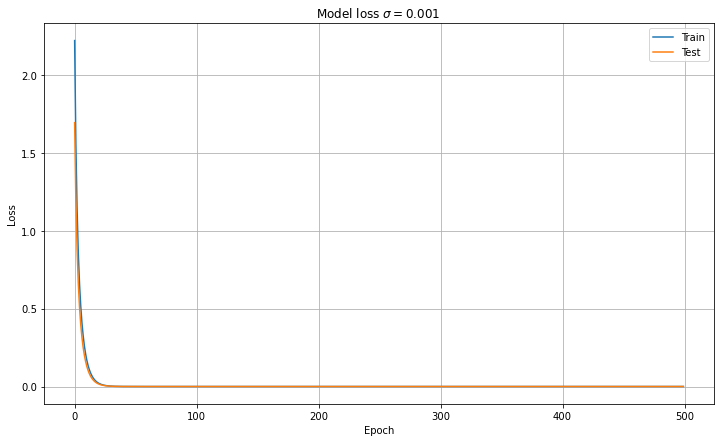

4/4 [==============================] - 0s 2ms/step


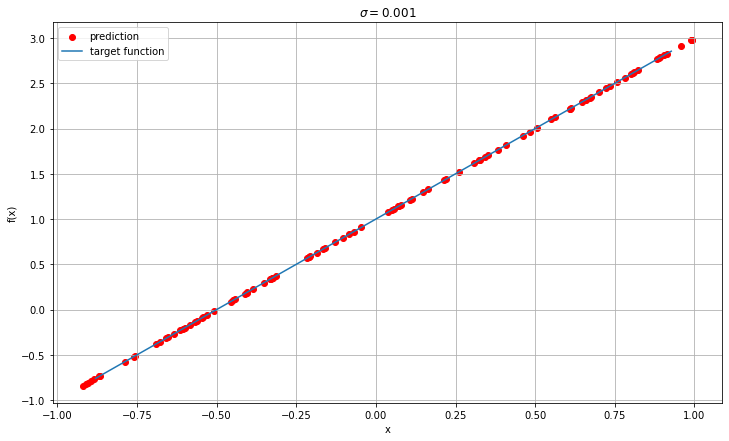

[array([[1.9999064]], dtype=float32), array([0.99996483], dtype=float32)]

In [4]:
x_train = np.random.uniform(-1, 1, 500) #training set
x_valid = np.random.uniform(-1, 1, 50) # validation set
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma1 = 0.001 # noise standard deviation, for the moment absent
y_train = np.random.normal(m * x_train + b, sigma1) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma1)
# plot validation and target dataset
fig, ax= plt.subplots(figsize=(8,5))
ax.plot(x_valid, y_target, label='target')
ax.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()
model_1 = tf.keras.Sequential()
model_1.add(Dense(1, input_shape=(1,)))
# compile the model & get a summary
model_1.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model_1.summary()
history1 = model_1.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=500,
          shuffle=True, #  shuffle input before at each epoch
          validation_data=(x_valid, y_valid))
# evaluate model
score = model_1.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# look into training history
# Plot training & validation loss values
figure= plt.subplots(figsize=(8,5))
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss $\sigma=0.001$ ')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()


x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model_1.predict(x_predicted)
figure1=plt.subplots(figsize=(8,5))
plt.scatter(x_predicted, y_predicted,color='r', label='prediction')
plt.title('$\sigma=0.001$')
plt.plot(x_valid, y_target, label='target function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()
print('predicted value for the slope and the constant parameter:')
model_1.get_weights()

# $2^{nd}$ try: $\sigma= 0.05$

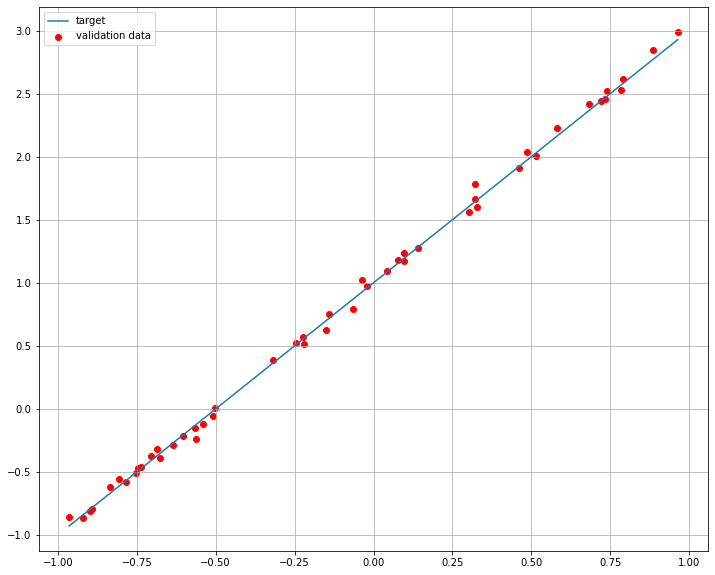

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
16/16 [==============================] - 1s 12ms/step - loss: 0.7962 - mse: 0.7962 - val_loss: 0.5339 - val_mse: 0.5339
Epoch 2/500
16/16 [==============================] - 0s 2ms/step - loss: 0.4353 - mse: 0.4353 - val_loss: 0.2952 - val_mse: 0.2952
Epoch 3/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2439 - mse: 0.2439 - val_loss: 0.1679 - val_mse: 0.1679
Epoch 4/500
16/16 [==============================] - 0s 3ms/step - loss: 0.1405 - mse: 0.1405 - val_loss: 0.1000 - val_mse: 0.1000
Epoch 5/500
16/16 [==============================] - 0s 3ms/ste

16/16 [==============================] - 0s 3ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 60/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 61/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 62/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 63/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 64/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 65/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 66/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0023 - mse: 0

16/16 [==============================] - 0s 3ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 122/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 123/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 124/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 125/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 126/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 127/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 128/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0023 -

Epoch 183/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 184/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 185/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 186/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 187/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 188/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 189/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 190/500
16/16 [==============================] - 0s 3ms/step - 

Epoch 306/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 307/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 308/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 309/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 310/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 311/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 312/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 313/500
16/16 [==============================] - 0s 3ms/step - 

Epoch 429/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 430/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 431/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 432/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 433/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 434/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 435/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 436/500
16/16 [==============================] - 0s 3ms/step - 

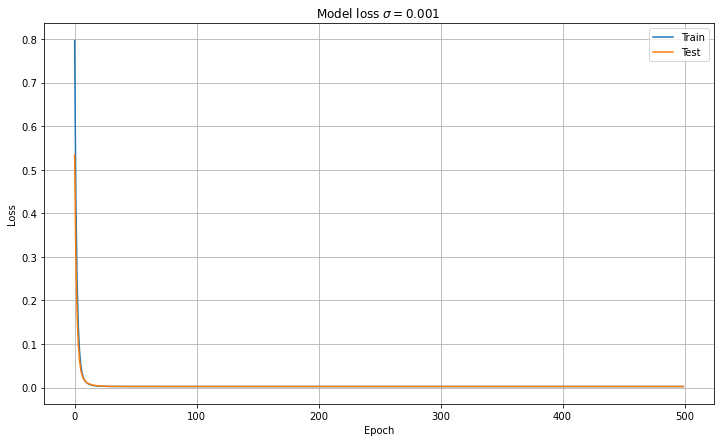

4/4 [==============================] - 0s 4ms/step


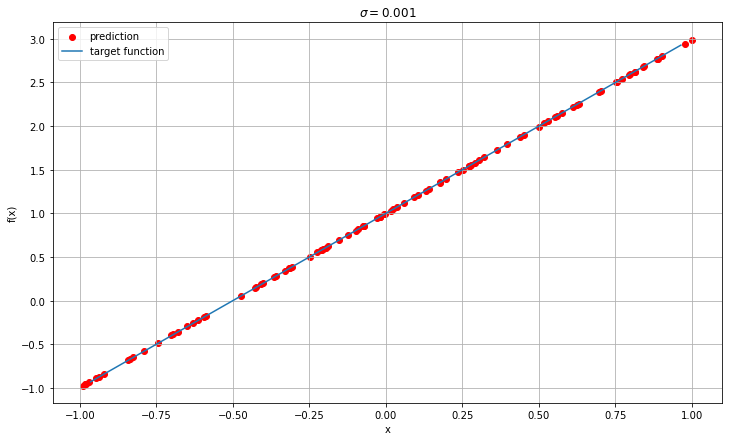

[array([[1.9931561]], dtype=float32), array([0.99968827], dtype=float32)]

In [7]:
x_train = np.random.uniform(-1, 1, 500) #training set
x_valid = np.random.uniform(-1, 1, 50) # validation set
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma2 = 0.05 # noise standard deviation, for the moment absent
y_train = np.random.normal(m * x_train + b, sigma2) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma2)
# plot validation and target dataset
fig, ax= plt.subplots(figsize=(8,5))
ax.plot(x_valid, y_target, label='target')
ax.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()
model_2 = tf.keras.Sequential()
model_2.add(Dense(1, input_shape=(1,)))
# compile the model & get a summary
model_2.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model_2.summary()
history2 = model_2.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=500,
          shuffle=True, #  shuffle input before at each epoch
          validation_data=(x_valid, y_valid))
# evaluate model
score = model_2.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# look into training history
# Plot training & validation loss values
figure= plt.subplots(figsize=(8,5))
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss $\sigma=0.05$ ')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()


x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model_2.predict(x_predicted)
figure1=plt.subplots(figsize=(8,5))
plt.scatter(x_predicted, y_predicted,color='r', label='prediction')
plt.title('$\sigma=0.05$')
plt.plot(x_valid, y_target, label='target function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()
print('predicted value for the slope and the constant parameter:')
model_2.get_weights()

 # $3^{rd}$ try: $\sigma= 0.1$

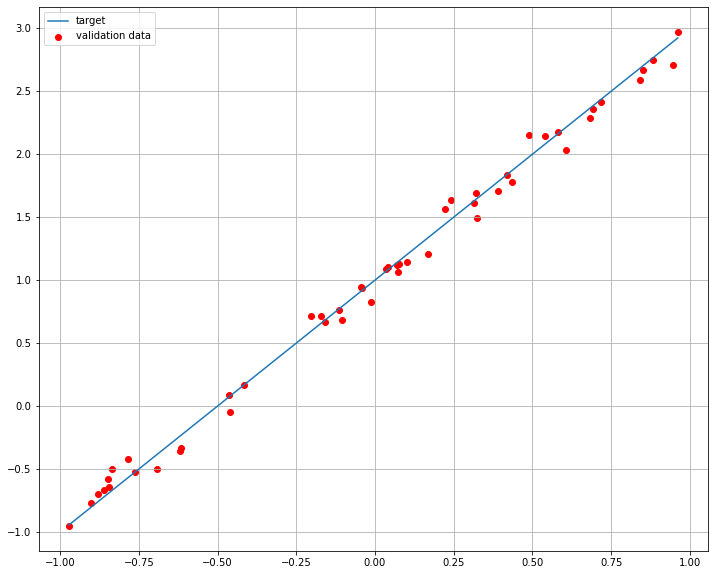

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
16/16 [==============================] - 1s 11ms/step - loss: 3.5545 - mse: 3.5545 - val_loss: 3.2369 - val_mse: 3.2369
Epoch 2/500
16/16 [==============================] - 0s 3ms/step - loss: 2.7521 - mse: 2.7521 - val_loss: 2.5122 - val_mse: 2.5122
Epoch 3/500
16/16 [==============================] - 0s 3ms/step - loss: 2.1689 - mse: 2.1689 - val_loss: 1.9774 - val_mse: 1.9774
Epoch 4/500
16/16 [==============================] - 0s 3ms/step - loss: 1.7309 - mse: 1.7309 - val_loss: 1.5697 - val_mse: 1.5697
Epoch 5/500
16/16 [==============================] - 0s 3ms/ste

16/16 [==============================] - 0s 3ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 60/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 61/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 62/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 63/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 64/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 65/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 66/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0088 - mse: 0

16/16 [==============================] - 0s 3ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 122/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 123/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 124/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 125/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 126/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 127/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 128/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0088 -

Epoch 183/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 184/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 185/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 186/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 187/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 188/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 189/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 190/500
16/16 [==============================] - 0s 3ms/step - 

Epoch 306/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 307/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 308/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 309/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 310/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 311/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 312/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 313/500
16/16 [==============================] - 0s 3ms/step - 

Epoch 429/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 430/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 431/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 432/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 433/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 434/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 435/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 436/500
16/16 [==============================] - 0s 3ms/step - 

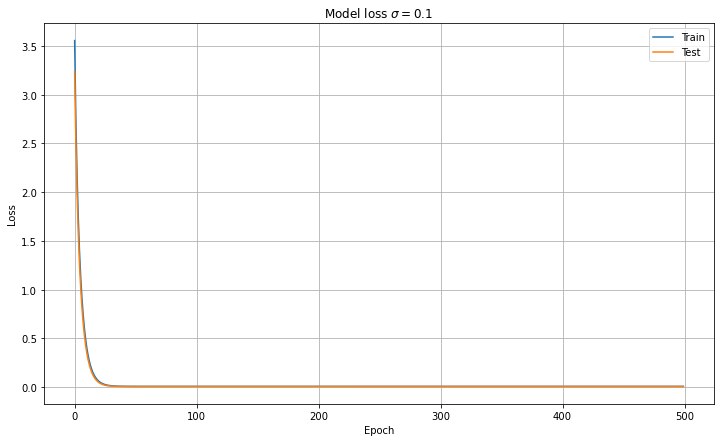

4/4 [==============================] - 0s 4ms/step


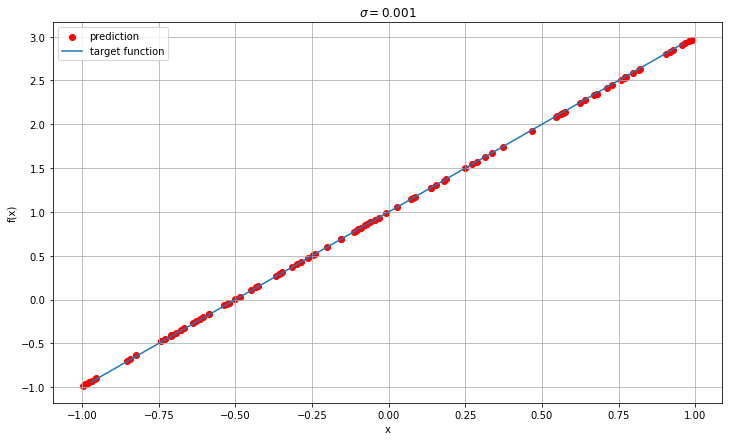

[array([[1.987683]], dtype=float32), array([1.0011121], dtype=float32)]

In [8]:
x_train = np.random.uniform(-1, 1, 500) #training set
x_valid = np.random.uniform(-1, 1, 50) # validation set
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma3 = 0.1 # noise standard deviation, for the moment absent
y_train = np.random.normal(m * x_train + b, sigma3) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma3)
# plot validation and target dataset
fig, ax= plt.subplots(figsize=(8,5))
ax.plot(x_valid, y_target, label='target')
ax.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()
model_3 = tf.keras.Sequential()
model_3.add(Dense(1, input_shape=(1,)))
# compile the model & get a summary
model_3.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model_3.summary()
history3 = model_3.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=500,
          shuffle=True, #  shuffle input before at each epoch
          validation_data=(x_valid, y_valid))
# evaluate model
score = model_3.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# look into training history
# Plot training & validation loss values
figure= plt.subplots(figsize=(8,5))
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss $\sigma=0.1$ ')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()


x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model_3.predict(x_predicted)
figure1=plt.subplots(figsize=(8,5))
plt.scatter(x_predicted, y_predicted,color='r', label='prediction')
plt.title('$\sigma=0.1$')
plt.plot(x_valid, y_target, label='target function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()
print('predicted value for the slope and the constant parameter:')
model_3.get_weights()

# $4^{th}$ try: $\sigma= 1.0$

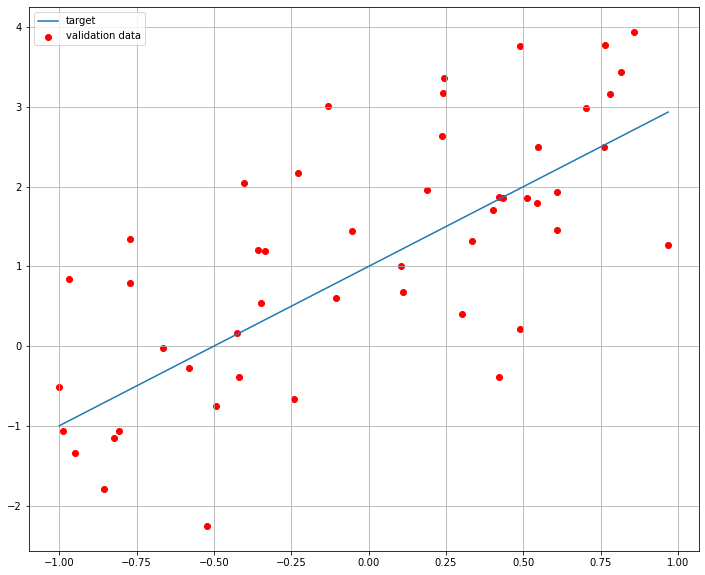

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
16/16 [==============================] - 1s 13ms/step - loss: 1.9599 - mse: 1.9599 - val_loss: 2.0561 - val_mse: 2.0561
Epoch 2/500
16/16 [==============================] - 0s 3ms/step - loss: 1.5493 - mse: 1.5493 - val_loss: 1.7115 - val_mse: 1.7115
Epoch 3/500
16/16 [==============================] - 0s 3ms/step - loss: 1.3259 - mse: 1.3259 - val_loss: 1.5131 - val_mse: 1.5131
Epoch 4/500
16/16 [==============================] - 0s 3ms/step - loss: 1.2009 - mse: 1.2009 - val_loss: 1.3946 - val_mse: 1.3946
Epoch 5/500
16/16 [==============================] - 0s 3ms/ste

16/16 [==============================] - 0s 3ms/step - loss: 0.9953 - mse: 0.9953 - val_loss: 1.1994 - val_mse: 1.1994
Epoch 60/500
16/16 [==============================] - 0s 3ms/step - loss: 0.9949 - mse: 0.9949 - val_loss: 1.1991 - val_mse: 1.1991
Epoch 61/500
16/16 [==============================] - 0s 3ms/step - loss: 0.9946 - mse: 0.9946 - val_loss: 1.1987 - val_mse: 1.1987
Epoch 62/500
16/16 [==============================] - 0s 3ms/step - loss: 0.9948 - mse: 0.9948 - val_loss: 1.1980 - val_mse: 1.1980
Epoch 63/500
16/16 [==============================] - 0s 3ms/step - loss: 0.9950 - mse: 0.9950 - val_loss: 1.1986 - val_mse: 1.1986
Epoch 64/500
16/16 [==============================] - 0s 3ms/step - loss: 0.9949 - mse: 0.9949 - val_loss: 1.1974 - val_mse: 1.1974
Epoch 65/500
16/16 [==============================] - 0s 3ms/step - loss: 0.9949 - mse: 0.9949 - val_loss: 1.1972 - val_mse: 1.1972
Epoch 66/500
16/16 [==============================] - 0s 3ms/step - loss: 0.9949 - mse: 0

16/16 [==============================] - 0s 3ms/step - loss: 0.9948 - mse: 0.9948 - val_loss: 1.1985 - val_mse: 1.1985
Epoch 122/500
16/16 [==============================] - 0s 3ms/step - loss: 0.9949 - mse: 0.9949 - val_loss: 1.1984 - val_mse: 1.1984
Epoch 123/500
16/16 [==============================] - 0s 3ms/step - loss: 0.9952 - mse: 0.9952 - val_loss: 1.1978 - val_mse: 1.1978
Epoch 124/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9949 - mse: 0.9949 - val_loss: 1.1992 - val_mse: 1.1992
Epoch 125/500
16/16 [==============================] - 0s 3ms/step - loss: 0.9948 - mse: 0.9948 - val_loss: 1.1994 - val_mse: 1.1994
Epoch 126/500
16/16 [==============================] - 0s 3ms/step - loss: 0.9951 - mse: 0.9951 - val_loss: 1.1995 - val_mse: 1.1995
Epoch 127/500
16/16 [==============================] - 0s 3ms/step - loss: 0.9945 - mse: 0.9945 - val_loss: 1.1987 - val_mse: 1.1987
Epoch 128/500
16/16 [==============================] - 0s 3ms/step - loss: 0.9953 -

Epoch 183/500
16/16 [==============================] - 0s 3ms/step - loss: 0.9954 - mse: 0.9954 - val_loss: 1.1985 - val_mse: 1.1985
Epoch 184/500
16/16 [==============================] - 0s 3ms/step - loss: 0.9949 - mse: 0.9949 - val_loss: 1.1986 - val_mse: 1.1986
Epoch 185/500
16/16 [==============================] - 0s 3ms/step - loss: 0.9946 - mse: 0.9946 - val_loss: 1.1982 - val_mse: 1.1982
Epoch 186/500
16/16 [==============================] - 0s 3ms/step - loss: 0.9948 - mse: 0.9948 - val_loss: 1.1969 - val_mse: 1.1969
Epoch 187/500
16/16 [==============================] - 0s 3ms/step - loss: 0.9949 - mse: 0.9949 - val_loss: 1.1966 - val_mse: 1.1966
Epoch 188/500
16/16 [==============================] - 0s 3ms/step - loss: 0.9949 - mse: 0.9949 - val_loss: 1.1975 - val_mse: 1.1975
Epoch 189/500
16/16 [==============================] - 0s 3ms/step - loss: 0.9947 - mse: 0.9947 - val_loss: 1.1975 - val_mse: 1.1975
Epoch 190/500
16/16 [==============================] - 0s 3ms/step - 

Epoch 306/500
16/16 [==============================] - 0s 3ms/step - loss: 0.9950 - mse: 0.9950 - val_loss: 1.1991 - val_mse: 1.1991
Epoch 307/500
16/16 [==============================] - 0s 3ms/step - loss: 0.9950 - mse: 0.9950 - val_loss: 1.1997 - val_mse: 1.1997
Epoch 308/500
16/16 [==============================] - 0s 3ms/step - loss: 0.9951 - mse: 0.9951 - val_loss: 1.1987 - val_mse: 1.1987
Epoch 309/500
16/16 [==============================] - 0s 3ms/step - loss: 0.9947 - mse: 0.9947 - val_loss: 1.1980 - val_mse: 1.1980
Epoch 310/500
16/16 [==============================] - 0s 3ms/step - loss: 0.9950 - mse: 0.9950 - val_loss: 1.1976 - val_mse: 1.1976
Epoch 311/500
16/16 [==============================] - 0s 3ms/step - loss: 0.9949 - mse: 0.9949 - val_loss: 1.1972 - val_mse: 1.1972
Epoch 312/500
16/16 [==============================] - 0s 3ms/step - loss: 0.9948 - mse: 0.9948 - val_loss: 1.1968 - val_mse: 1.1968
Epoch 313/500
16/16 [==============================] - 0s 3ms/step - 

Epoch 429/500
16/16 [==============================] - 0s 3ms/step - loss: 0.9949 - mse: 0.9949 - val_loss: 1.1981 - val_mse: 1.1981
Epoch 430/500
16/16 [==============================] - 0s 3ms/step - loss: 0.9949 - mse: 0.9949 - val_loss: 1.1977 - val_mse: 1.1977
Epoch 431/500
16/16 [==============================] - 0s 3ms/step - loss: 0.9948 - mse: 0.9948 - val_loss: 1.1988 - val_mse: 1.1988
Epoch 432/500
16/16 [==============================] - 0s 3ms/step - loss: 0.9952 - mse: 0.9952 - val_loss: 1.1970 - val_mse: 1.1970
Epoch 433/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9953 - mse: 0.9953 - val_loss: 1.1975 - val_mse: 1.1975
Epoch 434/500
16/16 [==============================] - 0s 3ms/step - loss: 0.9947 - mse: 0.9947 - val_loss: 1.1981 - val_mse: 1.1981
Epoch 435/500
16/16 [==============================] - 0s 3ms/step - loss: 0.9951 - mse: 0.9951 - val_loss: 1.1981 - val_mse: 1.1981
Epoch 436/500
16/16 [==============================] - 0s 3ms/step - 

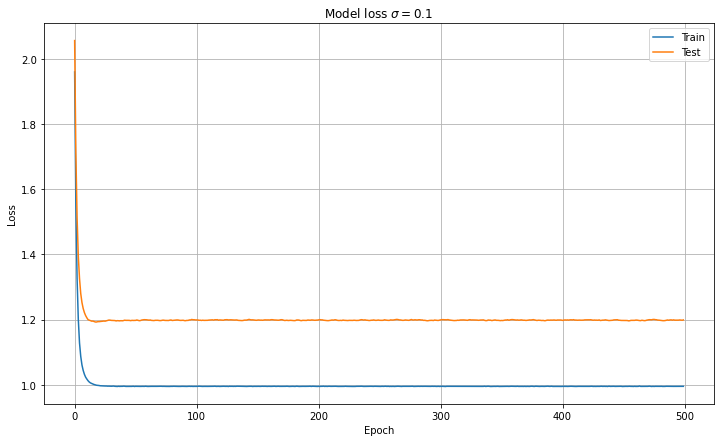

4/4 [==============================] - 0s 5ms/step


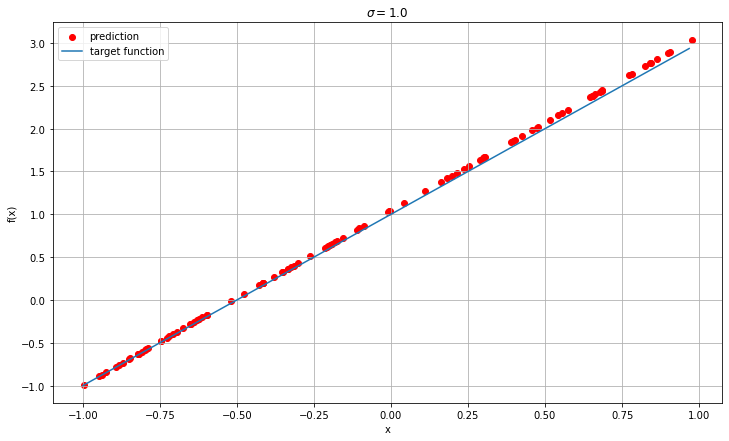

predicted value for the slope and the constant parameter:


[array([[2.0426874]], dtype=float32), array([1.0460612], dtype=float32)]

In [11]:
x_train = np.random.uniform(-1, 1, 500) #training set
x_valid = np.random.uniform(-1, 1, 50) # validation set
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma4 = 1.0 # noise standard deviation, for the moment absent
y_train = np.random.normal(m * x_train + b, sigma4) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma4)
# plot validation and target dataset
fig, ax= plt.subplots(figsize=(8,5))
ax.plot(x_valid, y_target, label='target')
ax.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()
model_4 = tf.keras.Sequential()
model_4.add(Dense(1, input_shape=(1,)))
# compile the model & get a summary
model_4.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model_4.summary()
history4 = model_4.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=500,
          shuffle=True, #  shuffle input before at each epoch
          validation_data=(x_valid, y_valid))
# evaluate model
score = model_4.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# look into training history
# Plot training & validation loss values
figure= plt.subplots(figsize=(8,5))
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model loss $\sigma=1.0$ ')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()


x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model_4.predict(x_predicted)
figure1=plt.subplots(figsize=(8,5))
plt.scatter(x_predicted, y_predicted,color='r', label='prediction')
plt.title('$\sigma=1.0$')
plt.plot(x_valid, y_target, label='target function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()
print('predicted value for the slope and the constant parameter:')
model_4.get_weights()

# $5^{th}$ try: $\sigma = 1.5$

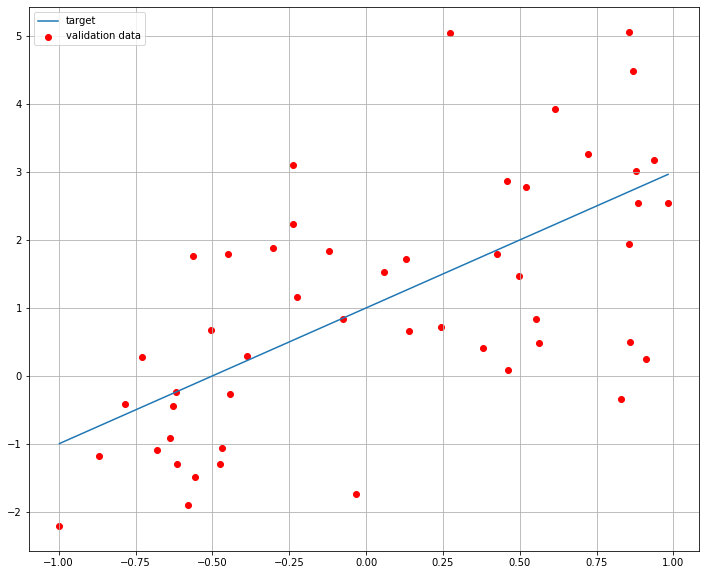

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
16/16 [==============================] - 1s 13ms/step - loss: 2.9977 - mse: 2.9977 - val_loss: 2.5439 - val_mse: 2.5439
Epoch 2/500
16/16 [==============================] - 0s 2ms/step - loss: 2.6876 - mse: 2.6876 - val_loss: 2.3032 - val_mse: 2.3032
Epoch 3/500
16/16 [==============================] - 0s 2ms/step - loss: 2.5197 - mse: 2.5197 - val_loss: 2.1650 - val_mse: 2.1650
Epoch 4/500
16/16 [==============================] - 0s 3ms/step - loss: 2.4253 - mse: 2.4253 - val_loss: 2.0888 - val_mse: 2.0888
Epoch 5/500
16/16 [==============================] - 0s 3ms/st

Epoch 59/500
16/16 [==============================] - 0s 2ms/step - loss: 2.2883 - mse: 2.2883 - val_loss: 1.9582 - val_mse: 1.9582
Epoch 60/500
16/16 [==============================] - 0s 3ms/step - loss: 2.2878 - mse: 2.2878 - val_loss: 1.9586 - val_mse: 1.9586
Epoch 61/500
16/16 [==============================] - 0s 3ms/step - loss: 2.2882 - mse: 2.2882 - val_loss: 1.9587 - val_mse: 1.9587
Epoch 62/500
16/16 [==============================] - 0s 3ms/step - loss: 2.2879 - mse: 2.2879 - val_loss: 1.9585 - val_mse: 1.9585
Epoch 63/500
16/16 [==============================] - 0s 3ms/step - loss: 2.2892 - mse: 2.2892 - val_loss: 1.9587 - val_mse: 1.9587
Epoch 64/500
16/16 [==============================] - 0s 2ms/step - loss: 2.2874 - mse: 2.2874 - val_loss: 1.9589 - val_mse: 1.9589
Epoch 65/500
16/16 [==============================] - 0s 3ms/step - loss: 2.2887 - mse: 2.2887 - val_loss: 1.9585 - val_mse: 1.9585
Epoch 66/500
16/16 [==============================] - 0s 3ms/step - loss: 2.

Epoch 121/500
16/16 [==============================] - 0s 3ms/step - loss: 2.2894 - mse: 2.2894 - val_loss: 1.9589 - val_mse: 1.9589
Epoch 122/500
16/16 [==============================] - 0s 3ms/step - loss: 2.2877 - mse: 2.2877 - val_loss: 1.9587 - val_mse: 1.9587
Epoch 123/500
16/16 [==============================] - 0s 3ms/step - loss: 2.2885 - mse: 2.2885 - val_loss: 1.9584 - val_mse: 1.9584
Epoch 124/500
16/16 [==============================] - 0s 3ms/step - loss: 2.2872 - mse: 2.2872 - val_loss: 1.9584 - val_mse: 1.9584
Epoch 125/500
16/16 [==============================] - 0s 3ms/step - loss: 2.2880 - mse: 2.2880 - val_loss: 1.9588 - val_mse: 1.9588
Epoch 126/500
16/16 [==============================] - 0s 3ms/step - loss: 2.2873 - mse: 2.2873 - val_loss: 1.9585 - val_mse: 1.9585
Epoch 127/500
16/16 [==============================] - 0s 3ms/step - loss: 2.2873 - mse: 2.2873 - val_loss: 1.9584 - val_mse: 1.9584
Epoch 128/500
16/16 [==============================] - 0s 3ms/step - 

Epoch 244/500
16/16 [==============================] - 0s 3ms/step - loss: 2.2883 - mse: 2.2883 - val_loss: 1.9580 - val_mse: 1.9580
Epoch 245/500
16/16 [==============================] - 0s 3ms/step - loss: 2.2875 - mse: 2.2875 - val_loss: 1.9579 - val_mse: 1.9579
Epoch 246/500
16/16 [==============================] - 0s 3ms/step - loss: 2.2888 - mse: 2.2888 - val_loss: 1.9581 - val_mse: 1.9581
Epoch 247/500
16/16 [==============================] - 0s 3ms/step - loss: 2.2884 - mse: 2.2884 - val_loss: 1.9582 - val_mse: 1.9582
Epoch 248/500
16/16 [==============================] - 0s 3ms/step - loss: 2.2878 - mse: 2.2878 - val_loss: 1.9582 - val_mse: 1.9582
Epoch 249/500
16/16 [==============================] - 0s 3ms/step - loss: 2.2876 - mse: 2.2876 - val_loss: 1.9584 - val_mse: 1.9584
Epoch 250/500
16/16 [==============================] - 0s 3ms/step - loss: 2.2880 - mse: 2.2880 - val_loss: 1.9582 - val_mse: 1.9582
Epoch 251/500
16/16 [==============================] - 0s 3ms/step - 

Epoch 367/500
16/16 [==============================] - 0s 3ms/step - loss: 2.2880 - mse: 2.2880 - val_loss: 1.9585 - val_mse: 1.9585
Epoch 368/500
16/16 [==============================] - 0s 3ms/step - loss: 2.2880 - mse: 2.2880 - val_loss: 1.9583 - val_mse: 1.9583
Epoch 369/500
16/16 [==============================] - 0s 3ms/step - loss: 2.2881 - mse: 2.2881 - val_loss: 1.9585 - val_mse: 1.9585
Epoch 370/500
16/16 [==============================] - 0s 3ms/step - loss: 2.2900 - mse: 2.2900 - val_loss: 1.9585 - val_mse: 1.9585
Epoch 371/500
16/16 [==============================] - 0s 3ms/step - loss: 2.2875 - mse: 2.2875 - val_loss: 1.9583 - val_mse: 1.9583
Epoch 372/500
16/16 [==============================] - 0s 3ms/step - loss: 2.2892 - mse: 2.2892 - val_loss: 1.9582 - val_mse: 1.9582
Epoch 373/500
16/16 [==============================] - 0s 3ms/step - loss: 2.2879 - mse: 2.2879 - val_loss: 1.9580 - val_mse: 1.9580
Epoch 374/500
16/16 [==============================] - 0s 3ms/step - 

Epoch 490/500
16/16 [==============================] - 0s 3ms/step - loss: 2.2874 - mse: 2.2874 - val_loss: 1.9579 - val_mse: 1.9579
Epoch 491/500
16/16 [==============================] - 0s 3ms/step - loss: 2.2873 - mse: 2.2873 - val_loss: 1.9580 - val_mse: 1.9580
Epoch 492/500
16/16 [==============================] - 0s 3ms/step - loss: 2.2879 - mse: 2.2879 - val_loss: 1.9580 - val_mse: 1.9580
Epoch 493/500
16/16 [==============================] - 0s 3ms/step - loss: 2.2877 - mse: 2.2877 - val_loss: 1.9579 - val_mse: 1.9579
Epoch 494/500
16/16 [==============================] - 0s 3ms/step - loss: 2.2880 - mse: 2.2880 - val_loss: 1.9579 - val_mse: 1.9579
Epoch 495/500
16/16 [==============================] - 0s 3ms/step - loss: 2.2877 - mse: 2.2877 - val_loss: 1.9579 - val_mse: 1.9579
Epoch 496/500
16/16 [==============================] - 0s 3ms/step - loss: 2.2877 - mse: 2.2877 - val_loss: 1.9580 - val_mse: 1.9580
Epoch 497/500
16/16 [==============================] - 0s 2ms/step - 

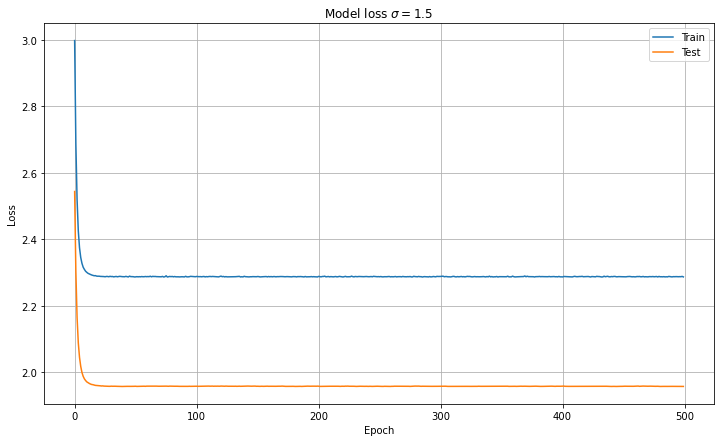

4/4 [==============================] - 0s 5ms/step


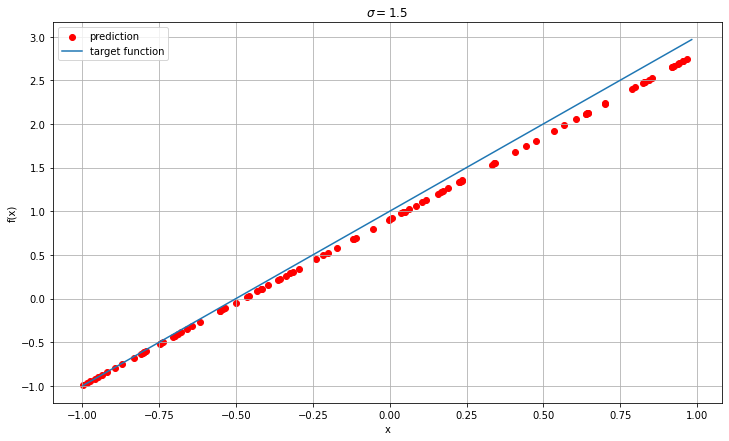

predicted value for the slope and the constant parameter:


[array([[1.8987921]], dtype=float32), array([0.9039721], dtype=float32)]

In [12]:
x_train = np.random.uniform(-1, 1, 500) #training set
x_valid = np.random.uniform(-1, 1, 50) # validation set
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma5 = 1.5 # noise standard deviation, for the moment absent
y_train = np.random.normal(m * x_train + b, sigma5) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma5)
# plot validation and target dataset
fig, ax= plt.subplots(figsize=(8,5))
ax.plot(x_valid, y_target, label='target')
ax.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()
model_5 = tf.keras.Sequential()
model_5.add(Dense(1, input_shape=(1,)))
# compile the model & get a summary
model_5.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model_5.summary()
history5 = model_5.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=500,
          shuffle=True, #  shuffle input before at each epoch
          validation_data=(x_valid, y_valid))
# evaluate model
score = model_5.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# look into training history
# Plot training & validation loss values
figure= plt.subplots(figsize=(8,5))
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('Model loss $\sigma=1.5$ ')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()


x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model_5.predict(x_predicted)
figure1=plt.subplots(figsize=(8,5))
plt.scatter(x_predicted, y_predicted,color='r', label='prediction')
plt.title('$\sigma=1.5$')
plt.plot(x_valid, y_target, label='target function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()
print('predicted value for the slope and the constant parameter:')
model_5.get_weights()

# summary $\sigma$ variation:
In conclusion, the higher the uncertainty the worse the prediction.
Up to th firtst 3 attempts the results, in terms of trainig error and validatio error, are pretty much comparable and there is no significative variation. In the last two attempts the prediction if worse, in particular we can notice also that the difference between the training error and the validation error increases, reaching a value of $\sim 10^{-1}$, which is comparable to the magnitude of the error themselves. 

### <span style="color:orange">Exercise 11.2 </span>

In the second part of the exercise I will try to build e feedforward neural network in order to produce a satisfying fit for a third degree polynimial:
$4 - 3x - 2x^{2} + 3x^{3}$
The startegy for solving the task is the following first is to define the right number of layers in the network: since by adding a layer the degree of the predicted function increases by one, a suitable number of layers should be three.
Let's start by fixing the neuron of the last layer, since the output is a single real value, the last layer will alway be composed by one neuron.
Then, I will proceed by arranging the number of neurons in each of the other two layers, looking for the combination that gives the best performance.

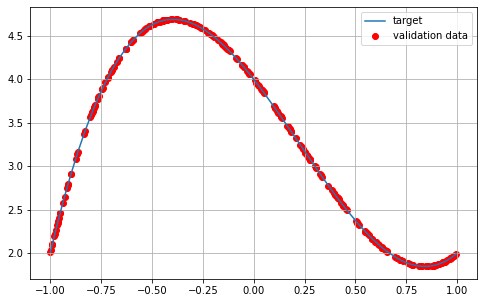

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
# generate training inputs & plot interesting things
#define the parameters
a=4
b=-3
c=-2
d=3
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000) #training set
x_valid = np.random.uniform(-1, 1, 250) # validation set
x_valid.sort()
y_target = 4 -3* x_valid -2*np.power(x_valid,2) + 3*np.power(x_valid,3) # ideal (target) polynomial function
sigma = 0.00 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a +b* x_train +c*np.power(x_train,2) +d*np.power(x_train,3), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a+b* x_valid +c*np.power(x_valid,2) +d*np.power(x_valid,3), sigma)
# plot validation and target dataset
fig, ax= plt.subplots(figsize=(8,5))
ax.plot(x_valid, y_target, label='target')
ax.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()
# construct the neural network

# First model: 

In [44]:
model1 = tf.keras.Sequential()
model1.add(Dense(units=5,input_shape=(1,)))
model1.add(Activation('relu'))
model1.add(Dense(units=5))
model1.add(Activation('relu'))
model1.add(Dense(units=1,input_shape=(1,)))
model1.add(Activation('relu'))

# compile the model & get a summary
model1.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model1.summary()
history1 = model1.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=1000,
          shuffle=True, #  shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 5)                 10        
                                                                 
 activation_33 (Activation)  (None, 5)                 0         
                                                                 
 dense_45 (Dense)            (None, 5)                 30        
                                                                 
 activation_34 (Activation)  (None, 5)                 0         
                                                                 
 dense_46 (Dense)            (None, 1)                 6         
                                                                 
 activation_35 (Activation)  (None, 1)                 0         
                                                                 
Total params: 46
Trainable params: 46
Non-trainable p

32/32 [==============================] - 0s 2ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 115/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 116/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 117/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 118/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 119/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 120/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 121/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 237/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 238/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 239/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 240/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 241/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 242/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 243/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 359/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 360/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 361/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 362/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 363/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 364/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 365/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 481/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 482/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 483/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 484/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 485/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 486/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 487/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 603/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 604/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 605/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 606/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 607/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 608/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 609/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 725/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 726/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 727/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 728/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 729/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 730/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 731/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 847/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 848/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 849/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 850/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 851/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 852/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 853/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 969/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 970/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 971/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 972/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 973/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 974/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 975/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

3/3 [==============================] - 0s 3ms/step - loss: 0.0027 - mse: 0.0027

Test loss: 0.0027323674876242876
Test accuracy: 0.0027323674876242876


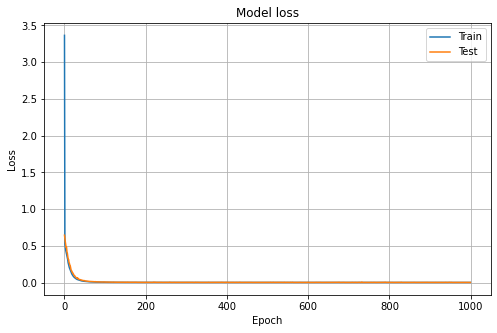

In [45]:
model1.get_weights()
score = model1.evaluate(x_valid, y_valid, batch_size=100, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# look into training history
# Plot training & validation loss values
fig2,ax2=plt.subplots(figsize=(8,5))
ax2.plot(history1.history['loss'])
ax2.plot(history1.history['val_loss'])
ax2.set_title('Model loss')
ax2.set_ylabel('Loss')
plt.xlabel('Epoch')
plt.grid(True)
ax2.legend(['Train', 'Test'], loc='best')
plt.show()


In [46]:
# return weights and biases
model1.get_weights()

[array([[-0.7786933 ,  1.1117619 ,  1.1719793 ,  0.00588352,  1.2595736 ]],
       dtype=float32),
 array([ 0.5120469 ,  0.25114453,  1.1704545 , -0.00615173,  0.8532581 ],
       dtype=float32),
 array([[ 0.0379889 , -0.66489315,  0.5301287 , -0.47750202, -0.5232283 ],
        [-1.2291867 , -0.20024534,  0.0504501 , -0.19527233, -0.01313601],
        [ 1.4361155 ,  0.45782518, -0.53496426, -0.5552774 ,  0.91268545],
        [ 0.6538249 ,  0.37235278, -0.20357239,  0.62312686, -0.345322  ],
        [-1.4434263 ,  0.7312332 ,  0.91498536, -0.31860173,  0.06604879]],
       dtype=float32),
 array([0.84877354, 0.07387946, 0.02983481, 0.        , 0.6747246 ],
       dtype=float32),
 array([[ 2.3187962 ],
        [-0.70479083],
        [-1.0057094 ],
        [ 0.01920414],
        [ 1.2124538 ]], dtype=float32),
 array([0.81390893], dtype=float32)]

16/16 [==============================] - 0s 1ms/step


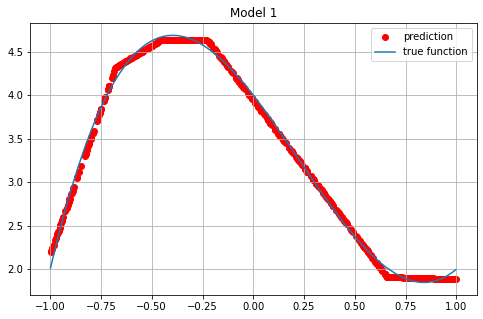

In [47]:
x_predicted = np.random.uniform(-1,1, 500)
y_predicted = model1.predict(x_predicted)

figure = plt.subplots(figsize=(8,5))
plt.scatter(x_predicted, y_predicted,color='r', label='prediction')
plt.title('Model 1')
plt.plot(x_valid, y_target, label='true function')
plt.legend()
plt.grid(True)
plt.show()

# Model 2:

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 10)                20        
                                                                 
 activation_12 (Activation)  (None, 10)                0         
                                                                 
 dense_24 (Dense)            (None, 5)                 55        
                                                                 
 activation_13 (Activation)  (None, 5)                 0         
                                                                 
 dense_25 (Dense)            (None, 1)                 6         
                                                                 
 activation_14 (Activation)  (None, 1)                 0         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable p

32/32 [==============================] - 0s 1ms/step - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 115/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 116/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 117/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 118/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 119/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 120/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 121/1000
32/32 [==============================] - 0s 1ms/step - loss: 0

32/32 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 237/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 238/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 239/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 240/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 241/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 242/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 243/1000
32/32 [==============================] - 0s 1ms/step - loss: 0

32/32 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 359/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 360/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 361/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 362/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 363/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 364/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 365/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 481/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 482/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 483/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 484/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 485/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 486/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 487/1000
32/32 [==============================] - 0s 1ms/step - loss: 0

32/32 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 603/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 604/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 605/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 606/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 607/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 608/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 609/1000
32/32 [==============================] - 0s 1ms/step - loss: 0

32/32 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 725/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 726/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 727/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 728/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 729/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 730/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 731/1000
32/32 [==============================] - 0s 1ms/step - loss: 0

32/32 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 847/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 848/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 849/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 850/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 851/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 852/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 853/1000
32/32 [==============================] - 0s 1ms/step - loss: 0

32/32 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 969/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 970/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 971/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 972/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 973/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 974/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 975/1000
32/32 [==============================] - 0s 1ms/step - loss: 0

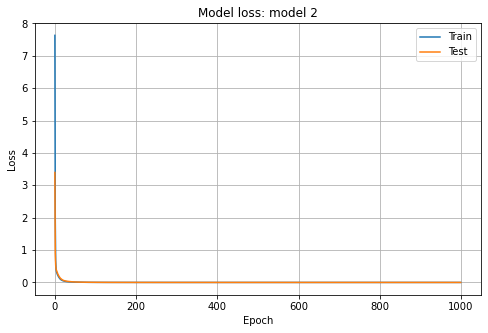

In [27]:
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000) #training set
x_valid = np.random.uniform(-1, 1, 250) # validation set
x_valid.sort()
y_target = 4 -3* x_valid -2*np.power(x_valid,2) + 3*np.power(x_valid,3) # ideal (target) polynomial function
sigma = 0.00 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a +b* x_train +c*np.power(x_train,2) +d*np.power(x_train,3), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a+b* x_valid +c*np.power(x_valid,2) +d*np.power(x_valid,3), sigma)


model2 = tf.keras.Sequential()
model2.add(Dense(units=10,input_shape=(1,)))
model2.add(Activation('relu'))
model2.add(Dense(units=5))
model2.add(Activation('relu'))
model2.add(Dense(units=1,input_shape=(1,)))
model2.add(Activation('relu'))

# compile the model & get a summary
model2.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model2.summary()
history2 = model2.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=1000,
          shuffle=True, #  shuffle input before at each epoch
          validation_data=(x_valid, y_valid))


model2.get_weights()
score = model2.evaluate(x_valid, y_valid, batch_size=100, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# look into training history
# Plot training & validation loss values
fig2,ax2=plt.subplots(figsize=(8,5))
ax2.plot(history2.history['loss'])
ax2.plot(history2.history['val_loss'])
ax2.set_title('Model loss: model 2')
ax2.set_ylabel('Loss')
plt.xlabel('Epoch')
plt.grid(True)
ax2.legend(['Train', 'Test'], loc='best')
plt.show()


16/16 [==============================] - 0s 665us/step


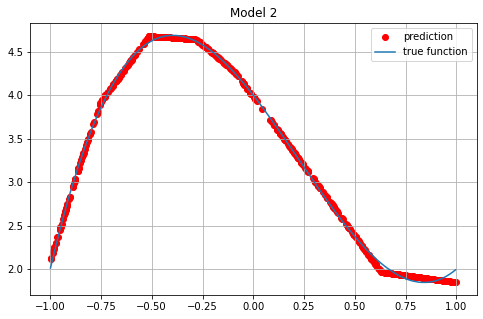

In [28]:

model2.get_weights()
x_predicted = np.random.uniform(-1,1, 500)
y_predicted = model2.predict(x_predicted)

figure = plt.subplots(figsize=(8,5))
plt.scatter(x_predicted, y_predicted,color='r', label='prediction')
plt.title('Model 2')
plt.plot(x_valid, y_target, label='true function')
plt.legend()
plt.grid(True)
plt.show()

# Model 3:

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 10)                20        
                                                                 
 activation_15 (Activation)  (None, 10)                0         
                                                                 
 dense_27 (Dense)            (None, 10)                110       
                                                                 
 activation_16 (Activation)  (None, 10)                0         
                                                                 
 dense_28 (Dense)            (None, 1)                 11        
                                                                 
 activation_17 (Activation)  (None, 1)                 0         
                                                                 
Total params: 141
Trainable params: 141
Non-trainable

32/32 [==============================] - 0s 2ms/step - loss: 0.0114 - mse: 0.0114 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 115/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 116/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0142 - val_mse: 0.0142
Epoch 117/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 118/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0142 - val_mse: 0.0142
Epoch 119/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 120/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0142 - val_mse: 0.0142
Epoch 121/1000
32/32 [==============================] - 0s 1ms/step - loss: 0

32/32 [==============================] - 0s 1ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 237/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 238/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 239/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 240/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 241/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 242/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 243/1000
32/32 [==============================] - 0s 1ms/step - loss: 0

32/32 [==============================] - 0s 1ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 359/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 360/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 361/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 362/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 363/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 364/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 365/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 481/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 482/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 483/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 484/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 485/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 486/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 487/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 1ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 603/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 604/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 605/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 606/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 607/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 608/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 609/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 1ms/step - loss: 8.3078e-04 - mse: 8.3078e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 719/1000
32/32 [==============================] - 0s 1ms/step - loss: 8.4449e-04 - mse: 8.4449e-04 - val_loss: 9.6416e-04 - val_mse: 9.6416e-04
Epoch 720/1000
32/32 [==============================] - 0s 1ms/step - loss: 8.3373e-04 - mse: 8.3373e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 721/1000
32/32 [==============================] - 0s 1ms/step - loss: 8.1930e-04 - mse: 8.1930e-04 - val_loss: 9.5522e-04 - val_mse: 9.5522e-04
Epoch 722/1000
32/32 [==============================] - 0s 1ms/step - loss: 8.3690e-04 - mse: 8.3690e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 723/1000
32/32 [==============================] - 0s 1ms/step - loss: 8.2231e-04 - mse: 8.2231e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 724/1000
32/32 [==============================] - 0s 1ms/step - loss: 8.4620e-04 - mse: 8.4620e-04 - val_loss: 9.8059e-04 - val_mse: 9.8059e-

Epoch 774/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.6592e-04 - mse: 7.6592e-04 - val_loss: 8.4799e-04 - val_mse: 8.4799e-04
Epoch 775/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.3590e-04 - mse: 7.3590e-04 - val_loss: 8.6386e-04 - val_mse: 8.6386e-04
Epoch 776/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.5964e-04 - mse: 7.5964e-04 - val_loss: 8.5820e-04 - val_mse: 8.5820e-04
Epoch 777/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.4765e-04 - mse: 7.4765e-04 - val_loss: 8.3165e-04 - val_mse: 8.3165e-04
Epoch 778/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.4021e-04 - mse: 7.4021e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 779/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.5381e-04 - mse: 7.5381e-04 - val_loss: 8.6527e-04 - val_mse: 8.6527e-04
Epoch 780/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.4129e-04 - mse: 7.4129e-04 - v

Epoch 829/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.0756e-04 - mse: 7.0756e-04 - val_loss: 7.9542e-04 - val_mse: 7.9542e-04
Epoch 830/1000
32/32 [==============================] - 0s 1ms/step - loss: 6.8215e-04 - mse: 6.8215e-04 - val_loss: 7.8878e-04 - val_mse: 7.8878e-04
Epoch 831/1000
32/32 [==============================] - 0s 1ms/step - loss: 6.9285e-04 - mse: 6.9285e-04 - val_loss: 7.6547e-04 - val_mse: 7.6547e-04
Epoch 832/1000
32/32 [==============================] - 0s 1ms/step - loss: 6.8132e-04 - mse: 6.8132e-04 - val_loss: 9.1270e-04 - val_mse: 9.1270e-04
Epoch 833/1000
32/32 [==============================] - 0s 1ms/step - loss: 6.9228e-04 - mse: 6.9228e-04 - val_loss: 8.4043e-04 - val_mse: 8.4043e-04
Epoch 834/1000
32/32 [==============================] - 0s 1ms/step - loss: 6.8584e-04 - mse: 6.8584e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 835/1000
32/32 [==============================] - 0s 1ms/step - loss: 6.8124e-04 - mse: 6.8124e-04 - v

Epoch 884/1000
32/32 [==============================] - 0s 1ms/step - loss: 6.3833e-04 - mse: 6.3833e-04 - val_loss: 9.2443e-04 - val_mse: 9.2443e-04
Epoch 885/1000
32/32 [==============================] - 0s 1ms/step - loss: 6.3534e-04 - mse: 6.3534e-04 - val_loss: 7.1526e-04 - val_mse: 7.1526e-04
Epoch 886/1000
32/32 [==============================] - 0s 1ms/step - loss: 6.2894e-04 - mse: 6.2894e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 887/1000
32/32 [==============================] - 0s 1ms/step - loss: 6.6107e-04 - mse: 6.6107e-04 - val_loss: 7.4744e-04 - val_mse: 7.4744e-04
Epoch 888/1000
32/32 [==============================] - 0s 1ms/step - loss: 6.2015e-04 - mse: 6.2015e-04 - val_loss: 7.5814e-04 - val_mse: 7.5814e-04
Epoch 889/1000
32/32 [==============================] - 0s 1ms/step - loss: 6.2316e-04 - mse: 6.2316e-04 - val_loss: 9.9320e-04 - val_mse: 9.9320e-04
Epoch 890/1000
32/32 [==============================] - 0s 1ms/step - loss: 6.4873e-04 - mse: 6.4873e-04 - v

Epoch 939/1000
32/32 [==============================] - 0s 1ms/step - loss: 5.8838e-04 - mse: 5.8838e-04 - val_loss: 7.6392e-04 - val_mse: 7.6392e-04
Epoch 940/1000
32/32 [==============================] - 0s 1ms/step - loss: 6.0112e-04 - mse: 6.0112e-04 - val_loss: 7.0184e-04 - val_mse: 7.0184e-04
Epoch 941/1000
32/32 [==============================] - 0s 1ms/step - loss: 5.8352e-04 - mse: 5.8352e-04 - val_loss: 6.5891e-04 - val_mse: 6.5891e-04
Epoch 942/1000
32/32 [==============================] - 0s 1ms/step - loss: 5.8123e-04 - mse: 5.8123e-04 - val_loss: 6.5957e-04 - val_mse: 6.5957e-04
Epoch 943/1000
32/32 [==============================] - 0s 1ms/step - loss: 5.8867e-04 - mse: 5.8867e-04 - val_loss: 8.1904e-04 - val_mse: 8.1904e-04
Epoch 944/1000
32/32 [==============================] - 0s 1ms/step - loss: 5.8247e-04 - mse: 5.8247e-04 - val_loss: 6.6750e-04 - val_mse: 6.6750e-04
Epoch 945/1000
32/32 [==============================] - 0s 1ms/step - loss: 5.9412e-04 - mse: 5.9412

Epoch 994/1000
32/32 [==============================] - 0s 1ms/step - loss: 5.5639e-04 - mse: 5.5639e-04 - val_loss: 6.3375e-04 - val_mse: 6.3375e-04
Epoch 995/1000
32/32 [==============================] - 0s 1ms/step - loss: 5.5042e-04 - mse: 5.5042e-04 - val_loss: 6.2489e-04 - val_mse: 6.2489e-04
Epoch 996/1000
32/32 [==============================] - 0s 2ms/step - loss: 5.4993e-04 - mse: 5.4993e-04 - val_loss: 6.6621e-04 - val_mse: 6.6621e-04
Epoch 997/1000
32/32 [==============================] - 0s 2ms/step - loss: 5.5015e-04 - mse: 5.5015e-04 - val_loss: 6.8687e-04 - val_mse: 6.8687e-04
Epoch 998/1000
32/32 [==============================] - 0s 1ms/step - loss: 5.7118e-04 - mse: 5.7118e-04 - val_loss: 6.1677e-04 - val_mse: 6.1677e-04
Epoch 999/1000
32/32 [==============================] - 0s 1ms/step - loss: 5.6125e-04 - mse: 5.6125e-04 - val_loss: 6.1680e-04 - val_mse: 6.1680e-04
Epoch 1000/1000
3/3 [==============================] - 0s 1ms/step - loss: 6.5276e-04 - mse: 6.5276e

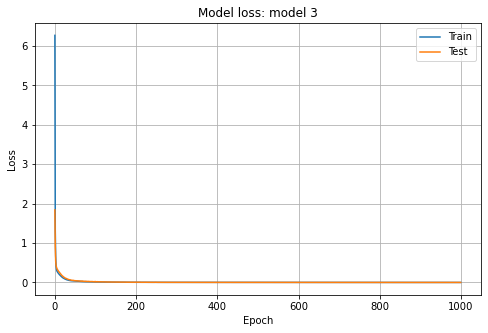

In [29]:
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000) #training set
x_valid = np.random.uniform(-1, 1, 250) # validation set
x_valid.sort()
y_target = 4 -3* x_valid -2*np.power(x_valid,2) + 3*np.power(x_valid,3) # ideal (target) polynomial function
sigma = 0.00 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a +b* x_train +c*np.power(x_train,2) +d*np.power(x_train,3), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a+b* x_valid +c*np.power(x_valid,2) +d*np.power(x_valid,3), sigma)


model3 = tf.keras.Sequential()
model3.add(Dense(units=10,input_shape=(1,)))
model3.add(Activation('relu'))
model3.add(Dense(units=10))
model3.add(Activation('relu'))
model3.add(Dense(units=1,input_shape=(1,)))
model3.add(Activation('relu'))

# compile the model & get a summary
model3.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model3.summary()
history3 = model3.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=1000,
          shuffle=True, #  shuffle input before at each epoch
          validation_data=(x_valid, y_valid))


model3.get_weights()
score = model3.evaluate(x_valid, y_valid, batch_size=100, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# look into training history
# Plot training & validation loss values
fig2,ax2=plt.subplots(figsize=(8,5))
ax2.plot(history3.history['loss'])
ax2.plot(history3.history['val_loss'])
ax2.set_title('Model loss: model 3')
ax2.set_ylabel('Loss')
plt.xlabel('Epoch')
plt.grid(True)
ax2.legend(['Train', 'Test'], loc='best')
plt.show()


16/16 [==============================] - 0s 729us/step


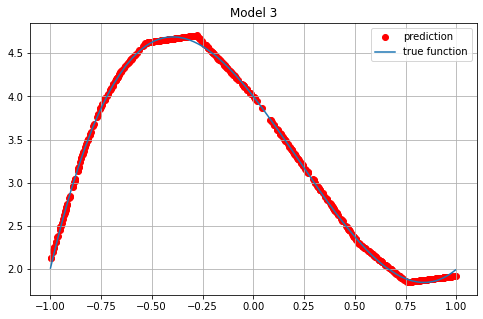

In [30]:
model3.get_weights()
x_predicted = np.random.uniform(-1,1, 500)
y_predicted = model3.predict(x_predicted)

figure = plt.subplots(figsize=(8,5))
plt.scatter(x_predicted, y_predicted,color='r', label='prediction')
plt.title('Model 3')
plt.plot(x_valid, y_target, label='true function')
plt.legend()
plt.grid(True)
plt.show()

# Model 4: 

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 15)                30        
                                                                 
 activation_18 (Activation)  (None, 15)                0         
                                                                 
 dense_30 (Dense)            (None, 10)                160       
                                                                 
 activation_19 (Activation)  (None, 10)                0         
                                                                 
 dense_31 (Dense)            (None, 1)                 11        
                                                                 
 activation_20 (Activation)  (None, 1)                 0         
                                                                 
Total params: 201
Trainable params: 201
Non-trainable

32/32 [==============================] - 0s 2ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 115/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 116/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 117/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 118/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 119/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 120/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 121/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 1ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 237/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 238/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 239/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 240/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 241/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 242/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 243/1000
32/32 [==============================] - 0s 1ms/step - loss: 0

32/32 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 359/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 360/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 361/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 362/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 363/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 364/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 365/1000
32/32 [==============================] - 0s 1ms/step - loss: 0

32/32 [==============================] - 0s 1ms/step - loss: 9.9895e-04 - mse: 9.9895e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 481/1000
32/32 [==============================] - 0s 1ms/step - loss: 9.9439e-04 - mse: 9.9439e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 482/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 483/1000
32/32 [==============================] - 0s 1ms/step - loss: 9.9069e-04 - mse: 9.9069e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 484/1000
32/32 [==============================] - 0s 1ms/step - loss: 9.9350e-04 - mse: 9.9350e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 485/1000
32/32 [==============================] - 0s 1ms/step - loss: 9.8892e-04 - mse: 9.8892e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 486/1000
32/32 [==============================] - 0s 1ms/step - loss: 9.6833e-04 - mse: 9.6833e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 487/1000
32/32 [=======

Epoch 538/1000
32/32 [==============================] - 0s 1ms/step - loss: 8.7185e-04 - mse: 8.7185e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 539/1000
32/32 [==============================] - 0s 1ms/step - loss: 8.7160e-04 - mse: 8.7160e-04 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 540/1000
32/32 [==============================] - 0s 1ms/step - loss: 8.7029e-04 - mse: 8.7029e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 541/1000
32/32 [==============================] - 0s 1ms/step - loss: 8.6438e-04 - mse: 8.6438e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 542/1000
32/32 [==============================] - 0s 1ms/step - loss: 8.6916e-04 - mse: 8.6916e-04 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 543/1000
32/32 [==============================] - 0s 1ms/step - loss: 8.6531e-04 - mse: 8.6531e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 544/1000
32/32 [==============================] - 0s 1ms/step - loss: 8.7320e-04 - mse: 8.7320e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 

Epoch 649/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.1262e-04 - mse: 7.1262e-04 - val_loss: 9.8220e-04 - val_mse: 9.8220e-04
Epoch 650/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.1272e-04 - mse: 7.1272e-04 - val_loss: 9.3745e-04 - val_mse: 9.3745e-04
Epoch 651/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.1373e-04 - mse: 7.1373e-04 - val_loss: 8.4742e-04 - val_mse: 8.4742e-04
Epoch 652/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.1982e-04 - mse: 7.1982e-04 - val_loss: 8.5222e-04 - val_mse: 8.5222e-04
Epoch 653/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.1510e-04 - mse: 7.1510e-04 - val_loss: 9.9750e-04 - val_mse: 9.9750e-04
Epoch 654/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.0875e-04 - mse: 7.0875e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 655/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.2552e-04 - mse: 7.2552e-04 - v

Epoch 704/1000
32/32 [==============================] - 0s 1ms/step - loss: 6.6479e-04 - mse: 6.6479e-04 - val_loss: 8.9390e-04 - val_mse: 8.9390e-04
Epoch 705/1000
32/32 [==============================] - 0s 2ms/step - loss: 6.6485e-04 - mse: 6.6485e-04 - val_loss: 8.2476e-04 - val_mse: 8.2476e-04
Epoch 706/1000
32/32 [==============================] - 0s 1ms/step - loss: 6.6187e-04 - mse: 6.6187e-04 - val_loss: 8.1389e-04 - val_mse: 8.1389e-04
Epoch 707/1000
32/32 [==============================] - 0s 2ms/step - loss: 6.5913e-04 - mse: 6.5913e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 708/1000
32/32 [==============================] - 0s 1ms/step - loss: 6.6986e-04 - mse: 6.6986e-04 - val_loss: 7.8886e-04 - val_mse: 7.8886e-04
Epoch 709/1000
32/32 [==============================] - 0s 1ms/step - loss: 6.5690e-04 - mse: 6.5690e-04 - val_loss: 8.3556e-04 - val_mse: 8.3556e-04
Epoch 710/1000
32/32 [==============================] - 0s 1ms/step - loss: 6.6191e-04 - mse: 6.6191e-04 - v

Epoch 759/1000
32/32 [==============================] - 0s 2ms/step - loss: 6.2013e-04 - mse: 6.2013e-04 - val_loss: 7.4874e-04 - val_mse: 7.4874e-04
Epoch 760/1000
32/32 [==============================] - 0s 1ms/step - loss: 6.1655e-04 - mse: 6.1655e-04 - val_loss: 7.6581e-04 - val_mse: 7.6581e-04
Epoch 761/1000
32/32 [==============================] - 0s 1ms/step - loss: 6.1418e-04 - mse: 6.1418e-04 - val_loss: 7.3520e-04 - val_mse: 7.3520e-04
Epoch 762/1000
32/32 [==============================] - 0s 1ms/step - loss: 6.1763e-04 - mse: 6.1763e-04 - val_loss: 7.7175e-04 - val_mse: 7.7175e-04
Epoch 763/1000
32/32 [==============================] - 0s 1ms/step - loss: 6.1984e-04 - mse: 6.1984e-04 - val_loss: 7.7444e-04 - val_mse: 7.7444e-04
Epoch 764/1000
32/32 [==============================] - 0s 1ms/step - loss: 6.2304e-04 - mse: 6.2304e-04 - val_loss: 7.6587e-04 - val_mse: 7.6587e-04
Epoch 765/1000
32/32 [==============================] - 0s 1ms/step - loss: 6.1669e-04 - mse: 6.1669

Epoch 868/1000
32/32 [==============================] - 0s 1ms/step - loss: 5.6269e-04 - mse: 5.6269e-04 - val_loss: 6.5609e-04 - val_mse: 6.5609e-04
Epoch 869/1000
32/32 [==============================] - 0s 1ms/step - loss: 5.5189e-04 - mse: 5.5189e-04 - val_loss: 6.6709e-04 - val_mse: 6.6709e-04
Epoch 870/1000
32/32 [==============================] - 0s 1ms/step - loss: 5.5537e-04 - mse: 5.5537e-04 - val_loss: 6.6972e-04 - val_mse: 6.6972e-04
Epoch 871/1000
32/32 [==============================] - 0s 1ms/step - loss: 5.5724e-04 - mse: 5.5724e-04 - val_loss: 6.5678e-04 - val_mse: 6.5678e-04
Epoch 872/1000
32/32 [==============================] - 0s 1ms/step - loss: 5.5584e-04 - mse: 5.5584e-04 - val_loss: 6.7522e-04 - val_mse: 6.7522e-04
Epoch 873/1000
32/32 [==============================] - 0s 1ms/step - loss: 5.5374e-04 - mse: 5.5374e-04 - val_loss: 6.7656e-04 - val_mse: 6.7656e-04
Epoch 874/1000
32/32 [==============================] - 0s 1ms/step - loss: 5.4910e-04 - mse: 5.4910

Epoch 977/1000
32/32 [==============================] - 0s 1ms/step - loss: 5.0697e-04 - mse: 5.0697e-04 - val_loss: 6.3612e-04 - val_mse: 6.3612e-04
Epoch 978/1000
32/32 [==============================] - 0s 1ms/step - loss: 5.0757e-04 - mse: 5.0757e-04 - val_loss: 7.6616e-04 - val_mse: 7.6616e-04
Epoch 979/1000
32/32 [==============================] - 0s 1ms/step - loss: 5.0867e-04 - mse: 5.0867e-04 - val_loss: 6.0643e-04 - val_mse: 6.0643e-04
Epoch 980/1000
32/32 [==============================] - 0s 1ms/step - loss: 5.0596e-04 - mse: 5.0596e-04 - val_loss: 6.6597e-04 - val_mse: 6.6597e-04
Epoch 981/1000
32/32 [==============================] - 0s 1ms/step - loss: 5.0869e-04 - mse: 5.0869e-04 - val_loss: 6.3600e-04 - val_mse: 6.3600e-04
Epoch 982/1000
32/32 [==============================] - 0s 1ms/step - loss: 5.0834e-04 - mse: 5.0834e-04 - val_loss: 6.5150e-04 - val_mse: 6.5150e-04
Epoch 983/1000
32/32 [==============================] - 0s 1ms/step - loss: 5.0593e-04 - mse: 5.0593

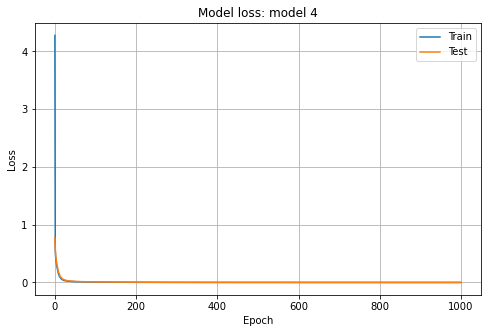

In [31]:
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000) #training set
x_valid = np.random.uniform(-1, 1, 250) # validation set
x_valid.sort()
y_target = 4 -3* x_valid -2*np.power(x_valid,2) + 3*np.power(x_valid,3) # ideal (target) polynomial function
sigma = 0.00 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a +b* x_train +c*np.power(x_train,2) +d*np.power(x_train,3), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a+b* x_valid +c*np.power(x_valid,2) +d*np.power(x_valid,3), sigma)


model4 = tf.keras.Sequential()
model4.add(Dense(units=15,input_shape=(1,)))
model4.add(Activation('relu'))
model4.add(Dense(units=10))
model4.add(Activation('relu'))
model4.add(Dense(units=1,input_shape=(1,)))
model4.add(Activation('relu'))

# compile the model & get a summary
model4.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model4.summary()
history4 = model4.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=1000,
          shuffle=True, #  shuffle input before at each epoch
          validation_data=(x_valid, y_valid))


model4.get_weights()
score = model4.evaluate(x_valid, y_valid, batch_size=100, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# look into training history
# Plot training & validation loss values
fig2,ax2=plt.subplots(figsize=(8,5))
ax2.plot(history4.history['loss'])
ax2.plot(history4.history['val_loss'])
ax2.set_title('Model loss: model 4')
ax2.set_ylabel('Loss')
plt.xlabel('Epoch')
plt.grid(True)
ax2.legend(['Train', 'Test'], loc='best')
plt.show()


16/16 [==============================] - 0s 665us/step


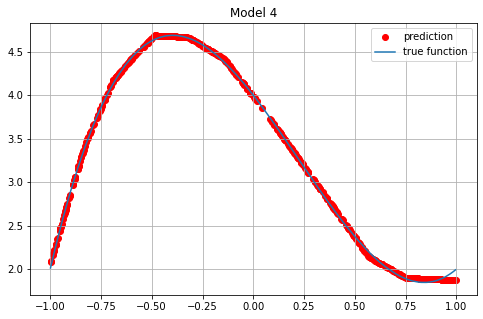

In [32]:
model4.get_weights()
x_predicted = np.random.uniform(-1,1, 500)
y_predicted = model4.predict(x_predicted)

figure = plt.subplots(figsize=(8,5))
plt.scatter(x_predicted, y_predicted,color='r', label='prediction')
plt.title('Model 4')
plt.plot(x_valid, y_target, label='true function')
plt.legend()
plt.grid(True)
plt.show()

# Model 5:

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 15)                30        
                                                                 
 activation_24 (Activation)  (None, 15)                0         
                                                                 
 dense_36 (Dense)            (None, 15)                240       
                                                                 
 activation_25 (Activation)  (None, 15)                0         
                                                                 
 dense_37 (Dense)            (None, 1)                 16        
                                                                 
 activation_26 (Activation)  (None, 1)                 0         
                                                                 
Total params: 286
Trainable params: 286
Non-trainable

32/32 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 115/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 116/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 117/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 118/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 119/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 120/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 121/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

Epoch 235/1000
32/32 [==============================] - 0s 1ms/step - loss: 9.4080e-04 - mse: 9.4080e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 236/1000
32/32 [==============================] - 0s 1ms/step - loss: 9.1132e-04 - mse: 9.1132e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 237/1000
32/32 [==============================] - 0s 1ms/step - loss: 9.0661e-04 - mse: 9.0661e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 238/1000
32/32 [==============================] - 0s 1ms/step - loss: 9.0544e-04 - mse: 9.0544e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 239/1000
32/32 [==============================] - 0s 1ms/step - loss: 9.0594e-04 - mse: 9.0594e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 240/1000
32/32 [==============================] - 0s 2ms/step - loss: 9.0427e-04 - mse: 9.0427e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 241/1000
32/32 [==============================] - 0s 1ms/step - loss: 9.0216e-04 - mse: 9.0216e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 

Epoch 348/1000
32/32 [==============================] - 0s 1ms/step - loss: 6.8920e-04 - mse: 6.8920e-04 - val_loss: 8.9363e-04 - val_mse: 8.9363e-04
Epoch 349/1000
32/32 [==============================] - 0s 2ms/step - loss: 6.8210e-04 - mse: 6.8210e-04 - val_loss: 9.3605e-04 - val_mse: 9.3605e-04
Epoch 350/1000
32/32 [==============================] - 0s 2ms/step - loss: 6.9753e-04 - mse: 6.9753e-04 - val_loss: 9.0165e-04 - val_mse: 9.0165e-04
Epoch 351/1000
32/32 [==============================] - 0s 1ms/step - loss: 6.8125e-04 - mse: 6.8125e-04 - val_loss: 9.3414e-04 - val_mse: 9.3414e-04
Epoch 352/1000
32/32 [==============================] - 0s 1ms/step - loss: 6.8844e-04 - mse: 6.8844e-04 - val_loss: 8.7569e-04 - val_mse: 8.7569e-04
Epoch 353/1000
32/32 [==============================] - 0s 1ms/step - loss: 6.8115e-04 - mse: 6.8115e-04 - val_loss: 8.5794e-04 - val_mse: 8.5794e-04
Epoch 354/1000
32/32 [==============================] - 0s 1ms/step - loss: 6.8205e-04 - mse: 6.8205

Epoch 457/1000
32/32 [==============================] - 0s 1ms/step - loss: 5.6589e-04 - mse: 5.6589e-04 - val_loss: 7.9110e-04 - val_mse: 7.9110e-04
Epoch 458/1000
32/32 [==============================] - 0s 1ms/step - loss: 5.6377e-04 - mse: 5.6377e-04 - val_loss: 7.2092e-04 - val_mse: 7.2092e-04
Epoch 459/1000
32/32 [==============================] - 0s 1ms/step - loss: 5.6453e-04 - mse: 5.6453e-04 - val_loss: 7.1926e-04 - val_mse: 7.1926e-04
Epoch 460/1000
32/32 [==============================] - 0s 1ms/step - loss: 5.6684e-04 - mse: 5.6684e-04 - val_loss: 7.5606e-04 - val_mse: 7.5606e-04
Epoch 461/1000
32/32 [==============================] - 0s 1ms/step - loss: 5.5983e-04 - mse: 5.5983e-04 - val_loss: 7.2414e-04 - val_mse: 7.2414e-04
Epoch 462/1000
32/32 [==============================] - 0s 1ms/step - loss: 5.6202e-04 - mse: 5.6202e-04 - val_loss: 7.6112e-04 - val_mse: 7.6112e-04
Epoch 463/1000
32/32 [==============================] - 0s 1ms/step - loss: 5.6850e-04 - mse: 5.6850

Epoch 566/1000
32/32 [==============================] - 0s 1ms/step - loss: 4.8526e-04 - mse: 4.8526e-04 - val_loss: 7.0627e-04 - val_mse: 7.0627e-04
Epoch 567/1000
32/32 [==============================] - 0s 1ms/step - loss: 4.8779e-04 - mse: 4.8779e-04 - val_loss: 6.3549e-04 - val_mse: 6.3549e-04
Epoch 568/1000
32/32 [==============================] - 0s 1ms/step - loss: 4.8555e-04 - mse: 4.8555e-04 - val_loss: 6.6331e-04 - val_mse: 6.6331e-04
Epoch 569/1000
32/32 [==============================] - 0s 1ms/step - loss: 4.9598e-04 - mse: 4.9598e-04 - val_loss: 6.2315e-04 - val_mse: 6.2315e-04
Epoch 570/1000
32/32 [==============================] - 0s 1ms/step - loss: 4.8301e-04 - mse: 4.8301e-04 - val_loss: 6.3155e-04 - val_mse: 6.3155e-04
Epoch 571/1000
32/32 [==============================] - 0s 1ms/step - loss: 4.7942e-04 - mse: 4.7942e-04 - val_loss: 6.1142e-04 - val_mse: 6.1142e-04
Epoch 572/1000
32/32 [==============================] - 0s 1ms/step - loss: 4.8605e-04 - mse: 4.8605

Epoch 621/1000
32/32 [==============================] - 0s 1ms/step - loss: 4.5990e-04 - mse: 4.5990e-04 - val_loss: 5.6657e-04 - val_mse: 5.6657e-04
Epoch 622/1000
32/32 [==============================] - 0s 1ms/step - loss: 4.5908e-04 - mse: 4.5908e-04 - val_loss: 5.9432e-04 - val_mse: 5.9432e-04
Epoch 623/1000
32/32 [==============================] - 0s 1ms/step - loss: 4.5678e-04 - mse: 4.5678e-04 - val_loss: 5.6250e-04 - val_mse: 5.6250e-04
Epoch 624/1000
32/32 [==============================] - 0s 1ms/step - loss: 4.5219e-04 - mse: 4.5219e-04 - val_loss: 6.8479e-04 - val_mse: 6.8479e-04
Epoch 625/1000
32/32 [==============================] - 0s 1ms/step - loss: 4.6279e-04 - mse: 4.6279e-04 - val_loss: 6.0475e-04 - val_mse: 6.0475e-04
Epoch 626/1000
32/32 [==============================] - 0s 1ms/step - loss: 4.6453e-04 - mse: 4.6453e-04 - val_loss: 5.5394e-04 - val_mse: 5.5394e-04
Epoch 627/1000
32/32 [==============================] - 0s 1ms/step - loss: 4.6030e-04 - mse: 4.6030

Epoch 730/1000
32/32 [==============================] - 0s 1ms/step - loss: 4.1511e-04 - mse: 4.1511e-04 - val_loss: 5.2515e-04 - val_mse: 5.2515e-04
Epoch 731/1000
32/32 [==============================] - 0s 1ms/step - loss: 4.1313e-04 - mse: 4.1313e-04 - val_loss: 5.0183e-04 - val_mse: 5.0183e-04
Epoch 732/1000
32/32 [==============================] - 0s 1ms/step - loss: 4.0983e-04 - mse: 4.0983e-04 - val_loss: 5.0628e-04 - val_mse: 5.0628e-04
Epoch 733/1000
32/32 [==============================] - 0s 1ms/step - loss: 4.1182e-04 - mse: 4.1182e-04 - val_loss: 5.1318e-04 - val_mse: 5.1318e-04
Epoch 734/1000
32/32 [==============================] - 0s 2ms/step - loss: 4.0874e-04 - mse: 4.0874e-04 - val_loss: 5.0330e-04 - val_mse: 5.0330e-04
Epoch 735/1000
32/32 [==============================] - 0s 1ms/step - loss: 4.0911e-04 - mse: 4.0911e-04 - val_loss: 5.2695e-04 - val_mse: 5.2695e-04
Epoch 736/1000
32/32 [==============================] - 0s 1ms/step - loss: 4.0396e-04 - mse: 4.0396

Epoch 839/1000
32/32 [==============================] - 0s 1ms/step - loss: 3.7734e-04 - mse: 3.7734e-04 - val_loss: 4.6933e-04 - val_mse: 4.6933e-04
Epoch 840/1000
32/32 [==============================] - 0s 1ms/step - loss: 3.7418e-04 - mse: 3.7418e-04 - val_loss: 4.5536e-04 - val_mse: 4.5536e-04
Epoch 841/1000
32/32 [==============================] - 0s 1ms/step - loss: 3.7330e-04 - mse: 3.7330e-04 - val_loss: 4.7132e-04 - val_mse: 4.7132e-04
Epoch 842/1000
32/32 [==============================] - 0s 1ms/step - loss: 3.7543e-04 - mse: 3.7543e-04 - val_loss: 4.7185e-04 - val_mse: 4.7185e-04
Epoch 843/1000
32/32 [==============================] - 0s 1ms/step - loss: 3.7546e-04 - mse: 3.7546e-04 - val_loss: 4.5725e-04 - val_mse: 4.5725e-04
Epoch 844/1000
32/32 [==============================] - 0s 1ms/step - loss: 3.7092e-04 - mse: 3.7092e-04 - val_loss: 4.7288e-04 - val_mse: 4.7288e-04
Epoch 845/1000
32/32 [==============================] - 0s 1ms/step - loss: 3.7131e-04 - mse: 3.7131

Epoch 948/1000
32/32 [==============================] - 0s 1ms/step - loss: 3.4300e-04 - mse: 3.4300e-04 - val_loss: 4.2785e-04 - val_mse: 4.2785e-04
Epoch 949/1000
32/32 [==============================] - 0s 1ms/step - loss: 3.4496e-04 - mse: 3.4496e-04 - val_loss: 4.1629e-04 - val_mse: 4.1629e-04
Epoch 950/1000
32/32 [==============================] - 0s 1ms/step - loss: 3.4944e-04 - mse: 3.4944e-04 - val_loss: 4.4106e-04 - val_mse: 4.4106e-04
Epoch 951/1000
32/32 [==============================] - 0s 1ms/step - loss: 3.4479e-04 - mse: 3.4479e-04 - val_loss: 4.3507e-04 - val_mse: 4.3507e-04
Epoch 952/1000
32/32 [==============================] - 0s 1ms/step - loss: 3.4364e-04 - mse: 3.4364e-04 - val_loss: 4.3200e-04 - val_mse: 4.3200e-04
Epoch 953/1000
32/32 [==============================] - 0s 1ms/step - loss: 3.4286e-04 - mse: 3.4286e-04 - val_loss: 4.5457e-04 - val_mse: 4.5457e-04
Epoch 954/1000
32/32 [==============================] - 0s 1ms/step - loss: 3.4402e-04 - mse: 3.4402

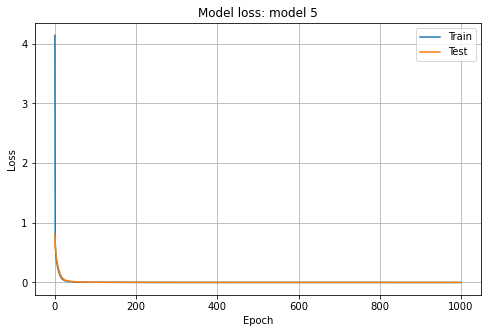

In [35]:
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000) #training set
x_valid = np.random.uniform(-1, 1, 250) # validation set
x_valid.sort()
y_target = 4 -3* x_valid -2*np.power(x_valid,2) + 3*np.power(x_valid,3) # ideal (target) polynomial function
sigma = 0.00 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a +b* x_train +c*np.power(x_train,2) +d*np.power(x_train,3), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a+b* x_valid +c*np.power(x_valid,2) +d*np.power(x_valid,3), sigma)


model5 = tf.keras.Sequential()
model5.add(Dense(units=15,input_shape=(1,)))
model5.add(Activation('relu'))
model5.add(Dense(units=15))
model5.add(Activation('relu'))
model5.add(Dense(units=1,input_shape=(1,)))
model5.add(Activation('relu'))

# compile the model & get a summary
model5.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model5.summary()
history5 = model5.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=1000,
          shuffle=True, #  shuffle input before at each epoch
          validation_data=(x_valid, y_valid))


model5.get_weights()
score = model5.evaluate(x_valid, y_valid, batch_size=100, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# look into training history
# Plot training & validation loss values
fig2,ax2=plt.subplots(figsize=(8,5))
ax2.plot(history5.history['loss'])
ax2.plot(history5.history['val_loss'])
ax2.set_title('Model loss: model 5')
ax2.set_ylabel('Loss')
plt.xlabel('Epoch')
plt.grid(True)
ax2.legend(['Train', 'Test'], loc='best')
plt.show()


16/16 [==============================] - 0s 665us/step


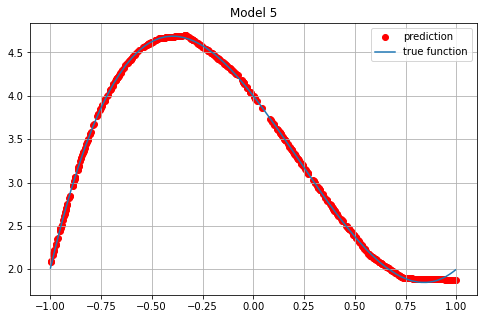

In [36]:
model5.get_weights()
x_predicted = np.random.uniform(-1,1, 500)
y_predicted = model5.predict(x_predicted)

figure = plt.subplots(figsize=(8,5))
plt.scatter(x_predicted, y_predicted,color='r', label='prediction')
plt.title('Model 5')
plt.plot(x_valid, y_target, label='true function')
plt.legend()
plt.grid(True)
plt.show()

# Summary:
By increasing the number of neurons in the first and second layers performance of the NN improves, especially if we look at the values of the training error and the validation error. By looking at the predicted function compared to the target function, we can see that by increasing the number of the neurons the global approximation gets better and smoother, though the behaviout in the last part, for $x$ $\epsilon$ $[0.75,1]$, because the function shoud be increasing, and this tendence is seen only in the third model.

# Activation function: change of the activation function for the last neuron

Since the function we are trying to is not limited, we should try function such as:
- softplus: 
  - softplus(x) = log(exp(x) + 1)
- selu: 
  - if x > 0: return scale * x
  - if x < 0: return scale * alpha * (exp(x) - 1), with $\alpha$ and $scale$ given
- PRelu:
   - alpha * x for x < 0 $\alpha = 1$
   - x for x >= 0
 
 
 To see if there are some improvements I will try this activation functions for the third and fifth model


## softplus: model 3

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
 activation_2 (Activation)   (None, 1)                 0         
                                                                 
Total params: 141
Trainable params: 141
Non-trainable pa

32/32 [==============================] - 0s 2ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 115/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 116/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 117/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0135 - val_mse: 0.0135
Epoch 118/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 119/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 120/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 121/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 237/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 238/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 239/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 240/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 241/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 242/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 243/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 359/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 360/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 361/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 362/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 363/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 364/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 365/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 481/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 482/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 483/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 484/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 485/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 486/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 487/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 603/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 604/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 605/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 606/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 607/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 608/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 609/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 725/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 726/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 727/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 728/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 729/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 730/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 731/1000
32/32 [==============================] - 0s 3ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 847/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 848/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 849/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 850/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 851/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 852/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 853/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 969/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 970/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 971/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 972/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 973/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 974/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 975/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

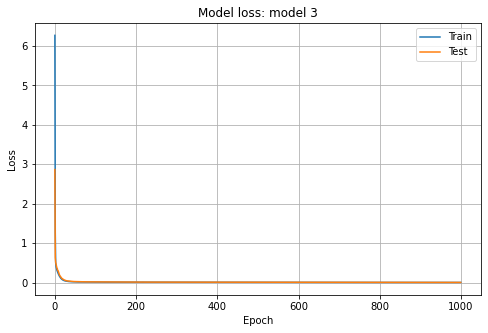

In [2]:
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000) #training set
x_valid = np.random.uniform(-1, 1, 250) # validation set
x_valid.sort()
y_target = 4 -3* x_valid -2*np.power(x_valid,2) + 3*np.power(x_valid,3) # ideal (target) polynomial function
sigma = 0.00 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a +b* x_train +c*np.power(x_train,2) +d*np.power(x_train,3), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a+b* x_valid +c*np.power(x_valid,2) +d*np.power(x_valid,3), sigma)


model3 = tf.keras.Sequential()
model3.add(Dense(units=10,input_shape=(1,)))
model3.add(Activation('relu'))
model3.add(Dense(units=10))
model3.add(Activation('relu'))
model3.add(Dense(units=1,input_shape=(1,)))
model3.add(Activation('softplus'))

# compile the model & get a summary
model3.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model3.summary()
history3 = model3.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=1000,
          shuffle=True, #  shuffle input before at each epoch
          validation_data=(x_valid, y_valid))


model3.get_weights()
score = model3.evaluate(x_valid, y_valid, batch_size=100, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# look into training history
# Plot training & validation loss values
fig2,ax2=plt.subplots(figsize=(8,5))
ax2.plot(history3.history['loss'])
ax2.plot(history3.history['val_loss'])
ax2.set_title('Model loss: model 3')
ax2.set_ylabel('Loss')
plt.xlabel('Epoch')
plt.grid(True)
ax2.legend(['Train', 'Test'], loc='best')
plt.show()

16/16 [==============================] - 0s 1ms/step


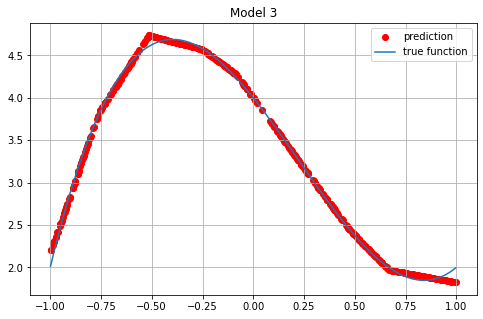

In [3]:
model3.get_weights()
x_predicted = np.random.uniform(-1,1, 500)
y_predicted = model3.predict(x_predicted)

figure = plt.subplots(figsize=(8,5))
plt.scatter(x_predicted, y_predicted,color='r', label='prediction')
plt.title('Model 3')
plt.plot(x_valid, y_target, label='true function')
plt.legend()
plt.grid(True)
plt.show()

## softplus: model 5 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 15)                30        
                                                                 
 activation_3 (Activation)   (None, 15)                0         
                                                                 
 dense_4 (Dense)             (None, 15)                240       
                                                                 
 activation_4 (Activation)   (None, 15)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 16        
                                                                 
 activation_5 (Activation)   (None, 1)                 0         
                                                                 
Total params: 286
Trainable params: 286
Non-trainable 

32/32 [==============================] - 0s 2ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 115/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 116/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 117/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 118/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 119/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 120/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 121/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 237/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 238/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 239/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 240/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 241/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 242/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 243/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 359/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 360/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 361/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 362/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 363/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 364/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 365/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 9.9946e-04 - mse: 9.9946e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 481/1000
32/32 [==============================] - 0s 2ms/step - loss: 9.9821e-04 - mse: 9.9821e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 482/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 483/1000
32/32 [==============================] - 0s 2ms/step - loss: 9.9770e-04 - mse: 9.9770e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 484/1000
32/32 [==============================] - 0s 2ms/step - loss: 9.9025e-04 - mse: 9.9025e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 485/1000
32/32 [==============================] - 0s 2ms/step - loss: 9.9021e-04 - mse: 9.9021e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 486/1000
32/32 [==============================] - 0s 2ms/step - loss: 9.8722e-04 - mse: 9.8722e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 487/1000
32/32 [=======

Epoch 538/1000
32/32 [==============================] - 0s 2ms/step - loss: 8.7988e-04 - mse: 8.7988e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 539/1000
32/32 [==============================] - 0s 2ms/step - loss: 8.7754e-04 - mse: 8.7754e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 540/1000
32/32 [==============================] - 0s 2ms/step - loss: 8.7748e-04 - mse: 8.7748e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 541/1000
32/32 [==============================] - 0s 2ms/step - loss: 8.8499e-04 - mse: 8.8499e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 542/1000
32/32 [==============================] - 0s 2ms/step - loss: 8.7650e-04 - mse: 8.7650e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 543/1000
32/32 [==============================] - 0s 2ms/step - loss: 8.7239e-04 - mse: 8.7239e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 544/1000
32/32 [==============================] - 0s 2ms/step - loss: 8.7249e-04 - mse: 8.7249e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 

Epoch 650/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.1607e-04 - mse: 7.1607e-04 - val_loss: 9.0120e-04 - val_mse: 9.0120e-04
Epoch 651/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.1267e-04 - mse: 7.1267e-04 - val_loss: 9.0490e-04 - val_mse: 9.0490e-04
Epoch 652/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.0915e-04 - mse: 7.0915e-04 - val_loss: 9.1947e-04 - val_mse: 9.1947e-04
Epoch 653/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.0803e-04 - mse: 7.0803e-04 - val_loss: 9.0908e-04 - val_mse: 9.0908e-04
Epoch 654/1000
32/32 [==============================] - 0s 3ms/step - loss: 7.1051e-04 - mse: 7.1051e-04 - val_loss: 8.8561e-04 - val_mse: 8.8561e-04
Epoch 655/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.1009e-04 - mse: 7.1009e-04 - val_loss: 8.6360e-04 - val_mse: 8.6360e-04
Epoch 656/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.0878e-04 - mse: 7.0878

Epoch 705/1000
32/32 [==============================] - 0s 2ms/step - loss: 6.4898e-04 - mse: 6.4898e-04 - val_loss: 9.2233e-04 - val_mse: 9.2233e-04
Epoch 706/1000
32/32 [==============================] - 0s 2ms/step - loss: 6.5574e-04 - mse: 6.5574e-04 - val_loss: 9.0382e-04 - val_mse: 9.0382e-04
Epoch 707/1000
32/32 [==============================] - 0s 2ms/step - loss: 6.5869e-04 - mse: 6.5869e-04 - val_loss: 8.3088e-04 - val_mse: 8.3088e-04
Epoch 708/1000
32/32 [==============================] - 0s 2ms/step - loss: 6.5483e-04 - mse: 6.5483e-04 - val_loss: 8.1935e-04 - val_mse: 8.1935e-04
Epoch 709/1000
32/32 [==============================] - 0s 2ms/step - loss: 6.5152e-04 - mse: 6.5152e-04 - val_loss: 8.4145e-04 - val_mse: 8.4145e-04
Epoch 710/1000
32/32 [==============================] - 0s 2ms/step - loss: 6.4606e-04 - mse: 6.4606e-04 - val_loss: 8.3579e-04 - val_mse: 8.3579e-04
Epoch 711/1000
32/32 [==============================] - 0s 2ms/step - loss: 6.4565e-04 - mse: 6.4565

Epoch 814/1000
32/32 [==============================] - 0s 2ms/step - loss: 5.6140e-04 - mse: 5.6140e-04 - val_loss: 7.0419e-04 - val_mse: 7.0419e-04
Epoch 815/1000
32/32 [==============================] - 0s 2ms/step - loss: 5.5902e-04 - mse: 5.5902e-04 - val_loss: 7.0427e-04 - val_mse: 7.0427e-04
Epoch 816/1000
32/32 [==============================] - 0s 2ms/step - loss: 5.5994e-04 - mse: 5.5994e-04 - val_loss: 7.2253e-04 - val_mse: 7.2253e-04
Epoch 817/1000
32/32 [==============================] - 0s 2ms/step - loss: 5.5864e-04 - mse: 5.5864e-04 - val_loss: 7.1752e-04 - val_mse: 7.1752e-04
Epoch 818/1000
32/32 [==============================] - 0s 2ms/step - loss: 5.5462e-04 - mse: 5.5462e-04 - val_loss: 7.1120e-04 - val_mse: 7.1120e-04
Epoch 819/1000
32/32 [==============================] - 0s 2ms/step - loss: 5.5489e-04 - mse: 5.5489e-04 - val_loss: 7.1498e-04 - val_mse: 7.1498e-04
Epoch 820/1000
32/32 [==============================] - 0s 2ms/step - loss: 5.5576e-04 - mse: 5.5576

Epoch 923/1000
32/32 [==============================] - 0s 2ms/step - loss: 4.9141e-04 - mse: 4.9141e-04 - val_loss: 6.3790e-04 - val_mse: 6.3790e-04
Epoch 924/1000
32/32 [==============================] - 0s 2ms/step - loss: 4.9094e-04 - mse: 4.9094e-04 - val_loss: 6.2968e-04 - val_mse: 6.2968e-04
Epoch 925/1000
32/32 [==============================] - 0s 2ms/step - loss: 4.9167e-04 - mse: 4.9167e-04 - val_loss: 6.2661e-04 - val_mse: 6.2661e-04
Epoch 926/1000
32/32 [==============================] - 0s 2ms/step - loss: 4.8886e-04 - mse: 4.8886e-04 - val_loss: 6.2419e-04 - val_mse: 6.2419e-04
Epoch 927/1000
32/32 [==============================] - 0s 2ms/step - loss: 4.8816e-04 - mse: 4.8816e-04 - val_loss: 6.0726e-04 - val_mse: 6.0726e-04
Epoch 928/1000
32/32 [==============================] - 0s 2ms/step - loss: 4.8550e-04 - mse: 4.8550e-04 - val_loss: 6.2253e-04 - val_mse: 6.2253e-04
Epoch 929/1000
32/32 [==============================] - 0s 2ms/step - loss: 4.8878e-04 - mse: 4.8878

Epoch 978/1000
32/32 [==============================] - 0s 2ms/step - loss: 4.6189e-04 - mse: 4.6189e-04 - val_loss: 5.9132e-04 - val_mse: 5.9132e-04
Epoch 979/1000
32/32 [==============================] - 0s 2ms/step - loss: 4.6239e-04 - mse: 4.6239e-04 - val_loss: 6.0278e-04 - val_mse: 6.0278e-04
Epoch 980/1000
32/32 [==============================] - 0s 2ms/step - loss: 4.6401e-04 - mse: 4.6401e-04 - val_loss: 5.9218e-04 - val_mse: 5.9218e-04
Epoch 981/1000
32/32 [==============================] - 0s 2ms/step - loss: 4.6289e-04 - mse: 4.6289e-04 - val_loss: 5.8542e-04 - val_mse: 5.8542e-04
Epoch 982/1000
32/32 [==============================] - 0s 2ms/step - loss: 4.6134e-04 - mse: 4.6134e-04 - val_loss: 5.8949e-04 - val_mse: 5.8949e-04
Epoch 983/1000
32/32 [==============================] - 0s 2ms/step - loss: 4.6203e-04 - mse: 4.6203e-04 - val_loss: 5.9297e-04 - val_mse: 5.9297e-04
Epoch 984/1000
32/32 [==============================] - 0s 2ms/step - loss: 4.5903e-04 - mse: 4.5903

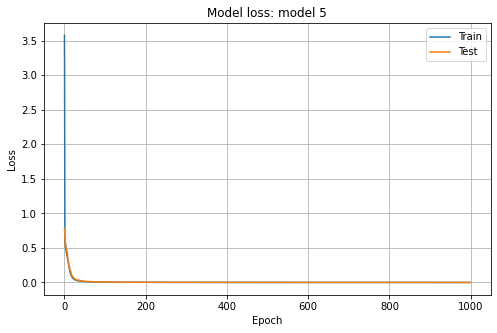

In [4]:
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000) #training set
x_valid = np.random.uniform(-1, 1, 250) # validation set
x_valid.sort()
y_target = 4 -3* x_valid -2*np.power(x_valid,2) + 3*np.power(x_valid,3) # ideal (target) polynomial function
sigma = 0.00 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a +b* x_train +c*np.power(x_train,2) +d*np.power(x_train,3), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a+b* x_valid +c*np.power(x_valid,2) +d*np.power(x_valid,3), sigma)


model5 = tf.keras.Sequential()
model5.add(Dense(units=15,input_shape=(1,)))
model5.add(Activation('relu'))
model5.add(Dense(units=15))
model5.add(Activation('relu'))
model5.add(Dense(units=1,input_shape=(1,)))
model5.add(Activation('softplus'))

# compile the model & get a summary
model5.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model5.summary()
history5 = model5.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=1000,
          shuffle=True, #  shuffle input before at each epoch
          validation_data=(x_valid, y_valid))


model5.get_weights()
score = model5.evaluate(x_valid, y_valid, batch_size=100, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# look into training history
# Plot training & validation loss values
fig2,ax2=plt.subplots(figsize=(8,5))
ax2.plot(history5.history['loss'])
ax2.plot(history5.history['val_loss'])
ax2.set_title('Model loss: model 5')
ax2.set_ylabel('Loss')
plt.xlabel('Epoch')
plt.grid(True)
ax2.legend(['Train', 'Test'], loc='best')
plt.show()


16/16 [==============================] - 0s 809us/step


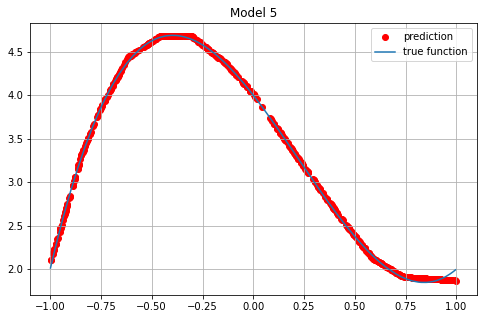

In [5]:
model5.get_weights()
x_predicted = np.random.uniform(-1,1, 500)
y_predicted = model5.predict(x_predicted)

figure = plt.subplots(figsize=(8,5))
plt.scatter(x_predicted, y_predicted,color='r', label='prediction')
plt.title('Model 5')
plt.plot(x_valid, y_target, label='true function')
plt.legend()
plt.grid(True)
plt.show()

## PReLU: model 3

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 activation_6 (Activation)   (None, 10)                0         
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 activation_7 (Activation)   (None, 10)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
 activation_8 (Activation)   (None, 1)                 1         
                                                                 
Total params: 142
Trainable params: 142
Non-trainable 

32/32 [==============================] - 0s 2ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 115/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 116/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 117/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 118/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 119/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 120/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 121/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 237/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 238/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 239/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 240/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 241/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 242/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 243/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 7.3093e-04 - mse: 7.3093e-04 - val_loss: 8.3619e-04 - val_mse: 8.3619e-04
Epoch 350/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.1792e-04 - mse: 7.1792e-04 - val_loss: 7.9211e-04 - val_mse: 7.9211e-04
Epoch 351/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.0051e-04 - mse: 7.0051e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 352/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.2210e-04 - mse: 7.2210e-04 - val_loss: 9.6128e-04 - val_mse: 9.6128e-04
Epoch 353/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.1989e-04 - mse: 7.1989e-04 - val_loss: 8.5564e-04 - val_mse: 8.5564e-04
Epoch 354/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.0975e-04 - mse: 7.0975e-04 - val_loss: 8.5786e-04 - val_mse: 8.5786e-04
Epoch 355/1000
32/32 [==============================] - 0s 2ms/step - loss: 6.9486e-04 - mse: 6.9486e-04 - val_loss: 8.7805

Epoch 404/1000
32/32 [==============================] - 0s 2ms/step - loss: 6.2209e-04 - mse: 6.2209e-04 - val_loss: 7.6412e-04 - val_mse: 7.6412e-04
Epoch 405/1000
32/32 [==============================] - 0s 2ms/step - loss: 6.2192e-04 - mse: 6.2192e-04 - val_loss: 6.9750e-04 - val_mse: 6.9750e-04
Epoch 406/1000
32/32 [==============================] - 0s 2ms/step - loss: 6.1635e-04 - mse: 6.1635e-04 - val_loss: 7.6039e-04 - val_mse: 7.6039e-04
Epoch 407/1000
32/32 [==============================] - 0s 2ms/step - loss: 6.1786e-04 - mse: 6.1786e-04 - val_loss: 6.9404e-04 - val_mse: 6.9404e-04
Epoch 408/1000
32/32 [==============================] - 0s 2ms/step - loss: 5.9958e-04 - mse: 5.9958e-04 - val_loss: 7.1479e-04 - val_mse: 7.1479e-04
Epoch 409/1000
32/32 [==============================] - 0s 2ms/step - loss: 6.1524e-04 - mse: 6.1524e-04 - val_loss: 7.6947e-04 - val_mse: 7.6947e-04
Epoch 410/1000
32/32 [==============================] - 0s 2ms/step - loss: 6.0425e-04 - mse: 6.0425

Epoch 459/1000
32/32 [==============================] - 0s 2ms/step - loss: 5.4059e-04 - mse: 5.4059e-04 - val_loss: 5.8409e-04 - val_mse: 5.8409e-04
Epoch 460/1000
32/32 [==============================] - 0s 2ms/step - loss: 5.5018e-04 - mse: 5.5018e-04 - val_loss: 6.2917e-04 - val_mse: 6.2917e-04
Epoch 461/1000
32/32 [==============================] - 0s 2ms/step - loss: 5.3503e-04 - mse: 5.3503e-04 - val_loss: 6.0568e-04 - val_mse: 6.0568e-04
Epoch 462/1000
32/32 [==============================] - 0s 2ms/step - loss: 5.3528e-04 - mse: 5.3528e-04 - val_loss: 6.3780e-04 - val_mse: 6.3780e-04
Epoch 463/1000
32/32 [==============================] - 0s 2ms/step - loss: 5.3621e-04 - mse: 5.3621e-04 - val_loss: 7.4228e-04 - val_mse: 7.4228e-04
Epoch 464/1000
32/32 [==============================] - 0s 2ms/step - loss: 5.3412e-04 - mse: 5.3412e-04 - val_loss: 7.3860e-04 - val_mse: 7.3860e-04
Epoch 465/1000
32/32 [==============================] - 0s 2ms/step - loss: 5.3293e-04 - mse: 5.3293

Epoch 568/1000
32/32 [==============================] - 0s 2ms/step - loss: 4.3848e-04 - mse: 4.3848e-04 - val_loss: 4.8563e-04 - val_mse: 4.8563e-04
Epoch 569/1000
32/32 [==============================] - 0s 2ms/step - loss: 4.3486e-04 - mse: 4.3486e-04 - val_loss: 5.1233e-04 - val_mse: 5.1233e-04
Epoch 570/1000
32/32 [==============================] - 0s 2ms/step - loss: 4.4954e-04 - mse: 4.4954e-04 - val_loss: 4.7274e-04 - val_mse: 4.7274e-04
Epoch 571/1000
32/32 [==============================] - 0s 2ms/step - loss: 4.3364e-04 - mse: 4.3364e-04 - val_loss: 4.6688e-04 - val_mse: 4.6688e-04
Epoch 572/1000
32/32 [==============================] - 0s 2ms/step - loss: 4.3840e-04 - mse: 4.3840e-04 - val_loss: 4.6750e-04 - val_mse: 4.6750e-04
Epoch 573/1000
32/32 [==============================] - 0s 2ms/step - loss: 4.3546e-04 - mse: 4.3546e-04 - val_loss: 4.6907e-04 - val_mse: 4.6907e-04
Epoch 574/1000
32/32 [==============================] - 0s 2ms/step - loss: 4.4436e-04 - mse: 4.4436

Epoch 677/1000
32/32 [==============================] - 0s 2ms/step - loss: 3.8508e-04 - mse: 3.8508e-04 - val_loss: 4.0360e-04 - val_mse: 4.0360e-04
Epoch 678/1000
32/32 [==============================] - 0s 2ms/step - loss: 3.7495e-04 - mse: 3.7495e-04 - val_loss: 3.9191e-04 - val_mse: 3.9191e-04
Epoch 679/1000
32/32 [==============================] - 0s 2ms/step - loss: 3.8262e-04 - mse: 3.8262e-04 - val_loss: 5.3197e-04 - val_mse: 5.3197e-04
Epoch 680/1000
32/32 [==============================] - 0s 2ms/step - loss: 3.8397e-04 - mse: 3.8397e-04 - val_loss: 4.0570e-04 - val_mse: 4.0570e-04
Epoch 681/1000
32/32 [==============================] - 0s 2ms/step - loss: 3.6808e-04 - mse: 3.6808e-04 - val_loss: 5.4043e-04 - val_mse: 5.4043e-04
Epoch 682/1000
32/32 [==============================] - 0s 2ms/step - loss: 3.7906e-04 - mse: 3.7906e-04 - val_loss: 7.5536e-04 - val_mse: 7.5536e-04
Epoch 683/1000
32/32 [==============================] - 0s 2ms/step - loss: 3.8338e-04 - mse: 3.8338

Epoch 786/1000
32/32 [==============================] - 0s 2ms/step - loss: 3.2538e-04 - mse: 3.2538e-04 - val_loss: 3.7692e-04 - val_mse: 3.7692e-04
Epoch 787/1000
32/32 [==============================] - 0s 2ms/step - loss: 3.2159e-04 - mse: 3.2159e-04 - val_loss: 4.3439e-04 - val_mse: 4.3439e-04
Epoch 788/1000
32/32 [==============================] - 0s 2ms/step - loss: 3.3907e-04 - mse: 3.3907e-04 - val_loss: 4.8680e-04 - val_mse: 4.8680e-04
Epoch 789/1000
32/32 [==============================] - 0s 2ms/step - loss: 3.3586e-04 - mse: 3.3586e-04 - val_loss: 3.4076e-04 - val_mse: 3.4076e-04
Epoch 790/1000
32/32 [==============================] - 0s 2ms/step - loss: 3.2679e-04 - mse: 3.2679e-04 - val_loss: 3.9996e-04 - val_mse: 3.9996e-04
Epoch 791/1000
32/32 [==============================] - 0s 2ms/step - loss: 3.3655e-04 - mse: 3.3655e-04 - val_loss: 3.7640e-04 - val_mse: 3.7640e-04
Epoch 792/1000
32/32 [==============================] - 0s 2ms/step - loss: 3.3060e-04 - mse: 3.3060

Epoch 895/1000
32/32 [==============================] - 0s 2ms/step - loss: 2.9950e-04 - mse: 2.9950e-04 - val_loss: 3.0889e-04 - val_mse: 3.0889e-04
Epoch 896/1000
32/32 [==============================] - 0s 2ms/step - loss: 2.9344e-04 - mse: 2.9344e-04 - val_loss: 3.0946e-04 - val_mse: 3.0946e-04
Epoch 897/1000
32/32 [==============================] - 0s 2ms/step - loss: 2.9449e-04 - mse: 2.9449e-04 - val_loss: 3.2618e-04 - val_mse: 3.2618e-04
Epoch 898/1000
32/32 [==============================] - 0s 2ms/step - loss: 2.9728e-04 - mse: 2.9728e-04 - val_loss: 5.2680e-04 - val_mse: 5.2680e-04
Epoch 899/1000
32/32 [==============================] - 0s 2ms/step - loss: 3.1076e-04 - mse: 3.1076e-04 - val_loss: 3.1850e-04 - val_mse: 3.1850e-04
Epoch 900/1000
32/32 [==============================] - 0s 2ms/step - loss: 2.8940e-04 - mse: 2.8940e-04 - val_loss: 6.8937e-04 - val_mse: 6.8937e-04
Epoch 901/1000
32/32 [==============================] - 0s 2ms/step - loss: 3.1036e-04 - mse: 3.1036

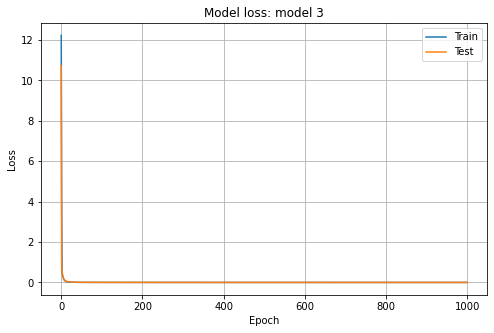

In [6]:
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000) #training set
x_valid = np.random.uniform(-1, 1, 250) # validation set
x_valid.sort()
y_target = 4 -3* x_valid -2*np.power(x_valid,2) + 3*np.power(x_valid,3) # ideal (target) polynomial function
sigma = 0.00 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a +b* x_train +c*np.power(x_train,2) +d*np.power(x_train,3), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a+b* x_valid +c*np.power(x_valid,2) +d*np.power(x_valid,3), sigma)


model3 = tf.keras.Sequential()
model3.add(Dense(units=10,input_shape=(1,)))
model3.add(Activation('relu'))
model3.add(Dense(units=10))
model3.add(Activation('relu'))
model3.add(Dense(units=1,input_shape=(1,)))
model3.add(Activation('PReLU'))

# compile the model & get a summary
model3.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model3.summary()
history3 = model3.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=1000,
          shuffle=True, #  shuffle input before at each epoch
          validation_data=(x_valid, y_valid))


model3.get_weights()
score = model3.evaluate(x_valid, y_valid, batch_size=100, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# look into training history
# Plot training & validation loss values
fig2,ax2=plt.subplots(figsize=(8,5))
ax2.plot(history3.history['loss'])
ax2.plot(history3.history['val_loss'])
ax2.set_title('Model loss: model 3')
ax2.set_ylabel('Loss')
plt.xlabel('Epoch')
plt.grid(True)
ax2.legend(['Train', 'Test'], loc='best')
plt.show()

16/16 [==============================] - 0s 2ms/step


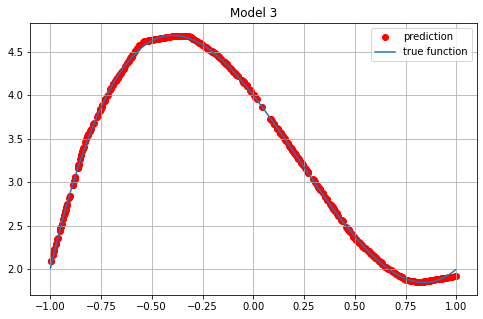

In [7]:
model3.get_weights()
x_predicted = np.random.uniform(-1,1, 500)
y_predicted = model3.predict(x_predicted)

figure = plt.subplots(figsize=(8,5))
plt.scatter(x_predicted, y_predicted,color='r', label='prediction')
plt.title('Model 3')
plt.plot(x_valid, y_target, label='true function')
plt.legend()
plt.grid(True)
plt.show()

## PRelu: model 5

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 15)                30        
                                                                 
 activation_9 (Activation)   (None, 15)                0         
                                                                 
 dense_10 (Dense)            (None, 15)                240       
                                                                 
 activation_10 (Activation)  (None, 15)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 16        
                                                                 
 activation_11 (Activation)  (None, 1)                 1         
                                                                 
Total params: 287
Trainable params: 287
Non-trainable 

32/32 [==============================] - 0s 2ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 115/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 116/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 117/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 118/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 119/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 120/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 121/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 237/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 238/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 239/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 240/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 241/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 242/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 243/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 359/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 360/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 361/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 362/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 363/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 364/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 365/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 481/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 482/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 483/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 484/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 485/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 486/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 487/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 603/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 604/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 605/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 606/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 607/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 608/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 609/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 725/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 726/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 727/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 728/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 729/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 730/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 731/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 9.9209e-04 - mse: 9.9209e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 786/1000
32/32 [==============================] - 0s 2ms/step - loss: 9.7735e-04 - mse: 9.7735e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 787/1000
32/32 [==============================] - 0s 2ms/step - loss: 9.9262e-04 - mse: 9.9262e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 788/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 789/1000
32/32 [==============================] - 0s 2ms/step - loss: 9.8977e-04 - mse: 9.8977e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 790/1000
32/32 [==============================] - 0s 2ms/step - loss: 9.6850e-04 - mse: 9.6850e-04 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 791/1000
32/32 [==============================] - 0s 2ms/step - loss: 9.9465e-04 - mse: 9.9465e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 792/1000
32/32 [=======

Epoch 843/1000
32/32 [==============================] - 0s 2ms/step - loss: 9.3171e-04 - mse: 9.3171e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 844/1000
32/32 [==============================] - 0s 2ms/step - loss: 9.2823e-04 - mse: 9.2823e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 845/1000
32/32 [==============================] - 0s 2ms/step - loss: 9.5654e-04 - mse: 9.5654e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 846/1000
32/32 [==============================] - 0s 2ms/step - loss: 9.2652e-04 - mse: 9.2652e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 847/1000
32/32 [==============================] - 0s 2ms/step - loss: 9.4166e-04 - mse: 9.4166e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 848/1000
32/32 [==============================] - 0s 2ms/step - loss: 9.2739e-04 - mse: 9.2739e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 849/1000
32/32 [==============================] - 0s 2ms/step - loss: 9.1910e-04 - mse: 9.1910e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 

Epoch 901/1000
32/32 [==============================] - 0s 2ms/step - loss: 9.1603e-04 - mse: 9.1603e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 902/1000
32/32 [==============================] - 0s 2ms/step - loss: 8.8490e-04 - mse: 8.8490e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 903/1000
32/32 [==============================] - 0s 2ms/step - loss: 8.7704e-04 - mse: 8.7704e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 904/1000
32/32 [==============================] - 0s 2ms/step - loss: 8.7284e-04 - mse: 8.7284e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 905/1000
32/32 [==============================] - 0s 2ms/step - loss: 8.7855e-04 - mse: 8.7855e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 906/1000
32/32 [==============================] - 0s 2ms/step - loss: 8.6380e-04 - mse: 8.6380e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 907/1000
32/32 [==============================] - 0s 2ms/step - loss: 8.7388e-04 - mse: 8.7388e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 

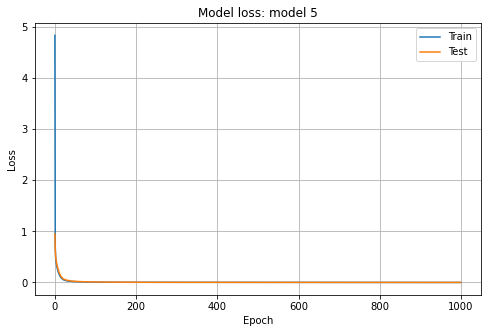

In [8]:
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000) #training set
x_valid = np.random.uniform(-1, 1, 250) # validation set
x_valid.sort()
y_target = 4 -3* x_valid -2*np.power(x_valid,2) + 3*np.power(x_valid,3) # ideal (target) polynomial function
sigma = 0.00 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a +b* x_train +c*np.power(x_train,2) +d*np.power(x_train,3), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a+b* x_valid +c*np.power(x_valid,2) +d*np.power(x_valid,3), sigma)


model5 = tf.keras.Sequential()
model5.add(Dense(units=15,input_shape=(1,)))
model5.add(Activation('relu'))
model5.add(Dense(units=15))
model5.add(Activation('relu'))
model5.add(Dense(units=1,input_shape=(1,)))
model5.add(Activation('PReLU'))

# compile the model & get a summary
model5.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model5.summary()
history5 = model5.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=1000,
          shuffle=True, #  shuffle input before at each epoch
          validation_data=(x_valid, y_valid))


model5.get_weights()
score = model5.evaluate(x_valid, y_valid, batch_size=100, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# look into training history
# Plot training & validation loss values
fig2,ax2=plt.subplots(figsize=(8,5))
ax2.plot(history5.history['loss'])
ax2.plot(history5.history['val_loss'])
ax2.set_title('Model loss: model 5')
ax2.set_ylabel('Loss')
plt.xlabel('Epoch')
plt.grid(True)
ax2.legend(['Train', 'Test'], loc='best')
plt.show()


16/16 [==============================] - 0s 1ms/step


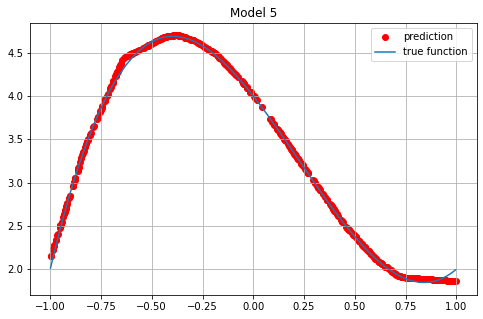

In [9]:
model5.get_weights()
x_predicted = np.random.uniform(-1,1, 500)
y_predicted = model5.predict(x_predicted)

figure = plt.subplots(figsize=(8,5))
plt.scatter(x_predicted, y_predicted,color='r', label='prediction')
plt.title('Model 5')
plt.plot(x_valid, y_target, label='true function')
plt.legend()
plt.grid(True)
plt.show()

## selu: model 3

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                20        
                                                                 
 activation_12 (Activation)  (None, 10)                0         
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
 activation_13 (Activation)  (None, 10)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
 activation_14 (Activation)  (None, 1)                 0         
                                                                 
Total params: 141
Trainable params: 141
Non-trainable 

32/32 [==============================] - 0s 2ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 115/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 116/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 117/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 118/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 119/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 120/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 121/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 237/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 238/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 239/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 240/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 241/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 242/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 243/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 359/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 360/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 361/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 362/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 363/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 364/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 365/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

Epoch 476/1000
32/32 [==============================] - 0s 2ms/step - loss: 8.9407e-04 - mse: 8.9407e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 477/1000
32/32 [==============================] - 0s 2ms/step - loss: 8.9733e-04 - mse: 8.9733e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 478/1000
32/32 [==============================] - 0s 2ms/step - loss: 8.9748e-04 - mse: 8.9748e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 479/1000
32/32 [==============================] - 0s 2ms/step - loss: 9.0445e-04 - mse: 9.0445e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 480/1000
32/32 [==============================] - 0s 2ms/step - loss: 8.9420e-04 - mse: 8.9420e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 481/1000
32/32 [==============================] - 0s 2ms/step - loss: 9.0095e-04 - mse: 9.0095e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 482/1000
32/32 [==============================] - 0s 2ms/step - loss: 8.9487e-04 - mse: 8.9487e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 

32/32 [==============================] - 0s 2ms/step - loss: 7.8131e-04 - mse: 7.8131e-04 - val_loss: 9.5038e-04 - val_mse: 9.5038e-04
Epoch 589/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.7988e-04 - mse: 7.7988e-04 - val_loss: 9.5369e-04 - val_mse: 9.5369e-04
Epoch 590/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.7585e-04 - mse: 7.7585e-04 - val_loss: 9.0219e-04 - val_mse: 9.0219e-04
Epoch 591/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.7390e-04 - mse: 7.7390e-04 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 592/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.8178e-04 - mse: 7.8178e-04 - val_loss: 9.8137e-04 - val_mse: 9.8137e-04
Epoch 593/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.8110e-04 - mse: 7.8110e-04 - val_loss: 9.0297e-04 - val_mse: 9.0297e-04
Epoch 594/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.7762e-04 - mse: 7.7762e-04 - val_loss: 9.7414

Epoch 643/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.3448e-04 - mse: 7.3448e-04 - val_loss: 9.1006e-04 - val_mse: 9.1006e-04
Epoch 644/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.2944e-04 - mse: 7.2944e-04 - val_loss: 8.6764e-04 - val_mse: 8.6764e-04
Epoch 645/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.3280e-04 - mse: 7.3280e-04 - val_loss: 8.7550e-04 - val_mse: 8.7550e-04
Epoch 646/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.3061e-04 - mse: 7.3061e-04 - val_loss: 8.8460e-04 - val_mse: 8.8460e-04
Epoch 647/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.2948e-04 - mse: 7.2948e-04 - val_loss: 8.6214e-04 - val_mse: 8.6214e-04
Epoch 648/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.3100e-04 - mse: 7.3100e-04 - val_loss: 9.1692e-04 - val_mse: 9.1692e-04
Epoch 649/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.3486e-04 - mse: 7.3486

Epoch 752/1000
32/32 [==============================] - 0s 2ms/step - loss: 6.6287e-04 - mse: 6.6287e-04 - val_loss: 7.9578e-04 - val_mse: 7.9578e-04
Epoch 753/1000
32/32 [==============================] - 0s 2ms/step - loss: 6.5709e-04 - mse: 6.5709e-04 - val_loss: 7.9134e-04 - val_mse: 7.9134e-04
Epoch 754/1000
32/32 [==============================] - 0s 2ms/step - loss: 6.6301e-04 - mse: 6.6301e-04 - val_loss: 7.8410e-04 - val_mse: 7.8410e-04
Epoch 755/1000
32/32 [==============================] - 0s 2ms/step - loss: 6.5751e-04 - mse: 6.5751e-04 - val_loss: 7.9537e-04 - val_mse: 7.9537e-04
Epoch 756/1000
32/32 [==============================] - 0s 2ms/step - loss: 6.5095e-04 - mse: 6.5095e-04 - val_loss: 7.6196e-04 - val_mse: 7.6196e-04
Epoch 757/1000
32/32 [==============================] - 0s 2ms/step - loss: 6.6058e-04 - mse: 6.6058e-04 - val_loss: 8.0704e-04 - val_mse: 8.0704e-04
Epoch 758/1000
32/32 [==============================] - 0s 2ms/step - loss: 6.5184e-04 - mse: 6.5184

Epoch 861/1000
32/32 [==============================] - 0s 2ms/step - loss: 6.0295e-04 - mse: 6.0295e-04 - val_loss: 8.6896e-04 - val_mse: 8.6896e-04
Epoch 862/1000
32/32 [==============================] - 0s 2ms/step - loss: 6.0891e-04 - mse: 6.0891e-04 - val_loss: 7.1179e-04 - val_mse: 7.1179e-04
Epoch 863/1000
32/32 [==============================] - 0s 2ms/step - loss: 6.0180e-04 - mse: 6.0180e-04 - val_loss: 6.9682e-04 - val_mse: 6.9682e-04
Epoch 864/1000
32/32 [==============================] - 0s 2ms/step - loss: 6.0019e-04 - mse: 6.0019e-04 - val_loss: 7.5555e-04 - val_mse: 7.5555e-04
Epoch 865/1000
32/32 [==============================] - 0s 2ms/step - loss: 6.0129e-04 - mse: 6.0129e-04 - val_loss: 7.1445e-04 - val_mse: 7.1445e-04
Epoch 866/1000
32/32 [==============================] - 0s 2ms/step - loss: 5.9952e-04 - mse: 5.9952e-04 - val_loss: 7.6515e-04 - val_mse: 7.6515e-04
Epoch 867/1000
32/32 [==============================] - 0s 2ms/step - loss: 6.0131e-04 - mse: 6.0131

Epoch 916/1000
32/32 [==============================] - 0s 2ms/step - loss: 5.8040e-04 - mse: 5.8040e-04 - val_loss: 7.0730e-04 - val_mse: 7.0730e-04
Epoch 917/1000
32/32 [==============================] - 0s 2ms/step - loss: 5.7512e-04 - mse: 5.7512e-04 - val_loss: 6.8802e-04 - val_mse: 6.8802e-04
Epoch 918/1000
32/32 [==============================] - 0s 2ms/step - loss: 5.7657e-04 - mse: 5.7657e-04 - val_loss: 7.0768e-04 - val_mse: 7.0768e-04
Epoch 919/1000
32/32 [==============================] - 0s 2ms/step - loss: 5.7673e-04 - mse: 5.7673e-04 - val_loss: 6.7851e-04 - val_mse: 6.7851e-04
Epoch 920/1000
32/32 [==============================] - 0s 2ms/step - loss: 5.7388e-04 - mse: 5.7388e-04 - val_loss: 6.7516e-04 - val_mse: 6.7516e-04
Epoch 921/1000
32/32 [==============================] - 0s 2ms/step - loss: 5.7138e-04 - mse: 5.7138e-04 - val_loss: 6.8901e-04 - val_mse: 6.8901e-04
Epoch 922/1000
32/32 [==============================] - 0s 2ms/step - loss: 5.7319e-04 - mse: 5.7319

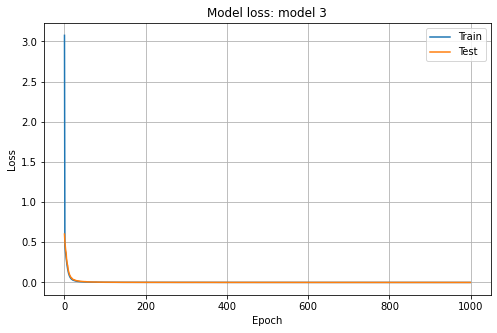

In [10]:
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000) #training set
x_valid = np.random.uniform(-1, 1, 250) # validation set
x_valid.sort()
y_target = 4 -3* x_valid -2*np.power(x_valid,2) + 3*np.power(x_valid,3) # ideal (target) polynomial function
sigma = 0.00 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a +b* x_train +c*np.power(x_train,2) +d*np.power(x_train,3), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a+b* x_valid +c*np.power(x_valid,2) +d*np.power(x_valid,3), sigma)


model3 = tf.keras.Sequential()
model3.add(Dense(units=10,input_shape=(1,)))
model3.add(Activation('relu'))
model3.add(Dense(units=10))
model3.add(Activation('relu'))
model3.add(Dense(units=1,input_shape=(1,)))
model3.add(Activation('selu'))

# compile the model & get a summary
model3.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model3.summary()
history3 = model3.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=1000,
          shuffle=True, #  shuffle input before at each epoch
          validation_data=(x_valid, y_valid))


model3.get_weights()
score = model3.evaluate(x_valid, y_valid, batch_size=100, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# look into training history
# Plot training & validation loss values
fig2,ax2=plt.subplots(figsize=(8,5))
ax2.plot(history3.history['loss'])
ax2.plot(history3.history['val_loss'])
ax2.set_title('Model loss: model 3')
ax2.set_ylabel('Loss')
plt.xlabel('Epoch')
plt.grid(True)
ax2.legend(['Train', 'Test'], loc='best')
plt.show()

16/16 [==============================] - 0s 925us/step


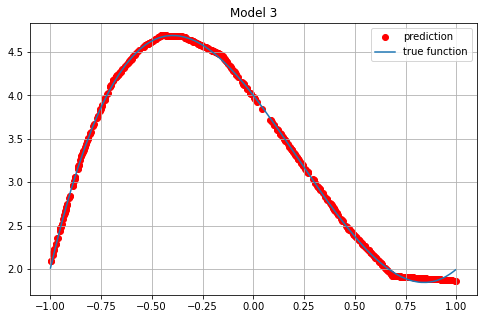

In [11]:
model3.get_weights()
x_predicted = np.random.uniform(-1,1, 500)
y_predicted = model3.predict(x_predicted)

figure = plt.subplots(figsize=(8,5))
plt.scatter(x_predicted, y_predicted,color='r', label='prediction')
plt.title('Model 3')
plt.plot(x_valid, y_target, label='true function')
plt.legend()
plt.grid(True)
plt.show()

## selu: model 5

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 15)                30        
                                                                 
 activation_15 (Activation)  (None, 15)                0         
                                                                 
 dense_16 (Dense)            (None, 15)                240       
                                                                 
 activation_16 (Activation)  (None, 15)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 16        
                                                                 
 activation_17 (Activation)  (None, 1)                 0         
                                                                 
Total params: 286
Trainable params: 286
Non-trainable 

32/32 [==============================] - 0s 2ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 115/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 116/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 117/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 118/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 119/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 120/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 121/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 237/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 238/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 239/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 240/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 241/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 242/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 243/1000
32/32 [==============================] - 0s 3ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 359/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 360/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 361/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 362/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 363/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 364/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 365/1000
32/32 [==============================] - 0s 3ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 481/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 482/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 483/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 484/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 485/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 486/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 487/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

Epoch 600/1000
32/32 [==============================] - 0s 2ms/step - loss: 9.6050e-04 - mse: 9.6050e-04 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 601/1000
32/32 [==============================] - 0s 2ms/step - loss: 9.6176e-04 - mse: 9.6176e-04 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 602/1000
32/32 [==============================] - 0s 2ms/step - loss: 9.6781e-04 - mse: 9.6781e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 603/1000
32/32 [==============================] - 0s 2ms/step - loss: 9.5936e-04 - mse: 9.5936e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 604/1000
32/32 [==============================] - 0s 2ms/step - loss: 9.6234e-04 - mse: 9.6234e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 605/1000
32/32 [==============================] - 0s 2ms/step - loss: 9.6426e-04 - mse: 9.6426e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 606/1000
32/32 [==============================] - 0s 2ms/step - loss: 9.4243e-04 - mse: 9.4243e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 

Epoch 658/1000
32/32 [==============================] - 0s 2ms/step - loss: 9.0842e-04 - mse: 9.0842e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 659/1000
32/32 [==============================] - 0s 2ms/step - loss: 9.1760e-04 - mse: 9.1760e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 660/1000
32/32 [==============================] - 0s 2ms/step - loss: 9.2108e-04 - mse: 9.2108e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 661/1000
32/32 [==============================] - 0s 2ms/step - loss: 9.0268e-04 - mse: 9.0268e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 662/1000
32/32 [==============================] - 0s 2ms/step - loss: 9.1282e-04 - mse: 9.1282e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 663/1000
32/32 [==============================] - 0s 2ms/step - loss: 9.1831e-04 - mse: 9.1831e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 664/1000
32/32 [==============================] - 0s 2ms/step - loss: 8.9958e-04 - mse: 8.9958e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 

Epoch 716/1000
32/32 [==============================] - 0s 2ms/step - loss: 8.9354e-04 - mse: 8.9354e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 717/1000
32/32 [==============================] - 0s 2ms/step - loss: 8.8820e-04 - mse: 8.8820e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 718/1000
32/32 [==============================] - 0s 2ms/step - loss: 8.7072e-04 - mse: 8.7072e-04 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 719/1000
32/32 [==============================] - 0s 2ms/step - loss: 8.7350e-04 - mse: 8.7350e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 720/1000
32/32 [==============================] - 0s 2ms/step - loss: 8.7342e-04 - mse: 8.7342e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 721/1000
32/32 [==============================] - 0s 2ms/step - loss: 8.7813e-04 - mse: 8.7813e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 722/1000
32/32 [==============================] - 0s 2ms/step - loss: 8.7290e-04 - mse: 8.7290e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 

32/32 [==============================] - 0s 2ms/step - loss: 8.2129e-04 - mse: 8.2129e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 831/1000
32/32 [==============================] - 0s 2ms/step - loss: 8.2041e-04 - mse: 8.2041e-04 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 832/1000
32/32 [==============================] - 0s 2ms/step - loss: 8.2439e-04 - mse: 8.2439e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 833/1000
32/32 [==============================] - 0s 2ms/step - loss: 8.1899e-04 - mse: 8.1899e-04 - val_loss: 9.8282e-04 - val_mse: 9.8282e-04
Epoch 834/1000
32/32 [==============================] - 0s 2ms/step - loss: 8.1863e-04 - mse: 8.1863e-04 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 835/1000
32/32 [==============================] - 0s 2ms/step - loss: 8.2499e-04 - mse: 8.2499e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 836/1000
32/32 [==============================] - 0s 2ms/step - loss: 8.1970e-04 - mse: 8.1970e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 837/100

Epoch 887/1000
32/32 [==============================] - 0s 2ms/step - loss: 8.0114e-04 - mse: 8.0114e-04 - val_loss: 9.5564e-04 - val_mse: 9.5564e-04
Epoch 888/1000
32/32 [==============================] - 0s 2ms/step - loss: 8.0488e-04 - mse: 8.0488e-04 - val_loss: 9.8996e-04 - val_mse: 9.8996e-04
Epoch 889/1000
32/32 [==============================] - 0s 2ms/step - loss: 8.1586e-04 - mse: 8.1586e-04 - val_loss: 9.8485e-04 - val_mse: 9.8485e-04
Epoch 890/1000
32/32 [==============================] - 0s 2ms/step - loss: 8.0188e-04 - mse: 8.0188e-04 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 891/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.9996e-04 - mse: 7.9996e-04 - val_loss: 9.8340e-04 - val_mse: 9.8340e-04
Epoch 892/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.9615e-04 - mse: 7.9615e-04 - val_loss: 9.5785e-04 - val_mse: 9.5785e-04
Epoch 893/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.9650e-04 - mse: 7.9650e-04 - v

Epoch 943/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.8047e-04 - mse: 7.8047e-04 - val_loss: 9.7847e-04 - val_mse: 9.7847e-04
Epoch 944/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.8148e-04 - mse: 7.8148e-04 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 945/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.8083e-04 - mse: 7.8083e-04 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 946/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.7659e-04 - mse: 7.7659e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 947/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.8811e-04 - mse: 7.8811e-04 - val_loss: 9.7234e-04 - val_mse: 9.7234e-04
Epoch 948/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.8182e-04 - mse: 7.8182e-04 - val_loss: 9.5932e-04 - val_mse: 9.5932e-04
Epoch 949/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.8816e-04 - mse: 7.8816e-04 - val_loss: 9.5521e

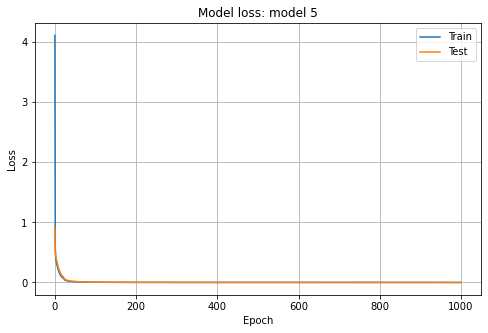

In [12]:
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000) #training set
x_valid = np.random.uniform(-1, 1, 250) # validation set
x_valid.sort()
y_target = 4 -3* x_valid -2*np.power(x_valid,2) + 3*np.power(x_valid,3) # ideal (target) polynomial function
sigma = 0.00 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a +b* x_train +c*np.power(x_train,2) +d*np.power(x_train,3), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a+b* x_valid +c*np.power(x_valid,2) +d*np.power(x_valid,3), sigma)


model5 = tf.keras.Sequential()
model5.add(Dense(units=15,input_shape=(1,)))
model5.add(Activation('relu'))
model5.add(Dense(units=15))
model5.add(Activation('relu'))
model5.add(Dense(units=1,input_shape=(1,)))
model5.add(Activation('selu'))

# compile the model & get a summary
model5.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model5.summary()
history5 = model5.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=1000,
          shuffle=True, #  shuffle input before at each epoch
          validation_data=(x_valid, y_valid))


model5.get_weights()
score = model5.evaluate(x_valid, y_valid, batch_size=100, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# look into training history
# Plot training & validation loss values
fig2,ax2=plt.subplots(figsize=(8,5))
ax2.plot(history5.history['loss'])
ax2.plot(history5.history['val_loss'])
ax2.set_title('Model loss: model 5')
ax2.set_ylabel('Loss')
plt.xlabel('Epoch')
plt.grid(True)
ax2.legend(['Train', 'Test'], loc='best')
plt.show()


16/16 [==============================] - 0s 715us/step


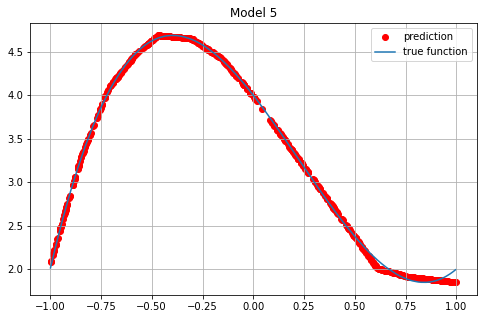

In [13]:
model5.get_weights()
x_predicted = np.random.uniform(-1,1, 500)
y_predicted = model5.predict(x_predicted)

figure = plt.subplots(figsize=(8,5))
plt.scatter(x_predicted, y_predicted,color='r', label='prediction')
plt.title('Model 5')
plt.plot(x_valid, y_target, label='true function')
plt.legend()
plt.grid(True)
plt.show()

## Summary:
it seems that using the PReLu activation function with the third model allows a slightly better approximation of the third grade polynomial, even if, it must be noticed that the general improvement in all cases is quite unsubstantial.
To is if the approximation could be improved even more, I am goind to change the optimizer and the mestrics.
Firstly, let's change the optimizer and try Adam, which is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 10)                20        
                                                                 
 activation_21 (Activation)  (None, 10)                0         
                                                                 
 dense_22 (Dense)            (None, 10)                110       
                                                                 
 activation_22 (Activation)  (None, 10)                0         
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
 activation_23 (Activation)  (None, 1)                 1         
                                                                 
Total params: 142
Trainable params: 142
Non-trainable 

32/32 [==============================] - 0s 2ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 115/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 116/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 117/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 118/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 119/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 120/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 121/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 237/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 238/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 239/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 240/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 241/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 242/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 243/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 6.9713e-04 - mse: 6.9713e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 350/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.1432e-04 - mse: 7.1432e-04 - val_loss: 8.2199e-04 - val_mse: 8.2199e-04
Epoch 351/1000
32/32 [==============================] - 0s 2ms/step - loss: 6.9276e-04 - mse: 6.9276e-04 - val_loss: 8.5821e-04 - val_mse: 8.5821e-04
Epoch 352/1000
32/32 [==============================] - 0s 2ms/step - loss: 6.7015e-04 - mse: 6.7015e-04 - val_loss: 8.6503e-04 - val_mse: 8.6503e-04
Epoch 353/1000
32/32 [==============================] - 0s 2ms/step - loss: 6.6922e-04 - mse: 6.6922e-04 - val_loss: 7.6958e-04 - val_mse: 7.6958e-04
Epoch 354/1000
32/32 [==============================] - 0s 2ms/step - loss: 6.8312e-04 - mse: 6.8312e-04 - val_loss: 8.7558e-04 - val_mse: 8.7558e-04
Epoch 355/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.8891e-04 - mse: 7.8891e-04 - val_loss: 8.8783

Epoch 404/1000
32/32 [==============================] - 0s 2ms/step - loss: 5.9418e-04 - mse: 5.9418e-04 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 405/1000
32/32 [==============================] - 0s 2ms/step - loss: 6.3358e-04 - mse: 6.3358e-04 - val_loss: 6.1488e-04 - val_mse: 6.1488e-04
Epoch 406/1000
32/32 [==============================] - 0s 2ms/step - loss: 5.6748e-04 - mse: 5.6748e-04 - val_loss: 7.6810e-04 - val_mse: 7.6810e-04
Epoch 407/1000
32/32 [==============================] - 0s 2ms/step - loss: 5.9166e-04 - mse: 5.9166e-04 - val_loss: 6.8592e-04 - val_mse: 6.8592e-04
Epoch 408/1000
32/32 [==============================] - 0s 2ms/step - loss: 6.3543e-04 - mse: 6.3543e-04 - val_loss: 8.3183e-04 - val_mse: 8.3183e-04
Epoch 409/1000
32/32 [==============================] - 0s 2ms/step - loss: 6.3269e-04 - mse: 6.3269e-04 - val_loss: 7.1902e-04 - val_mse: 7.1902e-04
Epoch 410/1000
32/32 [==============================] - 0s 2ms/step - loss: 6.0308e-04 - mse: 6.0308e-04 - v

Epoch 459/1000
32/32 [==============================] - 0s 2ms/step - loss: 5.4489e-04 - mse: 5.4489e-04 - val_loss: 7.5290e-04 - val_mse: 7.5290e-04
Epoch 460/1000
32/32 [==============================] - 0s 2ms/step - loss: 5.0313e-04 - mse: 5.0313e-04 - val_loss: 7.2733e-04 - val_mse: 7.2733e-04
Epoch 461/1000
32/32 [==============================] - 0s 2ms/step - loss: 5.8947e-04 - mse: 5.8947e-04 - val_loss: 5.4192e-04 - val_mse: 5.4192e-04
Epoch 462/1000
32/32 [==============================] - 0s 2ms/step - loss: 5.1075e-04 - mse: 5.1075e-04 - val_loss: 5.2876e-04 - val_mse: 5.2876e-04
Epoch 463/1000
32/32 [==============================] - 0s 2ms/step - loss: 4.7909e-04 - mse: 4.7909e-04 - val_loss: 5.9820e-04 - val_mse: 5.9820e-04
Epoch 464/1000
32/32 [==============================] - 0s 2ms/step - loss: 4.9757e-04 - mse: 4.9757e-04 - val_loss: 5.2472e-04 - val_mse: 5.2472e-04
Epoch 465/1000
32/32 [==============================] - 0s 2ms/step - loss: 5.8391e-04 - mse: 5.8391

Epoch 568/1000
32/32 [==============================] - 0s 2ms/step - loss: 3.5348e-04 - mse: 3.5348e-04 - val_loss: 4.1921e-04 - val_mse: 4.1921e-04
Epoch 569/1000
32/32 [==============================] - 0s 2ms/step - loss: 3.6829e-04 - mse: 3.6829e-04 - val_loss: 4.2945e-04 - val_mse: 4.2945e-04
Epoch 570/1000
32/32 [==============================] - 0s 2ms/step - loss: 3.8708e-04 - mse: 3.8708e-04 - val_loss: 4.1248e-04 - val_mse: 4.1248e-04
Epoch 571/1000
32/32 [==============================] - 0s 2ms/step - loss: 3.6501e-04 - mse: 3.6501e-04 - val_loss: 3.9977e-04 - val_mse: 3.9977e-04
Epoch 572/1000
32/32 [==============================] - 0s 2ms/step - loss: 3.8595e-04 - mse: 3.8595e-04 - val_loss: 6.1935e-04 - val_mse: 6.1935e-04
Epoch 573/1000
32/32 [==============================] - 0s 2ms/step - loss: 3.6076e-04 - mse: 3.6076e-04 - val_loss: 4.3298e-04 - val_mse: 4.3298e-04
Epoch 574/1000
32/32 [==============================] - 0s 3ms/step - loss: 3.8265e-04 - mse: 3.8265

Epoch 677/1000
32/32 [==============================] - 0s 2ms/step - loss: 3.2250e-04 - mse: 3.2250e-04 - val_loss: 3.2172e-04 - val_mse: 3.2172e-04
Epoch 678/1000
32/32 [==============================] - 0s 2ms/step - loss: 3.2892e-04 - mse: 3.2892e-04 - val_loss: 3.4682e-04 - val_mse: 3.4682e-04
Epoch 679/1000
32/32 [==============================] - 0s 2ms/step - loss: 3.4355e-04 - mse: 3.4355e-04 - val_loss: 3.2238e-04 - val_mse: 3.2238e-04
Epoch 680/1000
32/32 [==============================] - 0s 2ms/step - loss: 2.8283e-04 - mse: 2.8283e-04 - val_loss: 3.8643e-04 - val_mse: 3.8643e-04
Epoch 681/1000
32/32 [==============================] - 0s 2ms/step - loss: 3.0138e-04 - mse: 3.0138e-04 - val_loss: 4.3644e-04 - val_mse: 4.3644e-04
Epoch 682/1000
32/32 [==============================] - 0s 2ms/step - loss: 3.1820e-04 - mse: 3.1820e-04 - val_loss: 3.4705e-04 - val_mse: 3.4705e-04
Epoch 683/1000
32/32 [==============================] - 0s 2ms/step - loss: 3.8271e-04 - mse: 3.8271

Epoch 786/1000
32/32 [==============================] - 0s 2ms/step - loss: 2.5567e-04 - mse: 2.5567e-04 - val_loss: 2.6706e-04 - val_mse: 2.6706e-04
Epoch 787/1000
32/32 [==============================] - 0s 2ms/step - loss: 2.5664e-04 - mse: 2.5664e-04 - val_loss: 2.6553e-04 - val_mse: 2.6553e-04
Epoch 788/1000
32/32 [==============================] - 0s 2ms/step - loss: 2.7818e-04 - mse: 2.7818e-04 - val_loss: 3.3485e-04 - val_mse: 3.3485e-04
Epoch 789/1000
32/32 [==============================] - 0s 2ms/step - loss: 2.8250e-04 - mse: 2.8250e-04 - val_loss: 3.2866e-04 - val_mse: 3.2866e-04
Epoch 790/1000
32/32 [==============================] - 0s 2ms/step - loss: 2.3636e-04 - mse: 2.3636e-04 - val_loss: 2.6482e-04 - val_mse: 2.6482e-04
Epoch 791/1000
32/32 [==============================] - 0s 2ms/step - loss: 2.5513e-04 - mse: 2.5513e-04 - val_loss: 3.7463e-04 - val_mse: 3.7463e-04
Epoch 792/1000
32/32 [==============================] - 0s 2ms/step - loss: 2.7469e-04 - mse: 2.7469

Epoch 895/1000
32/32 [==============================] - 0s 2ms/step - loss: 2.5387e-04 - mse: 2.5387e-04 - val_loss: 2.3287e-04 - val_mse: 2.3287e-04
Epoch 896/1000
32/32 [==============================] - 0s 2ms/step - loss: 2.1496e-04 - mse: 2.1496e-04 - val_loss: 3.0850e-04 - val_mse: 3.0850e-04
Epoch 897/1000
32/32 [==============================] - 0s 2ms/step - loss: 2.5457e-04 - mse: 2.5457e-04 - val_loss: 2.4062e-04 - val_mse: 2.4062e-04
Epoch 898/1000
32/32 [==============================] - 0s 2ms/step - loss: 2.0088e-04 - mse: 2.0088e-04 - val_loss: 2.7511e-04 - val_mse: 2.7511e-04
Epoch 899/1000
32/32 [==============================] - 0s 2ms/step - loss: 2.1550e-04 - mse: 2.1550e-04 - val_loss: 2.4266e-04 - val_mse: 2.4266e-04
Epoch 900/1000
32/32 [==============================] - 0s 2ms/step - loss: 2.4986e-04 - mse: 2.4986e-04 - val_loss: 2.8832e-04 - val_mse: 2.8832e-04
Epoch 901/1000
32/32 [==============================] - 0s 2ms/step - loss: 2.5060e-04 - mse: 2.5060

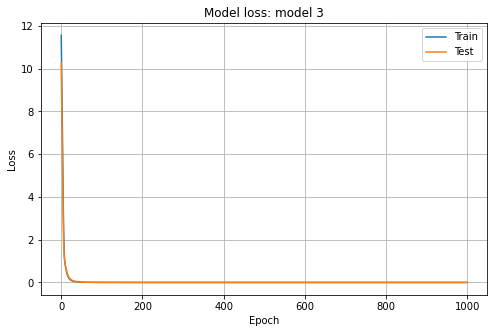

16/16 [==============================] - 0s 2ms/step


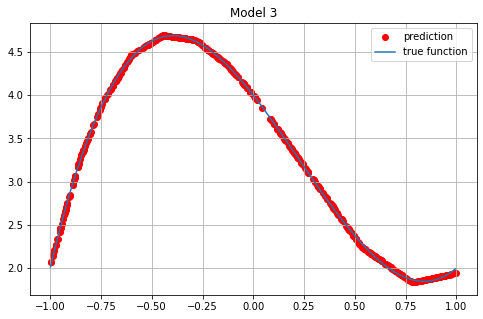

In [15]:
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000) #training set
x_valid = np.random.uniform(-1, 1, 250) # validation set
x_valid.sort()
y_target = 4 -3* x_valid -2*np.power(x_valid,2) + 3*np.power(x_valid,3) # ideal (target) polynomial function
sigma = 0.00 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a +b* x_train +c*np.power(x_train,2) +d*np.power(x_train,3), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a+b* x_valid +c*np.power(x_valid,2) +d*np.power(x_valid,3), sigma)


model3 = tf.keras.Sequential()
model3.add(Dense(units=10,input_shape=(1,)))
model3.add(Activation('relu'))
model3.add(Dense(units=10))
model3.add(Activation('relu'))
model3.add(Dense(units=1,input_shape=(1,)))
model3.add(Activation('PReLU'))

# compile the model & get a summary
model3.compile(optimizer='Adam', loss='mse', metrics=['mse'])
model3.summary()
history3 = model3.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=1000,
          shuffle=True, #  shuffle input before at each epoch
          validation_data=(x_valid, y_valid))


model3.get_weights()
score = model3.evaluate(x_valid, y_valid, batch_size=100, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# look into training history
# Plot training & validation loss values
fig2,ax2=plt.subplots(figsize=(8,5))
ax2.plot(history3.history['loss'])
ax2.plot(history3.history['val_loss'])
ax2.set_title('Model loss: model 3')
ax2.set_ylabel('Loss')
plt.xlabel('Epoch')
plt.grid(True)
ax2.legend(['Train', 'Test'], loc='best')
plt.show()


model3.get_weights()
x_predicted = np.random.uniform(-1,1, 500)
y_predicted = model3.predict(x_predicted)

figure = plt.subplots(figsize=(8,5))
plt.scatter(x_predicted, y_predicted,color='r', label='prediction')
plt.title('Model 3')
plt.plot(x_valid, y_target, label='true function')
plt.legend()
plt.grid(True)
plt.show()

Let's try a different optimizer: ADAGRAD

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 10)                20        
                                                                 
 activation_27 (Activation)  (None, 10)                0         
                                                                 
 dense_28 (Dense)            (None, 10)                110       
                                                                 
 activation_28 (Activation)  (None, 10)                0         
                                                                 
 dense_29 (Dense)            (None, 1)                 11        
                                                                 
 activation_29 (Activation)  (None, 1)                 1         
                                                                 
Total params: 142
Trainable params: 142
Non-trainable 

32/32 [==============================] - 0s 2ms/step - loss: 5.3265 - mse: 5.3265 - val_loss: 4.9478 - val_mse: 4.9478
Epoch 115/1000
32/32 [==============================] - 0s 2ms/step - loss: 5.2957 - mse: 5.2957 - val_loss: 4.9187 - val_mse: 4.9187
Epoch 116/1000
32/32 [==============================] - 0s 2ms/step - loss: 5.2651 - mse: 5.2651 - val_loss: 4.8903 - val_mse: 4.8903
Epoch 117/1000
32/32 [==============================] - 0s 2ms/step - loss: 5.2349 - mse: 5.2349 - val_loss: 4.8616 - val_mse: 4.8616
Epoch 118/1000
32/32 [==============================] - 0s 2ms/step - loss: 5.2045 - mse: 5.2045 - val_loss: 4.8329 - val_mse: 4.8329
Epoch 119/1000
32/32 [==============================] - 0s 2ms/step - loss: 5.1741 - mse: 5.1741 - val_loss: 4.8044 - val_mse: 4.8044
Epoch 120/1000
32/32 [==============================] - 0s 2ms/step - loss: 5.1439 - mse: 5.1439 - val_loss: 4.7760 - val_mse: 4.7760
Epoch 121/1000
32/32 [==============================] - 0s 2ms/step - loss: 5

32/32 [==============================] - 0s 2ms/step - loss: 2.7080 - mse: 2.7080 - val_loss: 2.5284 - val_mse: 2.5284
Epoch 237/1000
32/32 [==============================] - 0s 2ms/step - loss: 2.6942 - mse: 2.6942 - val_loss: 2.5159 - val_mse: 2.5159
Epoch 238/1000
32/32 [==============================] - 0s 2ms/step - loss: 2.6804 - mse: 2.6804 - val_loss: 2.5034 - val_mse: 2.5034
Epoch 239/1000
32/32 [==============================] - 0s 2ms/step - loss: 2.6664 - mse: 2.6664 - val_loss: 2.4911 - val_mse: 2.4911
Epoch 240/1000
32/32 [==============================] - 0s 2ms/step - loss: 2.6528 - mse: 2.6528 - val_loss: 2.4787 - val_mse: 2.4787
Epoch 241/1000
32/32 [==============================] - 0s 2ms/step - loss: 2.6390 - mse: 2.6390 - val_loss: 2.4663 - val_mse: 2.4663
Epoch 242/1000
32/32 [==============================] - 0s 2ms/step - loss: 2.6253 - mse: 2.6253 - val_loss: 2.4543 - val_mse: 2.4543
Epoch 243/1000
32/32 [==============================] - 0s 2ms/step - loss: 2

32/32 [==============================] - 0s 2ms/step - loss: 1.5444 - mse: 1.5444 - val_loss: 1.5093 - val_mse: 1.5093
Epoch 359/1000
32/32 [==============================] - 0s 2ms/step - loss: 1.5384 - mse: 1.5384 - val_loss: 1.5043 - val_mse: 1.5043
Epoch 360/1000
32/32 [==============================] - 0s 2ms/step - loss: 1.5325 - mse: 1.5325 - val_loss: 1.4993 - val_mse: 1.4993
Epoch 361/1000
32/32 [==============================] - 0s 2ms/step - loss: 1.5267 - mse: 1.5267 - val_loss: 1.4943 - val_mse: 1.4943
Epoch 362/1000
32/32 [==============================] - 0s 3ms/step - loss: 1.5209 - mse: 1.5209 - val_loss: 1.4895 - val_mse: 1.4895
Epoch 363/1000
32/32 [==============================] - 0s 2ms/step - loss: 1.5152 - mse: 1.5152 - val_loss: 1.4845 - val_mse: 1.4845
Epoch 364/1000
32/32 [==============================] - 0s 2ms/step - loss: 1.5093 - mse: 1.5093 - val_loss: 1.4797 - val_mse: 1.4797
Epoch 365/1000
32/32 [==============================] - 0s 2ms/step - loss: 1

32/32 [==============================] - 0s 2ms/step - loss: 1.0550 - mse: 1.0550 - val_loss: 1.1055 - val_mse: 1.1055
Epoch 481/1000
32/32 [==============================] - 0s 2ms/step - loss: 1.0524 - mse: 1.0524 - val_loss: 1.1033 - val_mse: 1.1033
Epoch 482/1000
32/32 [==============================] - 0s 2ms/step - loss: 1.0498 - mse: 1.0498 - val_loss: 1.1012 - val_mse: 1.1012
Epoch 483/1000
32/32 [==============================] - 0s 2ms/step - loss: 1.0472 - mse: 1.0472 - val_loss: 1.0991 - val_mse: 1.0991
Epoch 484/1000
32/32 [==============================] - 0s 2ms/step - loss: 1.0446 - mse: 1.0446 - val_loss: 1.0970 - val_mse: 1.0970
Epoch 485/1000
32/32 [==============================] - 0s 2ms/step - loss: 1.0421 - mse: 1.0421 - val_loss: 1.0950 - val_mse: 1.0950
Epoch 486/1000
32/32 [==============================] - 0s 2ms/step - loss: 1.0395 - mse: 1.0395 - val_loss: 1.0929 - val_mse: 1.0929
Epoch 487/1000
32/32 [==============================] - 0s 2ms/step - loss: 1

32/32 [==============================] - 0s 2ms/step - loss: 0.8230 - mse: 0.8230 - val_loss: 0.9137 - val_mse: 0.9137
Epoch 603/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.8216 - mse: 0.8216 - val_loss: 0.9126 - val_mse: 0.9126
Epoch 604/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.8203 - mse: 0.8203 - val_loss: 0.9114 - val_mse: 0.9114
Epoch 605/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.8189 - mse: 0.8189 - val_loss: 0.9102 - val_mse: 0.9102
Epoch 606/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.8176 - mse: 0.8176 - val_loss: 0.9091 - val_mse: 0.9091
Epoch 607/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.8162 - mse: 0.8162 - val_loss: 0.9079 - val_mse: 0.9079
Epoch 608/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.8149 - mse: 0.8149 - val_loss: 0.9067 - val_mse: 0.9067
Epoch 609/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 0.6891 - mse: 0.6891 - val_loss: 0.7943 - val_mse: 0.7943
Epoch 725/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6882 - mse: 0.6882 - val_loss: 0.7935 - val_mse: 0.7935
Epoch 726/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6873 - mse: 0.6873 - val_loss: 0.7926 - val_mse: 0.7926
Epoch 727/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.6865 - mse: 0.6865 - val_loss: 0.7918 - val_mse: 0.7918
Epoch 728/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6856 - mse: 0.6856 - val_loss: 0.7910 - val_mse: 0.7910
Epoch 729/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6847 - mse: 0.6847 - val_loss: 0.7901 - val_mse: 0.7901
Epoch 730/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6839 - mse: 0.6839 - val_loss: 0.7893 - val_mse: 0.7893
Epoch 731/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 0.5960 - mse: 0.5960 - val_loss: 0.7025 - val_mse: 0.7025
Epoch 847/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.5954 - mse: 0.5954 - val_loss: 0.7018 - val_mse: 0.7018
Epoch 848/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.5947 - mse: 0.5947 - val_loss: 0.7012 - val_mse: 0.7012
Epoch 849/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.5940 - mse: 0.5940 - val_loss: 0.7005 - val_mse: 0.7005
Epoch 850/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.5934 - mse: 0.5934 - val_loss: 0.6998 - val_mse: 0.6998
Epoch 851/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.5927 - mse: 0.5927 - val_loss: 0.6991 - val_mse: 0.6991
Epoch 852/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.5920 - mse: 0.5920 - val_loss: 0.6984 - val_mse: 0.6984
Epoch 853/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 0.5112 - mse: 0.5112 - val_loss: 0.6139 - val_mse: 0.6139
Epoch 969/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.5105 - mse: 0.5105 - val_loss: 0.6132 - val_mse: 0.6132
Epoch 970/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.5099 - mse: 0.5099 - val_loss: 0.6125 - val_mse: 0.6125
Epoch 971/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.5092 - mse: 0.5092 - val_loss: 0.6118 - val_mse: 0.6118
Epoch 972/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.5086 - mse: 0.5086 - val_loss: 0.6111 - val_mse: 0.6111
Epoch 973/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.5079 - mse: 0.5079 - val_loss: 0.6105 - val_mse: 0.6105
Epoch 974/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.5073 - mse: 0.5073 - val_loss: 0.6098 - val_mse: 0.6098
Epoch 975/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

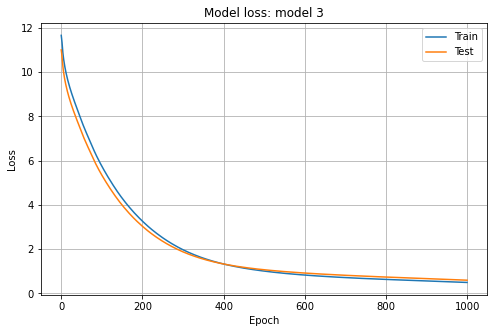

16/16 [==============================] - 0s 2ms/step


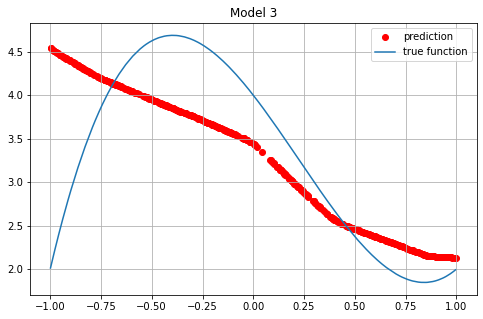

In [17]:
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000) #training set
x_valid = np.random.uniform(-1, 1, 250) # validation set
x_valid.sort()
y_target = 4 -3* x_valid -2*np.power(x_valid,2) + 3*np.power(x_valid,3) # ideal (target) polynomial function
sigma = 0.00 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a +b* x_train +c*np.power(x_train,2) +d*np.power(x_train,3), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a+b* x_valid +c*np.power(x_valid,2) +d*np.power(x_valid,3), sigma)


model3 = tf.keras.Sequential()
model3.add(Dense(units=10,input_shape=(1,)))
model3.add(Activation('relu'))
model3.add(Dense(units=10))
model3.add(Activation('relu'))
model3.add(Dense(units=1,input_shape=(1,)))
model3.add(Activation('PReLU'))

# compile the model & get a summary
model3.compile(optimizer='Adagrad', loss='mse', metrics=['mse'])
model3.summary()
history3 = model3.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=1000,
          shuffle=True, #  shuffle input before at each epoch
          validation_data=(x_valid, y_valid))


model3.get_weights()
score = model3.evaluate(x_valid, y_valid, batch_size=100, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# look into training history
# Plot training & validation loss values
fig2,ax2=plt.subplots(figsize=(8,5))
ax2.plot(history3.history['loss'])
ax2.plot(history3.history['val_loss'])
ax2.set_title('Model loss: model 3')
ax2.set_ylabel('Loss')
plt.xlabel('Epoch')
plt.grid(True)
ax2.legend(['Train', 'Test'], loc='best')
plt.show()


model3.get_weights()
x_predicted = np.random.uniform(-1,1, 500)
y_predicted = model3.predict(x_predicted)

figure = plt.subplots(figsize=(8,5))
plt.scatter(x_predicted, y_predicted,color='r', label='prediction')
plt.title('Model 3')
plt.plot(x_valid, y_target, label='true function')
plt.legend()
plt.grid(True)
plt.show()

Finally, let's try a different loss, in particular I will try a regression loss and a probabilistic loss, on the previous model,
using the adam optimizer.
- first try: MeanAbsoluteError(), regrssion loss
- second try: Poisson(), probabilistc loss

# MeanAbsoluteError()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 10)                20        
                                                                 
 activation_42 (Activation)  (None, 10)                0         
                                                                 
 dense_43 (Dense)            (None, 10)                110       
                                                                 
 activation_43 (Activation)  (None, 10)                0         
                                                                 
 dense_44 (Dense)            (None, 1)                 11        
                                                                 
 activation_44 (Activation)  (None, 1)                 1         
                                                                 
Total params: 142
Trainable params: 142
Non-trainable

32/32 [==============================] - 0s 2ms/step - loss: 0.5311 - mse: 0.7760 - val_loss: 0.5917 - val_mse: 1.0181
Epoch 115/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.5324 - mse: 0.7919 - val_loss: 0.5923 - val_mse: 1.0215
Epoch 116/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.5322 - mse: 0.7987 - val_loss: 0.5929 - val_mse: 1.0480
Epoch 117/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.5309 - mse: 0.7969 - val_loss: 0.5901 - val_mse: 1.0056
Epoch 118/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.5316 - mse: 0.7850 - val_loss: 0.5905 - val_mse: 1.0074
Epoch 119/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.5310 - mse: 0.7781 - val_loss: 0.5907 - val_mse: 1.0222
Epoch 120/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.5314 - mse: 0.8001 - val_loss: 0.5909 - val_mse: 1.0130
Epoch 121/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 0.0462 - mse: 0.0044 - val_loss: 0.0516 - val_mse: 0.0047
Epoch 237/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0462 - mse: 0.0042 - val_loss: 0.0462 - val_mse: 0.0056
Epoch 238/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0477 - mse: 0.0048 - val_loss: 0.0486 - val_mse: 0.0045
Epoch 239/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0444 - mse: 0.0043 - val_loss: 0.0456 - val_mse: 0.0051
Epoch 240/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0450 - mse: 0.0042 - val_loss: 0.0459 - val_mse: 0.0051
Epoch 241/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0465 - mse: 0.0044 - val_loss: 0.0528 - val_mse: 0.0057
Epoch 242/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0456 - mse: 0.0043 - val_loss: 0.0450 - val_mse: 0.0042
Epoch 243/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 0.0421 - mse: 0.0041 - val_loss: 0.0439 - val_mse: 0.0035
Epoch 359/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0427 - mse: 0.0040 - val_loss: 0.0467 - val_mse: 0.0045
Epoch 360/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0448 - mse: 0.0041 - val_loss: 0.0435 - val_mse: 0.0037
Epoch 361/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0439 - mse: 0.0041 - val_loss: 0.0422 - val_mse: 0.0037
Epoch 362/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0411 - mse: 0.0038 - val_loss: 0.0441 - val_mse: 0.0044
Epoch 363/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0432 - mse: 0.0040 - val_loss: 0.0509 - val_mse: 0.0071
Epoch 364/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0451 - mse: 0.0042 - val_loss: 0.0425 - val_mse: 0.0038
Epoch 365/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 0.0406 - mse: 0.0038 - val_loss: 0.0456 - val_mse: 0.0041
Epoch 481/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0414 - mse: 0.0038 - val_loss: 0.0443 - val_mse: 0.0046
Epoch 482/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0404 - mse: 0.0040 - val_loss: 0.0450 - val_mse: 0.0040
Epoch 483/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0409 - mse: 0.0037 - val_loss: 0.0441 - val_mse: 0.0045
Epoch 484/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0406 - mse: 0.0041 - val_loss: 0.0448 - val_mse: 0.0046
Epoch 485/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0405 - mse: 0.0037 - val_loss: 0.0494 - val_mse: 0.0067
Epoch 486/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0420 - mse: 0.0040 - val_loss: 0.0440 - val_mse: 0.0041
Epoch 487/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 0.0413 - mse: 0.0037 - val_loss: 0.0459 - val_mse: 0.0063
Epoch 603/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0407 - mse: 0.0040 - val_loss: 0.0451 - val_mse: 0.0047
Epoch 604/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0419 - mse: 0.0038 - val_loss: 0.0449 - val_mse: 0.0049
Epoch 605/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0400 - mse: 0.0038 - val_loss: 0.0431 - val_mse: 0.0047
Epoch 606/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0400 - mse: 0.0037 - val_loss: 0.0437 - val_mse: 0.0048
Epoch 607/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0405 - mse: 0.0038 - val_loss: 0.0437 - val_mse: 0.0041
Epoch 608/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0409 - mse: 0.0036 - val_loss: 0.0455 - val_mse: 0.0049
Epoch 609/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 0.0398 - mse: 0.0040 - val_loss: 0.0428 - val_mse: 0.0043
Epoch 725/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0398 - mse: 0.0037 - val_loss: 0.0431 - val_mse: 0.0042
Epoch 726/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0404 - mse: 0.0039 - val_loss: 0.0432 - val_mse: 0.0044
Epoch 727/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0403 - mse: 0.0039 - val_loss: 0.0438 - val_mse: 0.0044
Epoch 728/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0405 - mse: 0.0037 - val_loss: 0.0455 - val_mse: 0.0047
Epoch 729/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0423 - mse: 0.0039 - val_loss: 0.0436 - val_mse: 0.0043
Epoch 730/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0435 - mse: 0.0041 - val_loss: 0.0464 - val_mse: 0.0048
Epoch 731/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 0.0405 - mse: 0.0038 - val_loss: 0.0450 - val_mse: 0.0053
Epoch 847/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0414 - mse: 0.0039 - val_loss: 0.0470 - val_mse: 0.0048
Epoch 848/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0415 - mse: 0.0038 - val_loss: 0.0461 - val_mse: 0.0041
Epoch 849/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0432 - mse: 0.0039 - val_loss: 0.0435 - val_mse: 0.0052
Epoch 850/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0415 - mse: 0.0042 - val_loss: 0.0428 - val_mse: 0.0044
Epoch 851/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0408 - mse: 0.0038 - val_loss: 0.0428 - val_mse: 0.0042
Epoch 852/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0396 - mse: 0.0037 - val_loss: 0.0436 - val_mse: 0.0047
Epoch 853/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 0.0430 - mse: 0.0041 - val_loss: 0.0448 - val_mse: 0.0044
Epoch 969/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0433 - mse: 0.0044 - val_loss: 0.0464 - val_mse: 0.0068
Epoch 970/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0407 - mse: 0.0039 - val_loss: 0.0469 - val_mse: 0.0058
Epoch 971/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0403 - mse: 0.0039 - val_loss: 0.0455 - val_mse: 0.0059
Epoch 972/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0421 - mse: 0.0043 - val_loss: 0.0435 - val_mse: 0.0052
Epoch 973/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0401 - mse: 0.0037 - val_loss: 0.0432 - val_mse: 0.0051
Epoch 974/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0397 - mse: 0.0037 - val_loss: 0.0441 - val_mse: 0.0044
Epoch 975/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

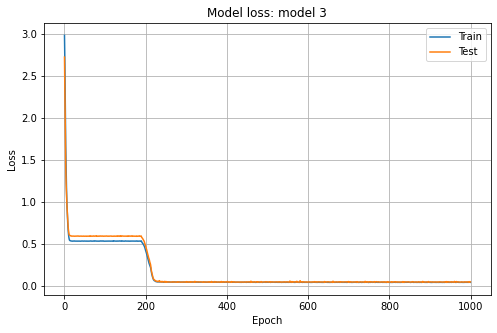

16/16 [==============================] - 0s 2ms/step


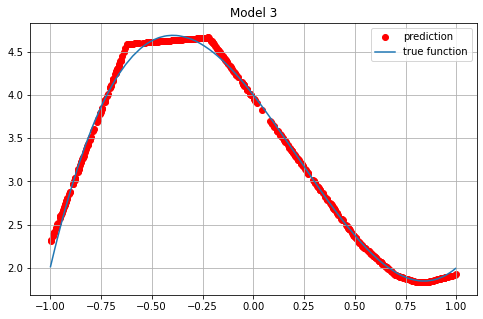

In [22]:
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000) #training set
x_valid = np.random.uniform(-1, 1, 250) # validation set
x_valid.sort()
y_target = 4 -3* x_valid -2*np.power(x_valid,2) + 3*np.power(x_valid,3) # ideal (target) polynomial function
sigma = 0.00 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a +b* x_train +c*np.power(x_train,2) +d*np.power(x_train,3), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a+b* x_valid +c*np.power(x_valid,2) +d*np.power(x_valid,3), sigma)


model3 = tf.keras.Sequential()
model3.add(Dense(units=10,input_shape=(1,)))
model3.add(Activation('relu'))
model3.add(Dense(units=10))
model3.add(Activation('relu'))
model3.add(Dense(units=1,input_shape=(1,)))
model3.add(Activation('PReLU'))

# compile the model & get a summary
model3.compile(optimizer='Adam', loss='MeanAbsoluteError', metrics=['mse'])
model3.summary()
history3 = model3.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=1000,
          shuffle=True, #  shuffle input before at each epoch
          validation_data=(x_valid, y_valid))


model3.get_weights()
score = model3.evaluate(x_valid, y_valid, batch_size=100, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# look into training history
# Plot training & validation loss values
fig2,ax2=plt.subplots(figsize=(8,5))
ax2.plot(history3.history['loss'])
ax2.plot(history3.history['val_loss'])
ax2.set_title('Model loss: model 3')
ax2.set_ylabel('Loss')
plt.xlabel('Epoch')
plt.grid(True)
ax2.legend(['Train', 'Test'], loc='best')
plt.show()


model3.get_weights()
x_predicted = np.random.uniform(-1,1, 500)
y_predicted = model3.predict(x_predicted)

figure = plt.subplots(figsize=(8,5))
plt.scatter(x_predicted, y_predicted,color='r', label='prediction')
plt.title('Model 3')
plt.plot(x_valid, y_target, label='true function')
plt.legend()
plt.grid(True)
plt.show()

# Poisson()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 10)                20        
                                                                 
 activation_45 (Activation)  (None, 10)                0         
                                                                 
 dense_46 (Dense)            (None, 10)                110       
                                                                 
 activation_46 (Activation)  (None, 10)                0         
                                                                 
 dense_47 (Dense)            (None, 1)                 11        
                                                                 
 activation_47 (Activation)  (None, 1)                 1         
                                                                 
Total params: 142
Trainable params: 142
Non-trainable

Epoch 53/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.9735 - mse: 6.4603 - val_loss: 0.9196 - val_mse: 5.9756
Epoch 54/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.8726 - mse: 6.2515 - val_loss: 0.8246 - val_mse: 5.7737
Epoch 55/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.7757 - mse: 6.0413 - val_loss: 0.7340 - val_mse: 5.5730
Epoch 56/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6828 - mse: 5.8305 - val_loss: 0.6464 - val_mse: 5.3711
Epoch 57/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.5944 - mse: 5.6242 - val_loss: 0.5637 - val_mse: 5.1727
Epoch 58/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.5101 - mse: 5.4180 - val_loss: 0.4855 - val_mse: 4.9782
Epoch 59/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.4300 - mse: 5.2152 - val_loss: 0.4110 - val_mse: 4.7861
Epoch 60/1000
32/32 [==============================] - 0s 2ms/step - 

Epoch 114/1000
32/32 [==============================] - 0s 2ms/step - loss: -0.7731 - mse: 0.7971 - val_loss: -0.6610 - val_mse: 0.9352
Epoch 115/1000
32/32 [==============================] - 0s 2ms/step - loss: -0.7738 - mse: 0.7940 - val_loss: -0.6615 - val_mse: 0.9346
Epoch 116/1000
32/32 [==============================] - 0s 2ms/step - loss: -0.7746 - mse: 0.7897 - val_loss: -0.6619 - val_mse: 0.9332
Epoch 117/1000
32/32 [==============================] - 0s 3ms/step - loss: -0.7753 - mse: 0.7867 - val_loss: -0.6624 - val_mse: 0.9322
Epoch 118/1000
32/32 [==============================] - 0s 2ms/step - loss: -0.7760 - mse: 0.7828 - val_loss: -0.6628 - val_mse: 0.9303
Epoch 119/1000
32/32 [==============================] - 0s 2ms/step - loss: -0.7766 - mse: 0.7798 - val_loss: -0.6633 - val_mse: 0.9285
Epoch 120/1000
32/32 [==============================] - 0s 2ms/step - loss: -0.7772 - mse: 0.7768 - val_loss: -0.6637 - val_mse: 0.9273
Epoch 121/1000
32/32 [==========================

32/32 [==============================] - 0s 2ms/step - loss: -0.8028 - mse: 0.5824 - val_loss: -0.6913 - val_mse: 0.7111
Epoch 235/1000
32/32 [==============================] - 0s 2ms/step - loss: -0.8029 - mse: 0.5816 - val_loss: -0.6913 - val_mse: 0.7117
Epoch 236/1000
32/32 [==============================] - 0s 2ms/step - loss: -0.8030 - mse: 0.5819 - val_loss: -0.6915 - val_mse: 0.7105
Epoch 237/1000
32/32 [==============================] - 0s 2ms/step - loss: -0.8031 - mse: 0.5792 - val_loss: -0.6919 - val_mse: 0.7050
Epoch 238/1000
32/32 [==============================] - 0s 2ms/step - loss: -0.8033 - mse: 0.5782 - val_loss: -0.6918 - val_mse: 0.7066
Epoch 239/1000
32/32 [==============================] - 0s 2ms/step - loss: -0.8033 - mse: 0.5797 - val_loss: -0.6917 - val_mse: 0.7096
Epoch 240/1000
32/32 [==============================] - 0s 2ms/step - loss: -0.8034 - mse: 0.5780 - val_loss: -0.6920 - val_mse: 0.7051
Epoch 241/1000
32/32 [==============================] - 0s 2ms/

32/32 [==============================] - 0s 2ms/step - loss: -0.8048 - mse: 0.5673 - val_loss: -0.6938 - val_mse: 0.6904
Epoch 355/1000
32/32 [==============================] - 0s 2ms/step - loss: -0.8048 - mse: 0.5657 - val_loss: -0.6938 - val_mse: 0.6893
Epoch 356/1000
32/32 [==============================] - 0s 2ms/step - loss: -0.8048 - mse: 0.5667 - val_loss: -0.6939 - val_mse: 0.6893
Epoch 357/1000
32/32 [==============================] - 0s 2ms/step - loss: -0.8049 - mse: 0.5663 - val_loss: -0.6939 - val_mse: 0.6900
Epoch 358/1000
32/32 [==============================] - 0s 2ms/step - loss: -0.8050 - mse: 0.5632 - val_loss: -0.6943 - val_mse: 0.6844
Epoch 359/1000
32/32 [==============================] - 0s 2ms/step - loss: -0.8050 - mse: 0.5636 - val_loss: -0.6939 - val_mse: 0.6893
Epoch 360/1000
32/32 [==============================] - 0s 2ms/step - loss: -0.8051 - mse: 0.5633 - val_loss: -0.6940 - val_mse: 0.6875
Epoch 361/1000
32/32 [==============================] - 0s 2ms/

32/32 [==============================] - 0s 2ms/step - loss: -0.8515 - mse: 0.2012 - val_loss: -0.7484 - val_mse: 0.2549
Epoch 475/1000
32/32 [==============================] - 0s 2ms/step - loss: -0.8525 - mse: 0.1930 - val_loss: -0.7495 - val_mse: 0.2464
Epoch 476/1000
32/32 [==============================] - 0s 2ms/step - loss: -0.8536 - mse: 0.1860 - val_loss: -0.7505 - val_mse: 0.2373
Epoch 477/1000
32/32 [==============================] - 0s 2ms/step - loss: -0.8546 - mse: 0.1774 - val_loss: -0.7518 - val_mse: 0.2283
Epoch 478/1000
32/32 [==============================] - 0s 2ms/step - loss: -0.8555 - mse: 0.1718 - val_loss: -0.7534 - val_mse: 0.2172
Epoch 479/1000
32/32 [==============================] - 0s 2ms/step - loss: -0.8565 - mse: 0.1621 - val_loss: -0.7544 - val_mse: 0.2101
Epoch 480/1000
32/32 [==============================] - 0s 2ms/step - loss: -0.8575 - mse: 0.1559 - val_loss: -0.7556 - val_mse: 0.2008
Epoch 481/1000
32/32 [==============================] - 0s 2ms/

32/32 [==============================] - 0s 2ms/step - loss: -0.8770 - mse: 0.0196 - val_loss: -0.7817 - val_mse: 0.0242
Epoch 595/1000
32/32 [==============================] - 0s 2ms/step - loss: -0.8770 - mse: 0.0196 - val_loss: -0.7818 - val_mse: 0.0237
Epoch 596/1000
32/32 [==============================] - 0s 2ms/step - loss: -0.8770 - mse: 0.0197 - val_loss: -0.7817 - val_mse: 0.0242
Epoch 597/1000
32/32 [==============================] - 0s 2ms/step - loss: -0.8770 - mse: 0.0196 - val_loss: -0.7818 - val_mse: 0.0239
Epoch 598/1000
32/32 [==============================] - 0s 2ms/step - loss: -0.8770 - mse: 0.0196 - val_loss: -0.7818 - val_mse: 0.0236
Epoch 599/1000
32/32 [==============================] - 0s 2ms/step - loss: -0.8770 - mse: 0.0195 - val_loss: -0.7817 - val_mse: 0.0243
Epoch 600/1000
32/32 [==============================] - 0s 2ms/step - loss: -0.8770 - mse: 0.0196 - val_loss: -0.7817 - val_mse: 0.0244
Epoch 601/1000
32/32 [==============================] - 0s 2ms/

32/32 [==============================] - 0s 2ms/step - loss: -0.8776 - mse: 0.0155 - val_loss: -0.7823 - val_mse: 0.0202
Epoch 715/1000
32/32 [==============================] - 0s 2ms/step - loss: -0.8774 - mse: 0.0172 - val_loss: -0.7824 - val_mse: 0.0192
Epoch 716/1000
32/32 [==============================] - 0s 2ms/step - loss: -0.8775 - mse: 0.0158 - val_loss: -0.7825 - val_mse: 0.0189
Epoch 717/1000
32/32 [==============================] - 0s 2ms/step - loss: -0.8775 - mse: 0.0160 - val_loss: -0.7824 - val_mse: 0.0191
Epoch 718/1000
32/32 [==============================] - 0s 2ms/step - loss: -0.8775 - mse: 0.0158 - val_loss: -0.7823 - val_mse: 0.0204
Epoch 719/1000
32/32 [==============================] - 0s 2ms/step - loss: -0.8774 - mse: 0.0168 - val_loss: -0.7822 - val_mse: 0.0209
Epoch 720/1000
32/32 [==============================] - 0s 2ms/step - loss: -0.8775 - mse: 0.0160 - val_loss: -0.7825 - val_mse: 0.0190
Epoch 721/1000
32/32 [==============================] - 0s 2ms/

32/32 [==============================] - 0s 3ms/step - loss: -0.8782 - mse: 0.0111 - val_loss: -0.7835 - val_mse: 0.0109
Epoch 835/1000
32/32 [==============================] - 0s 2ms/step - loss: -0.8782 - mse: 0.0109 - val_loss: -0.7833 - val_mse: 0.0121
Epoch 836/1000
32/32 [==============================] - 0s 2ms/step - loss: -0.8780 - mse: 0.0120 - val_loss: -0.7832 - val_mse: 0.0131
Epoch 837/1000
32/32 [==============================] - 0s 2ms/step - loss: -0.8782 - mse: 0.0111 - val_loss: -0.7834 - val_mse: 0.0117
Epoch 838/1000
32/32 [==============================] - 0s 2ms/step - loss: -0.8781 - mse: 0.0112 - val_loss: -0.7835 - val_mse: 0.0108
Epoch 839/1000
32/32 [==============================] - 0s 2ms/step - loss: -0.8782 - mse: 0.0106 - val_loss: -0.7836 - val_mse: 0.0105
Epoch 840/1000
32/32 [==============================] - 0s 2ms/step - loss: -0.8782 - mse: 0.0109 - val_loss: -0.7835 - val_mse: 0.0109
Epoch 841/1000
32/32 [==============================] - 0s 2ms/

32/32 [==============================] - 0s 2ms/step - loss: -0.8789 - mse: 0.0048 - val_loss: -0.7843 - val_mse: 0.0048
Epoch 955/1000
32/32 [==============================] - 0s 2ms/step - loss: -0.8789 - mse: 0.0051 - val_loss: -0.7841 - val_mse: 0.0066
Epoch 956/1000
32/32 [==============================] - 0s 2ms/step - loss: -0.8789 - mse: 0.0049 - val_loss: -0.7843 - val_mse: 0.0049
Epoch 957/1000
32/32 [==============================] - 0s 2ms/step - loss: -0.8789 - mse: 0.0048 - val_loss: -0.7844 - val_mse: 0.0047
Epoch 958/1000
32/32 [==============================] - 0s 2ms/step - loss: -0.8789 - mse: 0.0048 - val_loss: -0.7843 - val_mse: 0.0050
Epoch 959/1000
32/32 [==============================] - 0s 2ms/step - loss: -0.8789 - mse: 0.0048 - val_loss: -0.7844 - val_mse: 0.0047
Epoch 960/1000
32/32 [==============================] - 0s 2ms/step - loss: -0.8789 - mse: 0.0049 - val_loss: -0.7841 - val_mse: 0.0061
Epoch 961/1000
32/32 [==============================] - 0s 2ms/

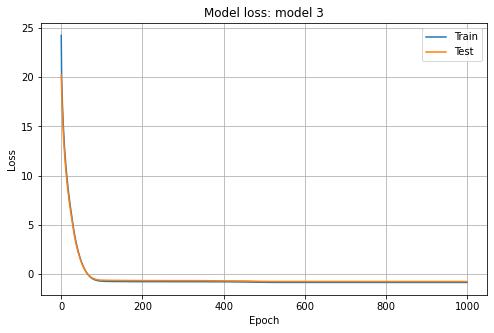

16/16 [==============================] - 0s 1ms/step


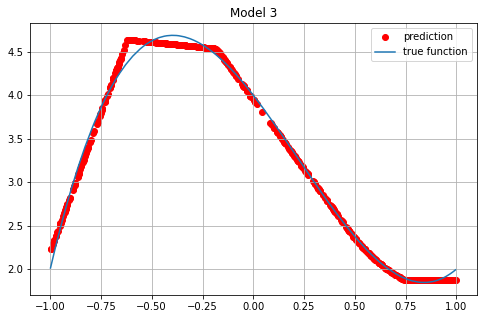

In [23]:
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000) #training set
x_valid = np.random.uniform(-1, 1, 250) # validation set
x_valid.sort()
y_target = 4 -3* x_valid -2*np.power(x_valid,2) + 3*np.power(x_valid,3) # ideal (target) polynomial function
sigma = 0.00 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a +b* x_train +c*np.power(x_train,2) +d*np.power(x_train,3), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a+b* x_valid +c*np.power(x_valid,2) +d*np.power(x_valid,3), sigma)


model3 = tf.keras.Sequential()
model3.add(Dense(units=10,input_shape=(1,)))
model3.add(Activation('relu'))
model3.add(Dense(units=10))
model3.add(Activation('relu'))
model3.add(Dense(units=1,input_shape=(1,)))
model3.add(Activation('PReLU'))

# compile the model & get a summary
model3.compile(optimizer='Adam', loss='Poisson', metrics=['mse'])
model3.summary()
history3 = model3.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=1000,
          shuffle=True, #  shuffle input before at each epoch
          validation_data=(x_valid, y_valid))


model3.get_weights()
score = model3.evaluate(x_valid, y_valid, batch_size=100, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# look into training history
# Plot training & validation loss values
fig2,ax2=plt.subplots(figsize=(8,5))
ax2.plot(history3.history['loss'])
ax2.plot(history3.history['val_loss'])
ax2.set_title('Model loss: model 3')
ax2.set_ylabel('Loss')
plt.xlabel('Epoch')
plt.grid(True)
ax2.legend(['Train', 'Test'], loc='best')
plt.show()


model3.get_weights()
x_predicted = np.random.uniform(-1,1, 500)
y_predicted = model3.predict(x_predicted)

figure = plt.subplots(figsize=(8,5))
plt.scatter(x_predicted, y_predicted,color='r', label='prediction')
plt.title('Model 3')
plt.plot(x_valid, y_target, label='true function')
plt.legend()
plt.grid(True)
plt.show()

# General review
The optimizer that seems to improve the prediction is Adam, while changing the loss function does not seem to produce any substantial improvements. Now let's try the prediction of the model on a new dataset, on which the neural network has not been trained.

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 10)                20        
                                                                 
 activation_54 (Activation)  (None, 10)                0         
                                                                 
 dense_55 (Dense)            (None, 10)                110       
                                                                 
 activation_55 (Activation)  (None, 10)                0         
                                                                 
 dense_56 (Dense)            (None, 1)                 11        
                                                                 
 activation_56 (Activation)  (None, 1)                 1         
                                                                 
Total params: 142
Trainable params: 142
Non-trainable

32/32 [==============================] - 0s 2ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 115/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 116/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 117/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 118/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 119/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 120/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 121/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 237/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 238/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 239/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 240/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 241/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 242/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 243/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 359/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 360/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 361/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 362/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 363/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 364/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 365/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 481/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 482/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 483/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 484/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 485/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 486/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 487/1000
32/32 [==============================] - 0s 3ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 603/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 604/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 605/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 606/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 607/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 608/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 609/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 725/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 726/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 727/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 728/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 729/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 730/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 731/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 847/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 848/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 849/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 850/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 851/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 852/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 853/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

32/32 [==============================] - 0s 2ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 969/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 970/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 971/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 972/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 973/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 974/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 975/1000
32/32 [==============================] - 0s 2ms/step - loss: 0

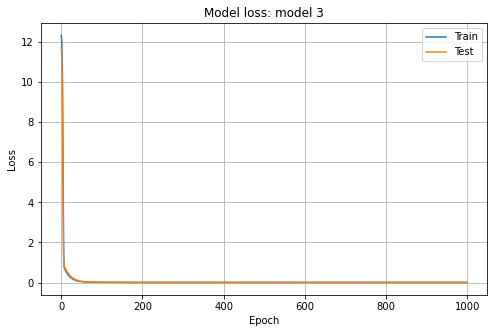

16/16 [==============================] - 0s 1ms/step


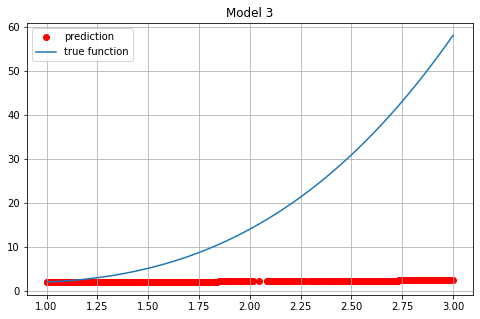

In [26]:
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000) #training set
x_valid = np.random.uniform(-1, 1, 250) # validation set
x_valid.sort()
y_target = 4 -3* x_valid -2*np.power(x_valid,2) + 3*np.power(x_valid,3) # ideal (target) polynomial function
sigma = 0.00 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a +b* x_train +c*np.power(x_train,2) +d*np.power(x_train,3), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a+b* x_valid +c*np.power(x_valid,2) +d*np.power(x_valid,3), sigma)


model3 = tf.keras.Sequential()
model3.add(Dense(units=10,input_shape=(1,)))
model3.add(Activation('relu'))
model3.add(Dense(units=10))
model3.add(Activation('relu'))
model3.add(Dense(units=1,input_shape=(1,)))
model3.add(Activation('PReLU'))

# compile the model & get a summary
model3.compile(optimizer='Adam', loss='mse', metrics=['mse'])
model3.summary()
history3 = model3.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=1000,
          shuffle=True, #  shuffle input before at each epoch
          validation_data=(x_valid, y_valid))


model3.get_weights()
score = model3.evaluate(x_valid, y_valid, batch_size=100, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# look into training history
# Plot training & validation loss values
fig2,ax2=plt.subplots(figsize=(8,5))
ax2.plot(history3.history['loss'])
ax2.plot(history3.history['val_loss'])
ax2.set_title('Model loss: model 3')
ax2.set_ylabel('Loss')
plt.xlabel('Epoch')
plt.grid(True)
ax2.legend(['Train', 'Test'], loc='best')
plt.show()


model3.get_weights()
x_predicted = np.random.uniform(1,3, 500)
y_predicted = model3.predict(x_predicted)
x_valid=np.random.uniform(1,3, 500)
x_valid.sort()
y_target=4 -3* x_valid -2*np.power(x_valid,2) + 3*np.power(x_valid,3)
figure = plt.subplots(figsize=(8,5))
plt.scatter(x_predicted, y_predicted,color='r', label='prediction')
plt.title('Model 3')
plt.plot(x_valid, y_target, label='true function')
plt.legend()
plt.grid(True)
plt.show()

In conclusion, the higher the complexity of the target function the higher the number of epochs should be. Moreover, the neural network should be more articulate, in terms of hte number of neurons for each layer and depth. The ReLu actication choices is in general a satisfactory choice for the activation fuction, when the approximation is for a polynomial, so unlimited, even though, changing the activation function with the PReLU function gives equally satisfactory results. Changing the loss function gives non substantial improvements, on the contrary it worsen the prediction when the loss function is probabilistic (Poisson).
In general, the mean squared error works fine.
Anyhow, even if the final approximation is satisfactory, the predicted model does not perform well on a new dataset on which has not been trained.

### <span style="color:orange">Exercise 11.3 </span>

Let's build a neural network capable of predicting the following function:
$$
𝑓(𝑥,𝑦)=sin(𝑥^{2}+y^{2})
$$
  in the range 𝑥∈[−3/2,3/2]
 and 𝑦∈[−3/2,3/2]
 
 To realize this optimization, I have used a feedforward neural network, composed by four layers, with respectively, from the first to the last, 35,30, 25, 1 neurons. The activation functions are for the first three layers, **ReLu**, for the last layer a **tanh()**. The tanh() is a suitable choice for a function whose output is limited, as the one we are going to study. The chosen optimizer is the stochastic gradient descent and the **loss** and **metric** are is **mean squared error**. The trainin set contains 10000 points and the validation set 2000. The batch size is 250 and I chose 1500 epochs. 
By using this parameters, the final results on the  loss ($10^{-4}$) allow  to conclude that the choice oh the hyperparameters is sensible. 
By looking at the plots of the predicted value of the function, we can sai that this neural network gives satisfingly good approximation of $f(x,y)$ 


In [4]:
import numpy as np
import tensorflow as tf

from tensorflow import keras
import matplotlib.pyplot as plt
from matplotlib import cm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
# generate training inputs & plot interesting things
#define the parameters
np.random.seed(0)
sigma=0
x_train= np.zeros((10000,2))
x_train[:,0] = np.random.uniform(-1.5, 1.5, 10000) #training set, first component
x_train[:,1]= np.random.uniform(-1.5, 1.5, 10000) #training set, second component
y_train=np.random.normal(np.sin(np.power(x_train[:,0],2) + np.power(x_train[:,1],2)),sigma)

x_valid= np.zeros((2000,2))
x_valid[:,0] = np.random.uniform(-1.5, 1.5, 2000) # validation set, first component
x_valid[:,1] = np.random.uniform(-1.5, 1.5, 2000) # validation set, second component
y_valid=np.random.normal(np.sin(np.power(x_valid[:,0],2) + np.power(x_valid[:,1],2)),sigma)
x_valid.sort()


x_target= np.zeros((1000,2))
x_target[:,0] = np.random.uniform(-1.5, 1.5, 1000) #target set, first component
x_target[:,1]= np.random.uniform(-1.5, 1.5, 1000) #target set, second component
y_target=np.sin(np.power(x_target[:,0],2) + np.power(x_target[:,1],2))



Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 35)                105       
                                                                 
 activation_81 (Activation)  (None, 35)                0         
                                                                 
 dense_82 (Dense)            (None, 30)                1080      
                                                                 
 activation_82 (Activation)  (None, 30)                0         
                                                                 
 dense_83 (Dense)            (None, 25)                775       
                                                                 
 activation_83 (Activation)  (None, 25)                0         
                                                                 
 dense_84 (Dense)            (None, 1)               

40/40 [==============================] - 0s 2ms/step - loss: 0.0366 - mse: 0.0366 - val_loss: 0.0384 - val_mse: 0.0384
Epoch 113/1500
40/40 [==============================] - 0s 2ms/step - loss: 0.0351 - mse: 0.0351 - val_loss: 0.0369 - val_mse: 0.0369
Epoch 114/1500
40/40 [==============================] - 0s 2ms/step - loss: 0.0338 - mse: 0.0338 - val_loss: 0.0355 - val_mse: 0.0355
Epoch 115/1500
40/40 [==============================] - 0s 2ms/step - loss: 0.0324 - mse: 0.0324 - val_loss: 0.0341 - val_mse: 0.0341
Epoch 116/1500
40/40 [==============================] - 0s 2ms/step - loss: 0.0311 - mse: 0.0311 - val_loss: 0.0328 - val_mse: 0.0328
Epoch 117/1500
40/40 [==============================] - 0s 2ms/step - loss: 0.0299 - mse: 0.0299 - val_loss: 0.0315 - val_mse: 0.0315
Epoch 118/1500
40/40 [==============================] - 0s 2ms/step - loss: 0.0287 - mse: 0.0287 - val_loss: 0.0303 - val_mse: 0.0303
Epoch 119/1500
40/40 [==============================] - 0s 2ms/step - loss: 0

40/40 [==============================] - 0s 2ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 235/1500
40/40 [==============================] - 0s 2ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 236/1500
40/40 [==============================] - 0s 2ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 237/1500
40/40 [==============================] - 0s 2ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 238/1500
40/40 [==============================] - 0s 2ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 239/1500
40/40 [==============================] - 0s 2ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 240/1500
40/40 [==============================] - 0s 2ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 241/1500
40/40 [==============================] - 0s 2ms/step - loss: 0

40/40 [==============================] - 0s 2ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 357/1500
40/40 [==============================] - 0s 2ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 358/1500
40/40 [==============================] - 0s 2ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 359/1500
40/40 [==============================] - 0s 2ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 360/1500
40/40 [==============================] - 0s 2ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 361/1500
40/40 [==============================] - 0s 2ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 362/1500
40/40 [==============================] - 0s 2ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 363/1500
40/40 [==============================] - 0s 2ms/step - loss: 0

40/40 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 479/1500
40/40 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 480/1500
40/40 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 481/1500
40/40 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 482/1500
40/40 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 483/1500
40/40 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 484/1500
40/40 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 485/1500
40/40 [==============================] - 0s 2ms/step - loss: 0

40/40 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 601/1500
40/40 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 602/1500
40/40 [==============================] - 0s 2ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 603/1500
40/40 [==============================] - 0s 2ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 604/1500
40/40 [==============================] - 0s 2ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 605/1500
40/40 [==============================] - 0s 2ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 606/1500
40/40 [==============================] - 0s 2ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 607/1500
40/40 [==============================] - 0s 2ms/step - loss: 0

Epoch 712/1500
40/40 [==============================] - 0s 2ms/step - loss: 9.1138e-04 - mse: 9.1138e-04 - val_loss: 8.8466e-04 - val_mse: 8.8466e-04
Epoch 713/1500
40/40 [==============================] - 0s 2ms/step - loss: 9.1024e-04 - mse: 9.1024e-04 - val_loss: 8.8737e-04 - val_mse: 8.8737e-04
Epoch 714/1500
40/40 [==============================] - 0s 2ms/step - loss: 9.0920e-04 - mse: 9.0920e-04 - val_loss: 8.8100e-04 - val_mse: 8.8100e-04
Epoch 715/1500
40/40 [==============================] - 0s 2ms/step - loss: 9.0879e-04 - mse: 9.0879e-04 - val_loss: 8.8345e-04 - val_mse: 8.8345e-04
Epoch 716/1500
40/40 [==============================] - 0s 2ms/step - loss: 9.0784e-04 - mse: 9.0784e-04 - val_loss: 8.8402e-04 - val_mse: 8.8402e-04
Epoch 717/1500
40/40 [==============================] - 0s 2ms/step - loss: 9.0671e-04 - mse: 9.0671e-04 - val_loss: 8.7986e-04 - val_mse: 8.7986e-04
Epoch 718/1500
40/40 [==============================] - 0s 2ms/step - loss: 9.0599e-04 - mse: 9.0599

Epoch 821/1500
40/40 [==============================] - 0s 2ms/step - loss: 8.2718e-04 - mse: 8.2718e-04 - val_loss: 8.0922e-04 - val_mse: 8.0922e-04
Epoch 822/1500
40/40 [==============================] - 0s 2ms/step - loss: 8.2667e-04 - mse: 8.2667e-04 - val_loss: 8.0773e-04 - val_mse: 8.0773e-04
Epoch 823/1500
40/40 [==============================] - 0s 2ms/step - loss: 8.2618e-04 - mse: 8.2618e-04 - val_loss: 8.0791e-04 - val_mse: 8.0791e-04
Epoch 824/1500
40/40 [==============================] - 0s 2ms/step - loss: 8.2526e-04 - mse: 8.2526e-04 - val_loss: 8.0649e-04 - val_mse: 8.0649e-04
Epoch 825/1500
40/40 [==============================] - 0s 3ms/step - loss: 8.2484e-04 - mse: 8.2484e-04 - val_loss: 8.1452e-04 - val_mse: 8.1452e-04
Epoch 826/1500
40/40 [==============================] - 0s 2ms/step - loss: 8.2439e-04 - mse: 8.2439e-04 - val_loss: 8.1281e-04 - val_mse: 8.1281e-04
Epoch 827/1500
40/40 [==============================] - 0s 2ms/step - loss: 8.2388e-04 - mse: 8.2388

Epoch 930/1500
40/40 [==============================] - 0s 2ms/step - loss: 7.7009e-04 - mse: 7.7009e-04 - val_loss: 7.5996e-04 - val_mse: 7.5996e-04
Epoch 931/1500
40/40 [==============================] - 0s 2ms/step - loss: 7.6946e-04 - mse: 7.6946e-04 - val_loss: 7.6222e-04 - val_mse: 7.6222e-04
Epoch 932/1500
40/40 [==============================] - 0s 2ms/step - loss: 7.6906e-04 - mse: 7.6906e-04 - val_loss: 7.5809e-04 - val_mse: 7.5809e-04
Epoch 933/1500
40/40 [==============================] - 0s 2ms/step - loss: 7.6821e-04 - mse: 7.6821e-04 - val_loss: 7.5786e-04 - val_mse: 7.5786e-04
Epoch 934/1500
40/40 [==============================] - 0s 2ms/step - loss: 7.6811e-04 - mse: 7.6811e-04 - val_loss: 7.5703e-04 - val_mse: 7.5703e-04
Epoch 935/1500
40/40 [==============================] - 0s 2ms/step - loss: 7.6718e-04 - mse: 7.6718e-04 - val_loss: 7.5723e-04 - val_mse: 7.5723e-04
Epoch 936/1500
40/40 [==============================] - 0s 2ms/step - loss: 7.6689e-04 - mse: 7.6689

40/40 [==============================] - 0s 2ms/step - loss: 7.2634e-04 - mse: 7.2634e-04 - val_loss: 7.2097e-04 - val_mse: 7.2097e-04
Epoch 1039/1500
40/40 [==============================] - 0s 2ms/step - loss: 7.2582e-04 - mse: 7.2582e-04 - val_loss: 7.2135e-04 - val_mse: 7.2135e-04
Epoch 1040/1500
40/40 [==============================] - 0s 2ms/step - loss: 7.2546e-04 - mse: 7.2546e-04 - val_loss: 7.2392e-04 - val_mse: 7.2392e-04
Epoch 1041/1500
40/40 [==============================] - 0s 2ms/step - loss: 7.2507e-04 - mse: 7.2507e-04 - val_loss: 7.1994e-04 - val_mse: 7.1994e-04
Epoch 1042/1500
40/40 [==============================] - 0s 2ms/step - loss: 7.2479e-04 - mse: 7.2479e-04 - val_loss: 7.1721e-04 - val_mse: 7.1721e-04
Epoch 1043/1500
40/40 [==============================] - 0s 2ms/step - loss: 7.2481e-04 - mse: 7.2481e-04 - val_loss: 7.1970e-04 - val_mse: 7.1970e-04
Epoch 1044/1500
40/40 [==============================] - 0s 2ms/step - loss: 7.2390e-04 - mse: 7.2390e-04 - va

40/40 [==============================] - 0s 3ms/step - loss: 6.9274e-04 - mse: 6.9274e-04 - val_loss: 6.8831e-04 - val_mse: 6.8831e-04
Epoch 1147/1500
40/40 [==============================] - 0s 2ms/step - loss: 6.9228e-04 - mse: 6.9228e-04 - val_loss: 6.8825e-04 - val_mse: 6.8825e-04
Epoch 1148/1500
40/40 [==============================] - 0s 2ms/step - loss: 6.9202e-04 - mse: 6.9202e-04 - val_loss: 6.9013e-04 - val_mse: 6.9013e-04
Epoch 1149/1500
40/40 [==============================] - 0s 2ms/step - loss: 6.9166e-04 - mse: 6.9166e-04 - val_loss: 6.9011e-04 - val_mse: 6.9011e-04
Epoch 1150/1500
40/40 [==============================] - 0s 3ms/step - loss: 6.9127e-04 - mse: 6.9127e-04 - val_loss: 6.8866e-04 - val_mse: 6.8866e-04
Epoch 1151/1500
40/40 [==============================] - 0s 2ms/step - loss: 6.9146e-04 - mse: 6.9146e-04 - val_loss: 6.8765e-04 - val_mse: 6.8765e-04
Epoch 1152/1500
40/40 [==============================] - 0s 2ms/step - loss: 6.9075e-04 - mse: 6.9075e-04 - va

40/40 [==============================] - 0s 2ms/step - loss: 6.6268e-04 - mse: 6.6268e-04 - val_loss: 6.5723e-04 - val_mse: 6.5723e-04
Epoch 1255/1500
40/40 [==============================] - 0s 2ms/step - loss: 6.6223e-04 - mse: 6.6223e-04 - val_loss: 6.5889e-04 - val_mse: 6.5889e-04
Epoch 1256/1500
40/40 [==============================] - 0s 2ms/step - loss: 6.6188e-04 - mse: 6.6188e-04 - val_loss: 6.5497e-04 - val_mse: 6.5497e-04
Epoch 1257/1500
40/40 [==============================] - 0s 2ms/step - loss: 6.6216e-04 - mse: 6.6216e-04 - val_loss: 6.5756e-04 - val_mse: 6.5756e-04
Epoch 1258/1500
40/40 [==============================] - 0s 2ms/step - loss: 6.6191e-04 - mse: 6.6191e-04 - val_loss: 6.5958e-04 - val_mse: 6.5958e-04
Epoch 1259/1500
40/40 [==============================] - 0s 1ms/step - loss: 6.6120e-04 - mse: 6.6120e-04 - val_loss: 6.5446e-04 - val_mse: 6.5446e-04
Epoch 1260/1500
40/40 [==============================] - 0s 2ms/step - loss: 6.6146e-04 - mse: 6.6146e-04 - va

40/40 [==============================] - 0s 3ms/step - loss: 6.4027e-04 - mse: 6.4027e-04 - val_loss: 6.3364e-04 - val_mse: 6.3364e-04
Epoch 1363/1500
40/40 [==============================] - 0s 4ms/step - loss: 6.4009e-04 - mse: 6.4009e-04 - val_loss: 6.3611e-04 - val_mse: 6.3611e-04
Epoch 1364/1500
40/40 [==============================] - 0s 3ms/step - loss: 6.3951e-04 - mse: 6.3951e-04 - val_loss: 6.3458e-04 - val_mse: 6.3458e-04
Epoch 1365/1500
40/40 [==============================] - 0s 2ms/step - loss: 6.3929e-04 - mse: 6.3929e-04 - val_loss: 6.3396e-04 - val_mse: 6.3396e-04
Epoch 1366/1500
40/40 [==============================] - 0s 2ms/step - loss: 6.3927e-04 - mse: 6.3927e-04 - val_loss: 6.3700e-04 - val_mse: 6.3700e-04
Epoch 1367/1500
40/40 [==============================] - 0s 2ms/step - loss: 6.3933e-04 - mse: 6.3933e-04 - val_loss: 6.3866e-04 - val_mse: 6.3866e-04
Epoch 1368/1500
40/40 [==============================] - 0s 2ms/step - loss: 6.3901e-04 - mse: 6.3901e-04 - va

40/40 [==============================] - 0s 2ms/step - loss: 6.2033e-04 - mse: 6.2033e-04 - val_loss: 6.1407e-04 - val_mse: 6.1407e-04
Epoch 1471/1500
40/40 [==============================] - 0s 2ms/step - loss: 6.2016e-04 - mse: 6.2016e-04 - val_loss: 6.1281e-04 - val_mse: 6.1281e-04
Epoch 1472/1500
40/40 [==============================] - 0s 2ms/step - loss: 6.1980e-04 - mse: 6.1980e-04 - val_loss: 6.1697e-04 - val_mse: 6.1697e-04
Epoch 1473/1500
40/40 [==============================] - 0s 2ms/step - loss: 6.1944e-04 - mse: 6.1944e-04 - val_loss: 6.1520e-04 - val_mse: 6.1520e-04
Epoch 1474/1500
40/40 [==============================] - 0s 2ms/step - loss: 6.1909e-04 - mse: 6.1909e-04 - val_loss: 6.1933e-04 - val_mse: 6.1933e-04
Epoch 1475/1500
40/40 [==============================] - 0s 2ms/step - loss: 6.1961e-04 - mse: 6.1961e-04 - val_loss: 6.1723e-04 - val_mse: 6.1723e-04
Epoch 1476/1500
40/40 [==============================] - 0s 2ms/step - loss: 6.1897e-04 - mse: 6.1897e-04 - va

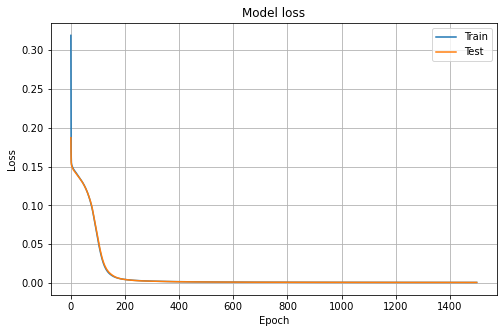

In [38]:
model = tf.keras.Sequential()
model.add(Dense(units=35,input_shape=(2,)))
model.add(Activation('relu'))
model.add(Dense(units=30))
model.add(Activation('relu'))
model.add(Dense(units=25))
model.add(Activation('relu'))
model.add(Dense(units=1,input_shape=(1,)))
model.add(Activation('tanh'))
M=np.meshgrid(x_train,y_train)
# compile the model & get a summary
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()
history = model.fit(x=x_train, y= y_train,batch_size=250, epochs=1500,shuffle=True, #  shuffle input before at each epoch
          validation_data=(x_valid, y_valid))


model.get_weights()
score = model.evaluate(x_valid, y_valid, batch_size=250, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# look into training history
# Plot training & validation loss values
fig2,ax2=plt.subplots(figsize=(8,5))
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model loss')
ax2.set_ylabel('Loss')
plt.xlabel('Epoch')
plt.grid(True)
ax2.legend(['Train', 'Test'], loc='best')
plt.show()


47/47 [==============================] - 0s 765us/step


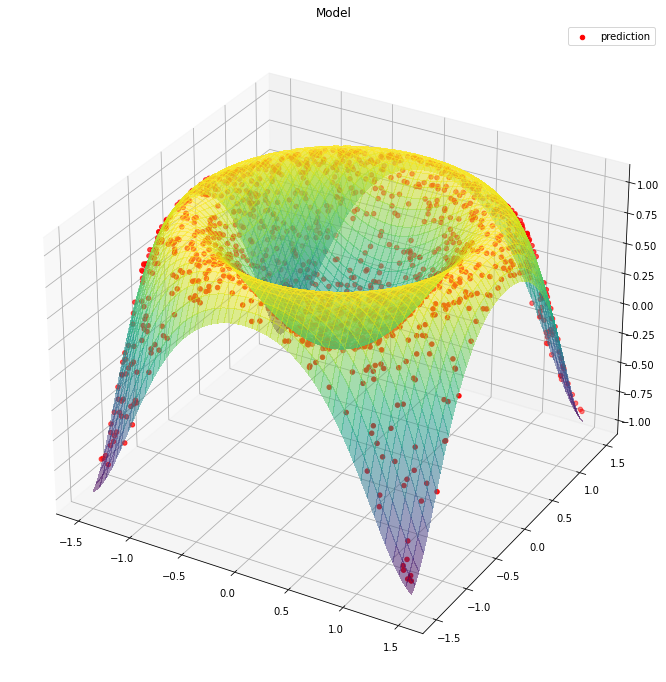

47/47 [==============================] - 0s 867us/step


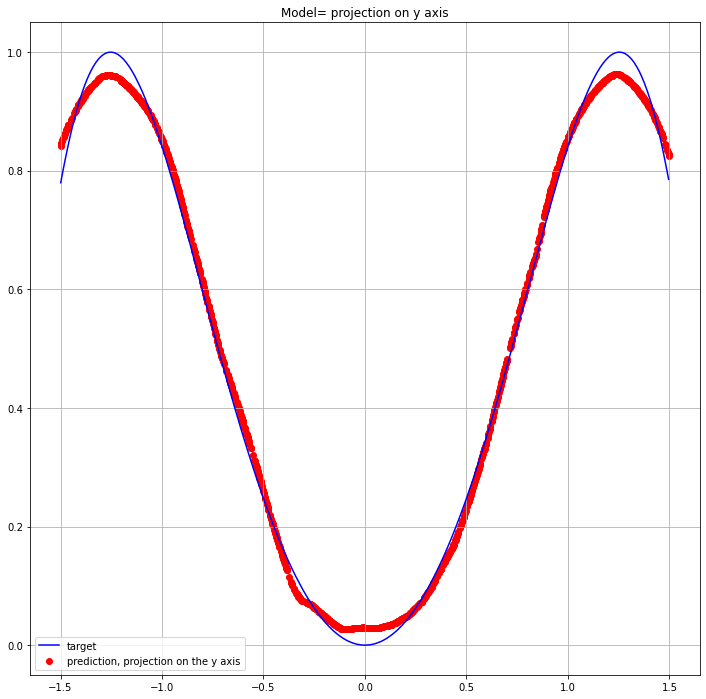

47/47 [==============================] - 0s 1ms/step


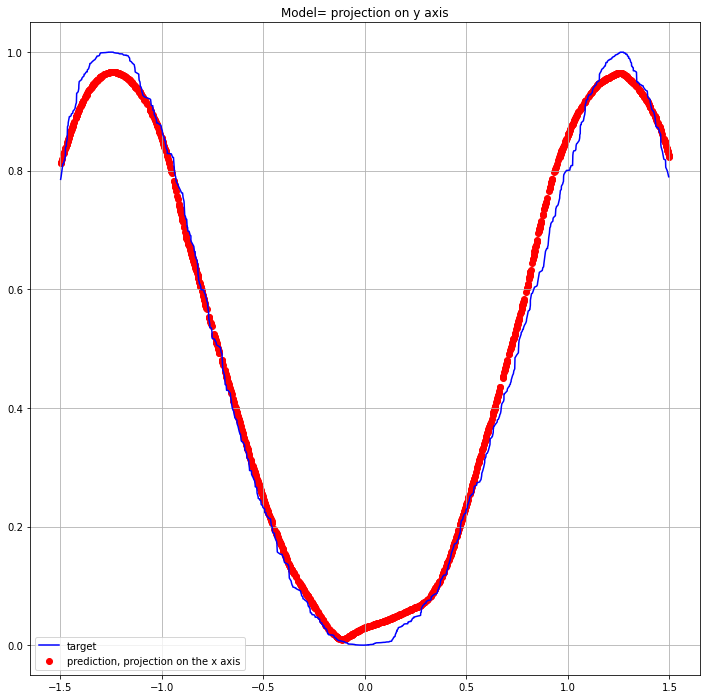

In [58]:
model.get_weights()
x_predicted=np.zeros((1500,2))
x_predicted[:,0] = np.random.uniform(-1.5,1.5, 1500)
x_predicted[:,1] = np.random.uniform(-1.5,1.5, 1500)
y_predicted = model.predict(x_predicted)
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')

plt.title('Model')
#ax.scatter(x_target[:,0],x_target[:,1], y_target, label='true function')
X=x_target[:,0]
X.sort()
Y=x_target[:,1]
Y.sort()
X,Y= np.meshgrid(X,Y)
Z= np.sin(np.power(X,2) + np.power(Y,2))
surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis,alpha=0.5,
                       linewidth=0, antialiased=False)

ax.scatter(x_predicted[:,0],x_predicted[:,1], y_predicted,color='r', label='prediction')
plt.legend()
plt.grid(True)
plt.show()


x_predicted=np.zeros((1500,2))
x_predicted[:,0] = np.random.uniform(-1.5,1.5, 1500)*0
x_predicted[:,1] = np.random.uniform(-1.5,1.5, 1500)
y_predicted = model.predict(x_predicted)
fig = plt.figure(figsize=(12,12))
#ax = fig.add_subplot(projection='3d')

plt.title('Model= projection on y axis')
#ax.scatter(x_target[:,0],x_target[:,1], y_target, label='true function')
X=x_target[:,0]
Y=x_target[:,1]
Z= np.sin(  np.power(Y,2))
#surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis,alpha=0.5,
                       #linewidth=0, antialiased=False)
plt.plot(Y,Z,color='b',label='target')
plt.scatter(x_predicted[:,1], y_predicted,color='r', label='prediction, projection on the y axis')
plt.legend()
plt.grid(True)
plt.show()



x_predicted=np.zeros((1500,2))
x_predicted[:,0] = np.random.uniform(-1.5,1.5, 1500)*1
x_predicted[:,1] = np.random.uniform(-1.5,1.5, 1500)*0
y_predicted = model.predict(x_predicted)
fig = plt.figure(figsize=(12,12))
#ax = fig.add_subplot(projection='3d')

plt.title('Model= projection on y axis')
#ax.scatter(x_target[:,0],x_target[:,1], y_target, label='true function')
X=x_target[:,0]
Y=x_target[:,1]
Z= np.sin(  np.power(X,2))
#surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis,alpha=0.5,
                       #linewidth=0, antialiased=False)
plt.plot(Y,Z,color='b',label='target')
plt.scatter(x_predicted[:,0], y_predicted,color='r', label='prediction, projection on the x axis')
plt.legend()
plt.grid(True)
plt.show()



